<h2><center>Aung Naing Oo | Applied Data Mining Project 2022</center></h2>


# <center>I. Supervised Learning </center>

## 1. Import the data

In [3]:
import numpy as np
import pandas as pd

kdd_data = pd.read_csv('lab2_data/kddcup_data.csv')
kdd_data.head(10)

duration  protocol_type  service  flag   src_bytes   dst_bytes   land  \
0         0            tcp     http    SF         181        5450      0   
1         0            tcp     http    SF         239         486      0   
2         0            tcp     http    SF         235        1337      0   
3         0            tcp     http    SF         219        1337      0   
4         0            tcp     http    SF         217        2032      0   
5         0            tcp     http    SF         217        2032      0   
6         0            tcp     http    SF         212        1940      0   
7         0            tcp     http    SF         159        4087      0   
8         0            tcp     http    SF         210         151      0   
9         0            tcp     http    SF         212         786      0   

    wrong_fragment   urgent   hot  ...   dst_host_srv_count  \
0                0        0     0  ...                    9   
1                0        0     0  ...                   19   
2                0        0     0  ...                   29   
3                0        0     0  ...                   39   
4                0        0     0  ...                   49   
5                0        0     0  ...                   59   
6                0        0     0  ...                   69   
7                0        0     0  ...                   79   
8                0        0     0  ...                   89   
9                0        0     1  ...                   99   

    dst_host_same_srv_rate   dst_host_diff_srv_rate  \
0                      1.0                      0.0   
1                      1.0                      0.0   
2                      1.0                      0.0   
3                      1.0                      0.0   
4                      1.0                      0.0   
5                      1.0                      0.0   
6                      1.0                      0.0   
7                      1.0                      0.0   
8                      1.0                      0.0   
9                      1.0                      0.0   

    dst_host_same_src_port_rate   dst_host_srv_diff_host_rate  \
0                          0.11                          0.00   
1                          0.05                          0.00   
2                          0.03                          0.00   
3                          0.03                          0.00   
4                          0.02                          0.00   
5                          0.02                          0.00   
6                          1.00                          0.04   
7                          0.09                          0.04   
8                          0.12                          0.04   
9                          0.12                          0.05   

    dst_host_serror_rate   dst_host_srv_serror_rate   dst_host_rerror_rate  \
0                    0.0                        0.0                    0.0   
1                    0.0                        0.0                    0.0   
2                    0.0                        0.0                    0.0   
3                    0.0                        0.0                    0.0   
4                    0.0                        0.0                    0.0   
5                    0.0                        0.0                    0.0   
6                    0.0                        0.0                    0.0   
7                    0.0                        0.0                    0.0   
8                    0.0                        0.0                    0.0   
9                    0.0                        0.0                    0.0   

    dst_host_srv_rerror_rate    label  
0                        0.0  normal.  
1                        0.0  normal.  
2                        0.0  normal.  
3                        0.0  normal.  
4                        0.0  normal.  
5                        0.0  normal.  
6          

## 2. Data Preprocessing


In [4]:
print(kdd_data.shape)
kdd_data_small = kdd_data.sample(n=10000)
print(kdd_data_small.shape)

(494021, 42)
(10000, 42)


In [5]:
kdd_data_small.head(10)

duration  protocol_type  service  flag   src_bytes   dst_bytes   land  \
157990         0           icmp    ecr_i    SF        1032           0      0   
128985         0           icmp    ecr_i    SF        1032           0      0   
296277         0           icmp    ecr_i    SF        1032           0      0   
43703          0           icmp    ecr_i    SF        1032           0      0   
470615         0            tcp  private   REJ           0           0      0   
173592         0           icmp    ecr_i    SF        1032           0      0   
242436         0           icmp    ecr_i    SF        1032           0      0   
403948         0           icmp    ecr_i    SF         520           0      0   
490519         0           icmp    ecr_i    SF        1032           0      0   
320228         0           icmp    ecr_i    SF        1032           0      0   

         wrong_fragment   urgent   hot  ...   dst_host_srv_count  \
157990                0        0     0  ...                  255   
128985                0        0     0  ...                  255   
296277                0        0     0  ...                  255   
43703                 0        0     0  ...                  255   
470615                0        0     0  ...                    3   
173592                0        0     0  ...                  255   
242436                0        0     0  ...                  255   
403948                0        0     0  ...                  255   
490519                0        0     0  ...                  255   
320228                0        0     0  ...                  255   

         dst_host_same_srv_rate   dst_host_diff_srv_rate  \
157990                     1.00                     0.00   
128985                     1.00                     0.00   
296277                     1.00                     0.00   
43703                      1.00                     0.00   
470615                     0.01                     0.08   
173592                     1.00                     0.00   
242436                     1.00                     0.00   
403948                     1.00                     0.00   
490519                     1.00                     0.00   
320228                     1.00                     0.00   

         dst_host_same_src_port_rate   dst_host_srv_diff_host_rate  \
157990                           1.0                           0.0   
128985                           1.0                           0.0   
296277                           1.0                           0.0   
43703                            1.0                           0.0   
470615                           0.0                           0.0   
173592                           1.0                           0.0   
242436                           1.0                           0.0   
403948                           1.0                           0.0   
490519                           1.0                           0.0   
320228                           1.0                           0.0   

         dst_host_serror_rate   dst_host_srv_serror_rate  \
157990                    0.0                        0.0   
128985                    0.0                        0.0   
296277                    0.0                        0.0   
43703                     0.0                        0.0   
470615                    0.0                        0.0   
173592                    0.0                        0.0   
242436                    0.0                        0.0   
403948                    0.0                        0.0   
490519                    0.0                        0.0   
320228                    0.0                        0.0   

         dst_host_rerror_rate   dst_host_srv_rerror_rate     label  
157990                    0.0                        0.0    smurf.  
128985                    0.0                        0.0    smurf.  
296277                    0.0                        0.0    smurf. 

#### Check for Null Values

In [6]:
print('Null values in dataset are',len(kdd_data_small[kdd_data_small.isnull().any(1)]))


Null values in dataset are 0


## 3. Visualise the entire dataset as histogram

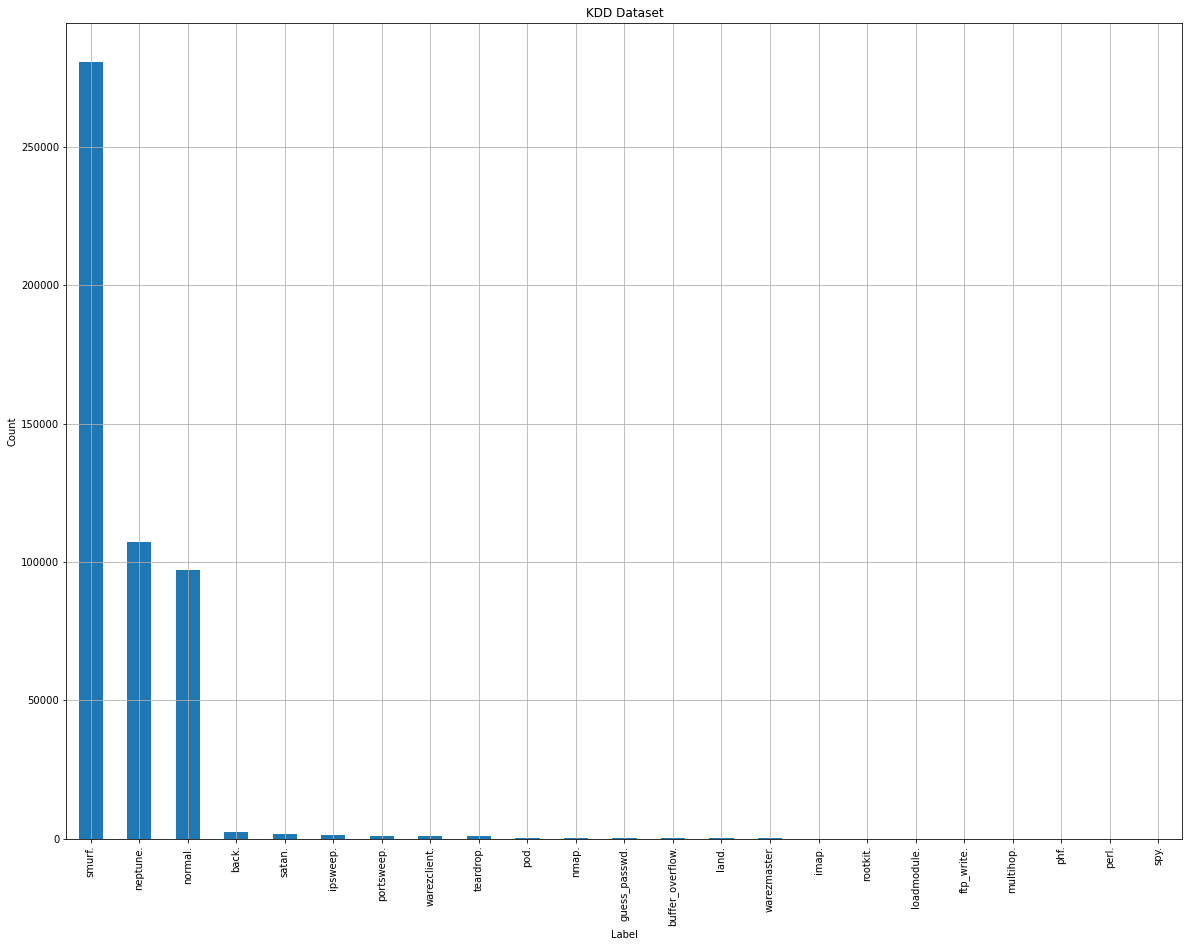

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
class_distribution = kdd_data['label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('KDD Dataset')
plt.grid()
plt.show()

In [21]:
sorted_yi = np.argsort(-class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', class_distribution.keys()[i],':', class_distribution.values[i], '(', np.round((class_distribution.values[i]/kdd_data.shape[0]*100), 4), '%)')


Number of data points in class smurf. : 280790 ( 56.8377 %)
Number of data points in class neptune. : 107201 ( 21.6997 %)
Number of data points in class normal. : 97278 ( 19.6911 %)
Number of data points in class back. : 2203 ( 0.4459 %)
Number of data points in class satan. : 1589 ( 0.3216 %)
Number of data points in class ipsweep. : 1247 ( 0.2524 %)
Number of data points in class portsweep. : 1040 ( 0.2105 %)
Number of data points in class warezclient. : 1020 ( 0.2065 %)
Number of data points in class teardrop. : 979 ( 0.1982 %)
Number of data points in class pod. : 264 ( 0.0534 %)
Number of data points in class nmap. : 231 ( 0.0468 %)
Number of data points in class guess_passwd. : 53 ( 0.0107 %)
Number of data points in class buffer_overflow. : 30 ( 0.0061 %)
Number of data points in class land. : 21 ( 0.0043 %)
Number of data points in class warezmaster. : 20 ( 0.004 %)
Number of data points in class imap. : 12 ( 0.0024 %)
Number of data points in class rootkit. : 10 ( 0.002 %)
Num

`Normal` represents less than 20% of the dataset

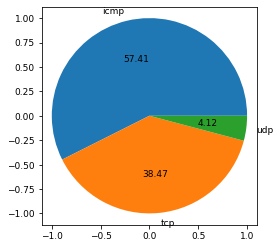

In [97]:
feature_protocol_type = kdd_data.groupby(by=[' protocol_type']).size().to_frame('size').reset_index() #kdd_data[['duration']]
plt.pie(feature_protocol_type['size'],labels=feature_protocol_type[' protocol_type'], autopct='%.2f', frame=True)
plt.show()

<AxesSubplot:xlabel=' flag', ylabel='size'>

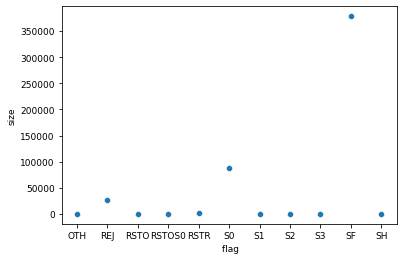

In [102]:
feature_protocol_flag = kdd_data.groupby(by=[' flag']).size().to_frame('size').reset_index() 
sns.scatterplot(data=feature_protocol_flag, x=feature_protocol_flag[' flag'], y=feature_protocol_flag['size'])

## 4. Individual feature visualisation as pie-charts to spot noise/unwanted features

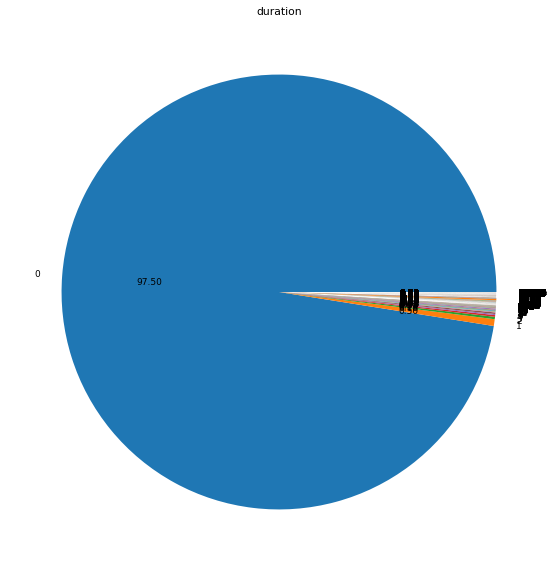

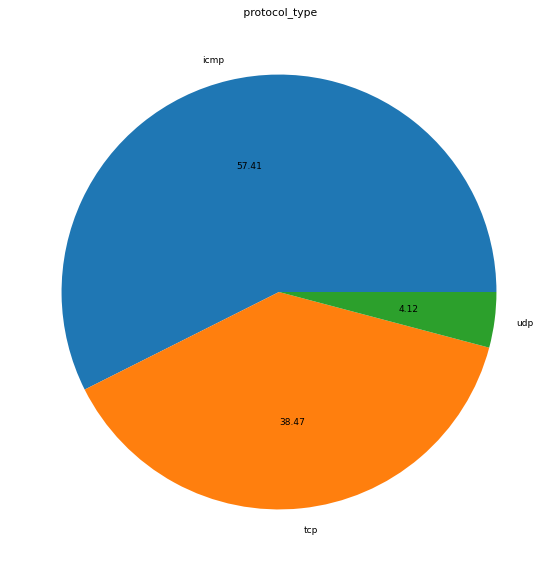

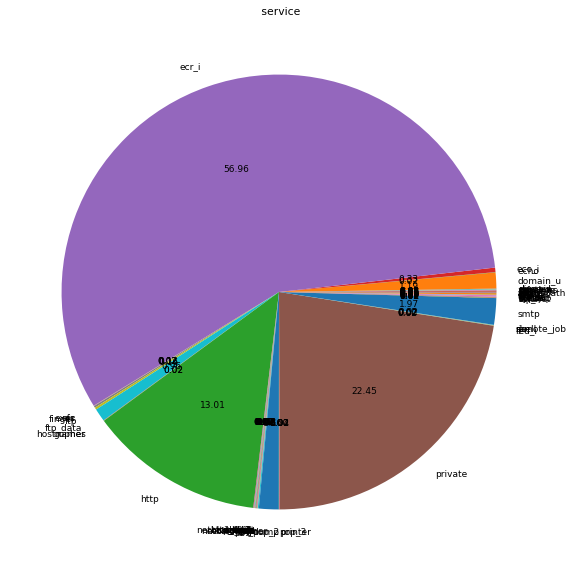

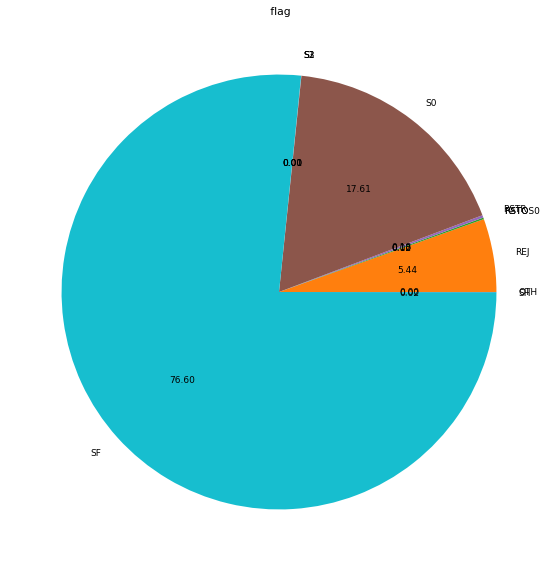

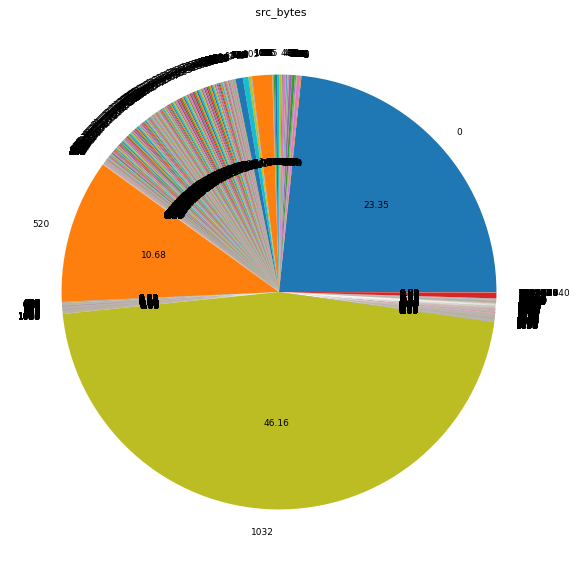

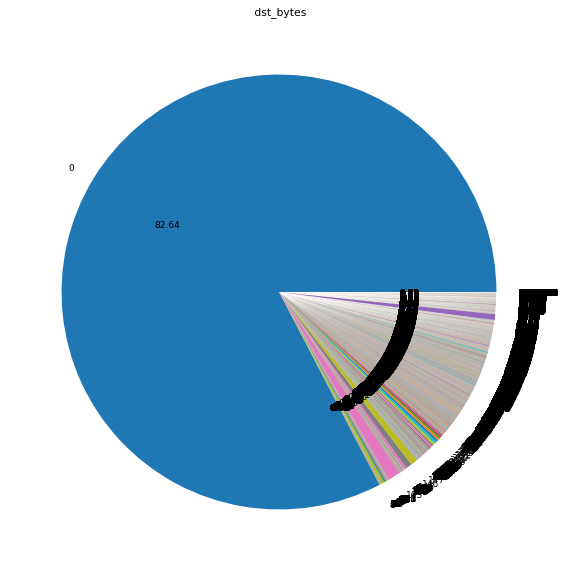

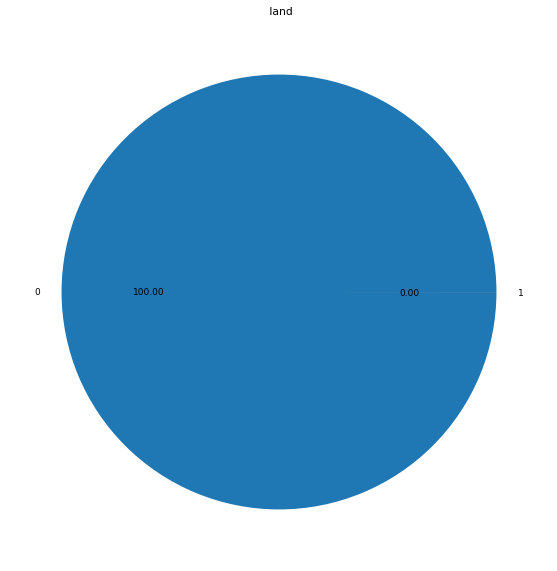

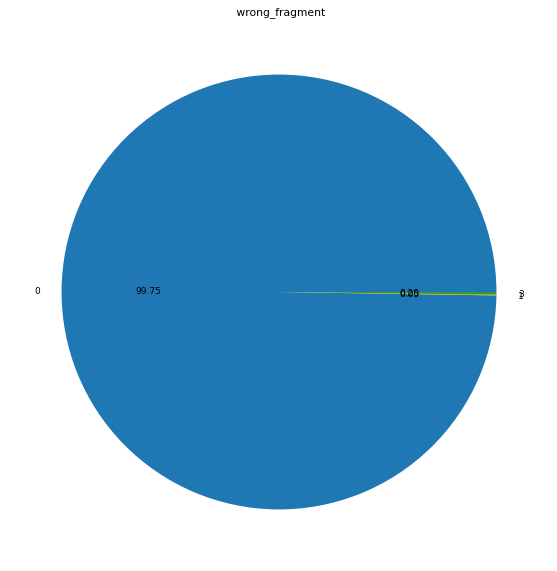

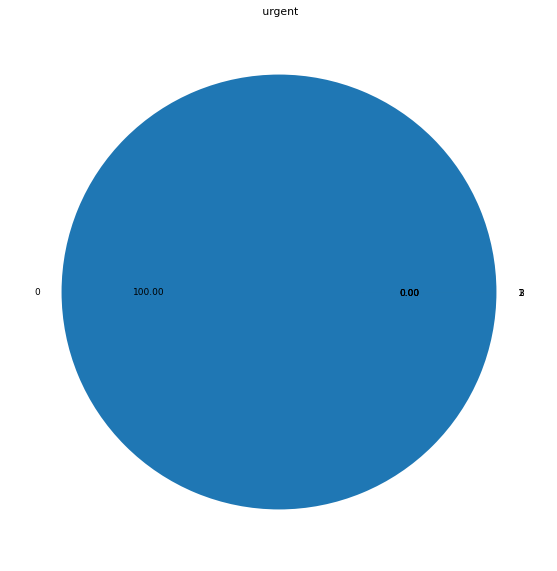

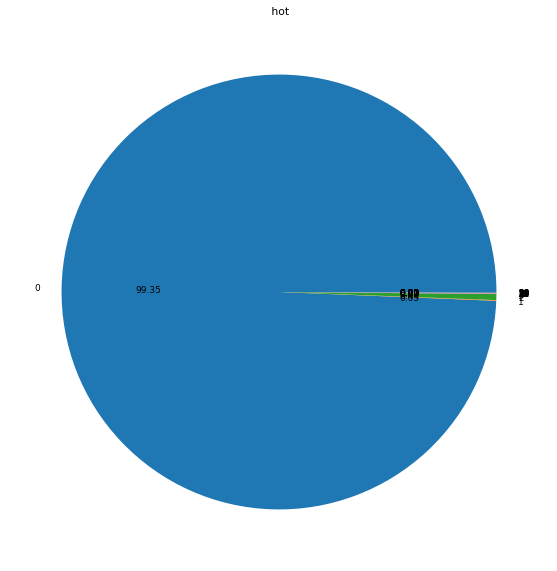

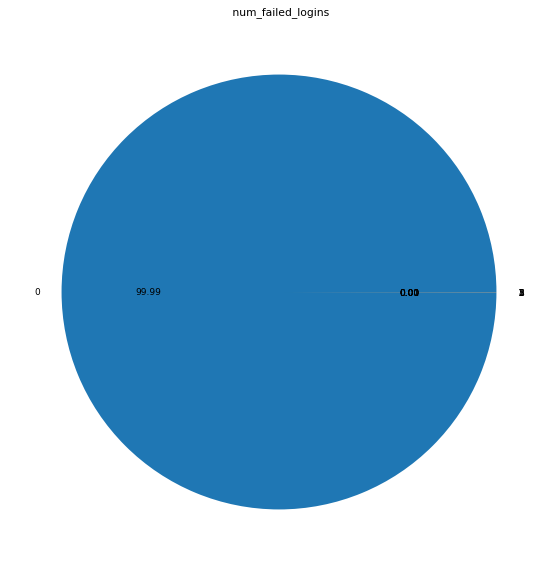

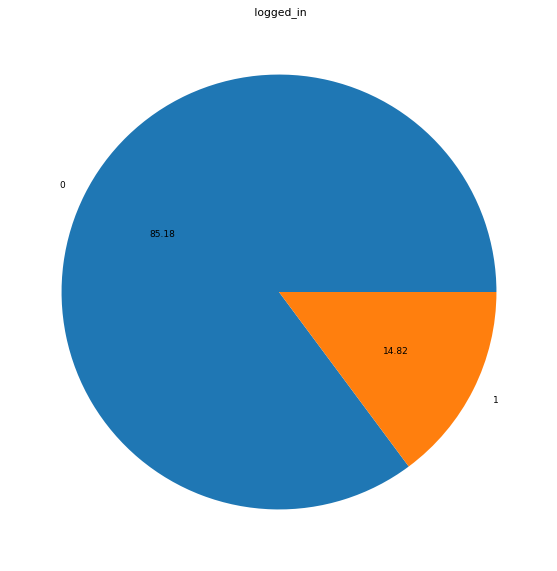

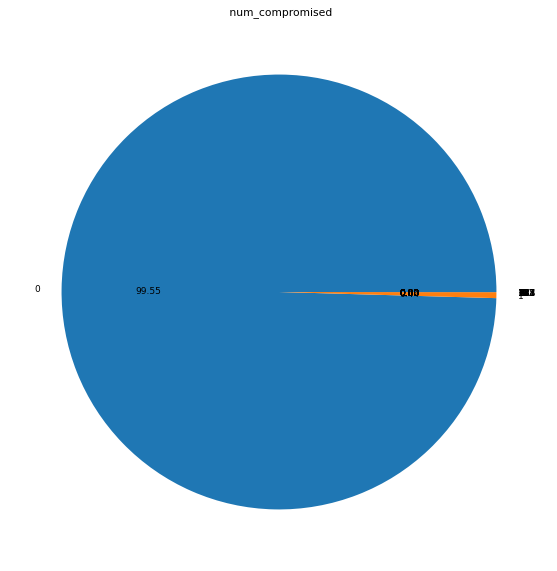

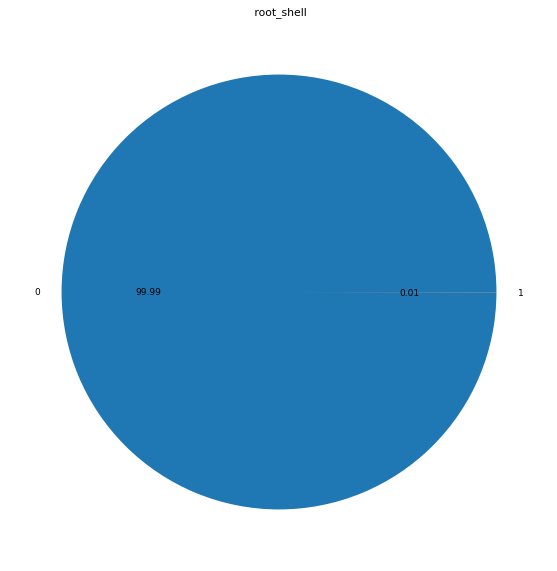

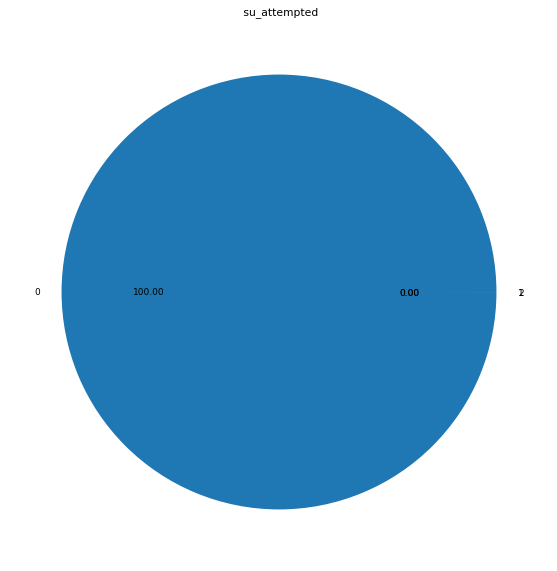

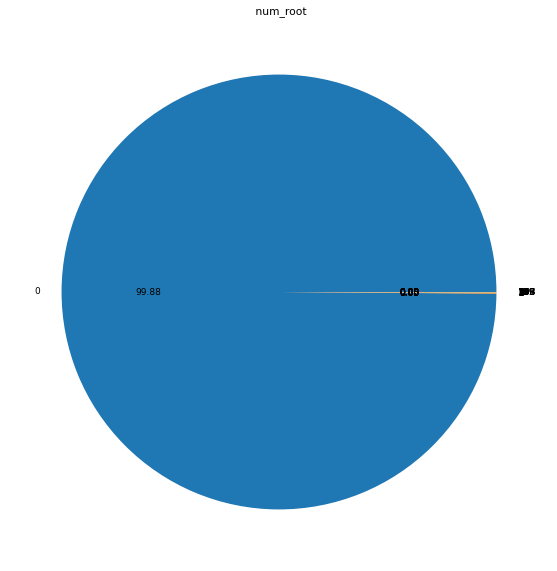

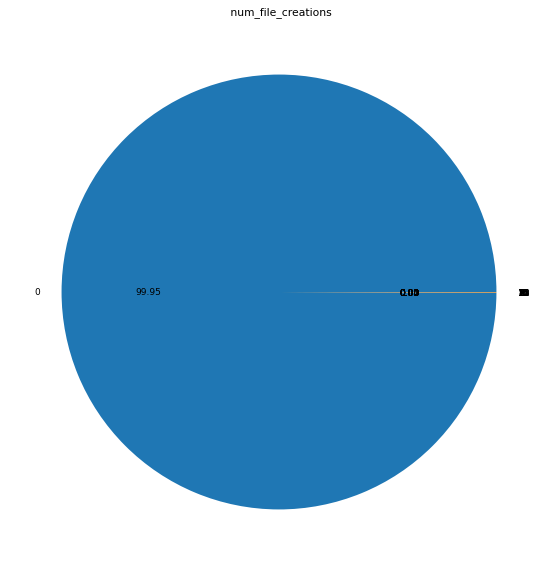

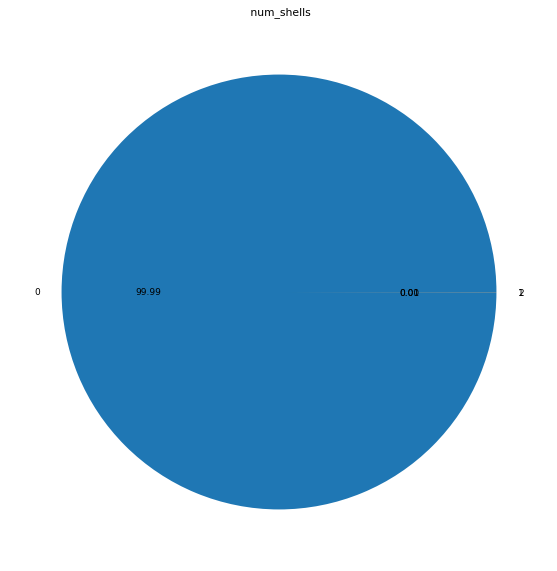

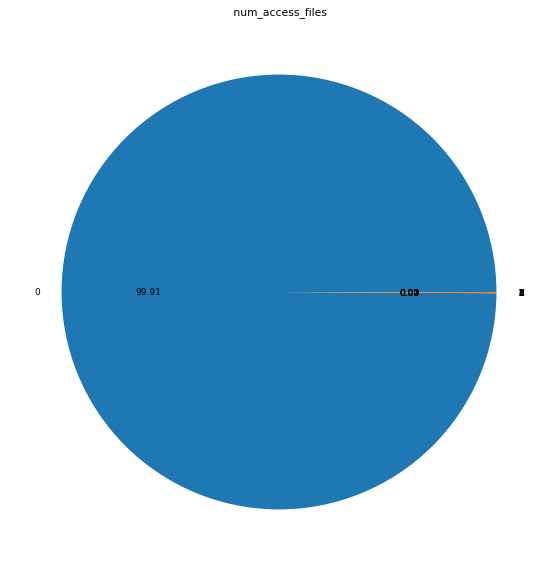

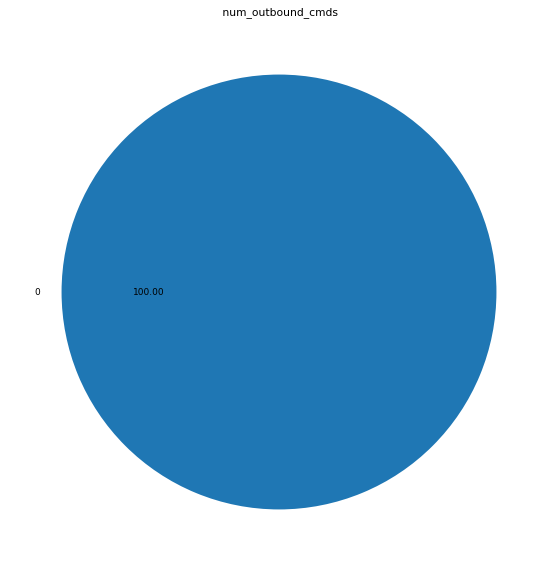

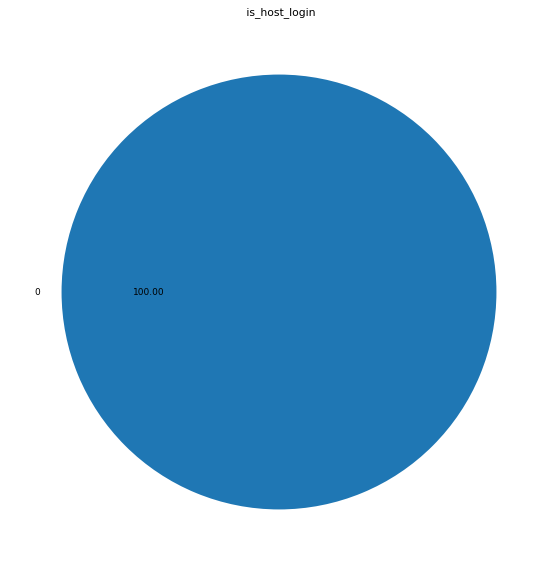

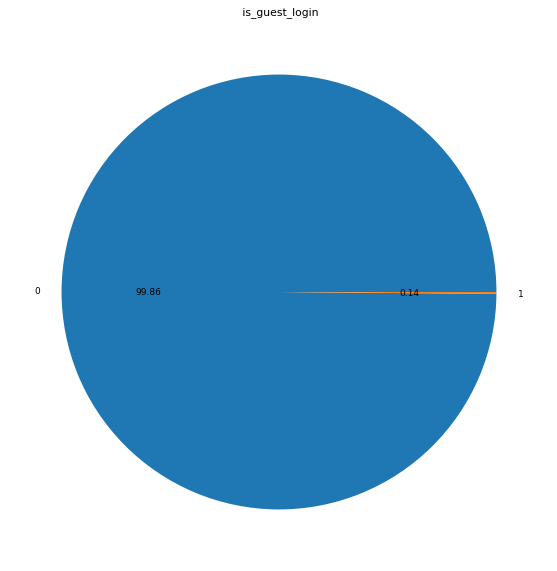

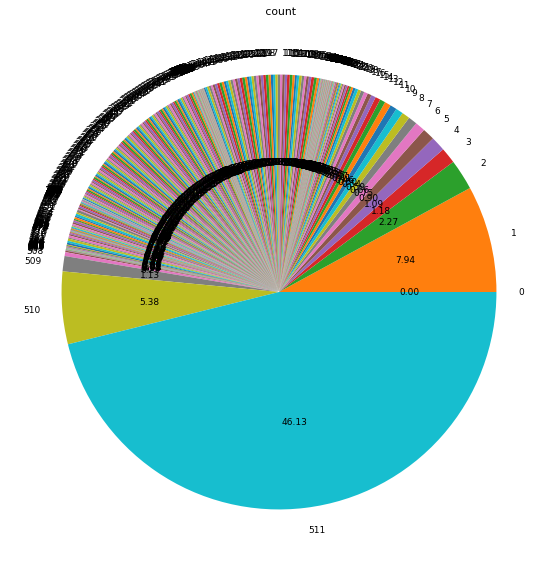

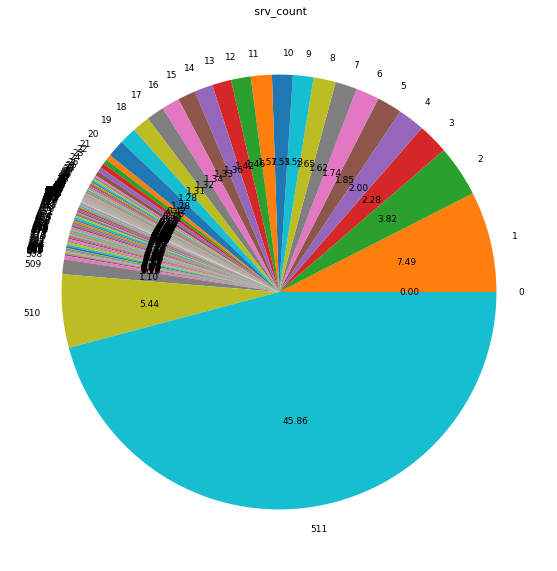

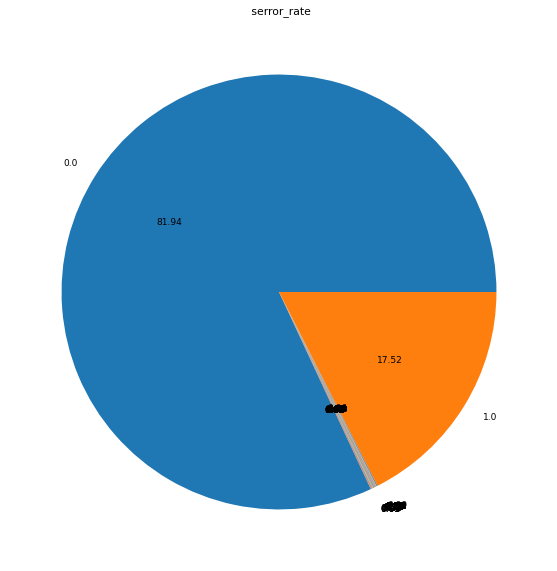

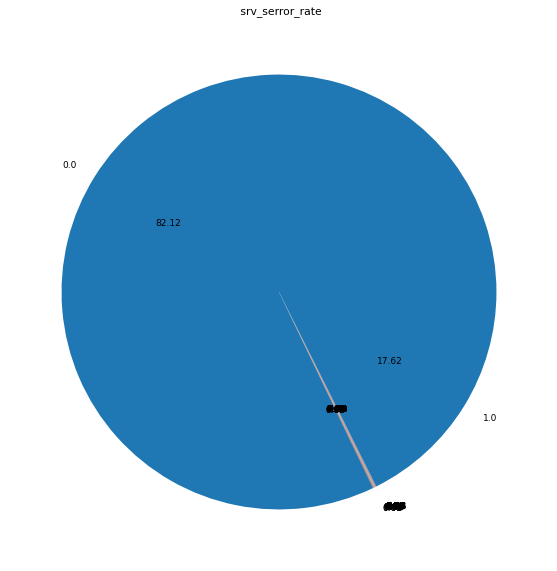

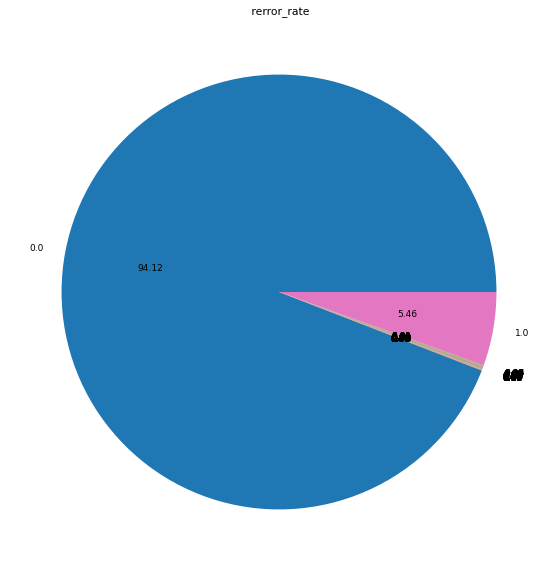

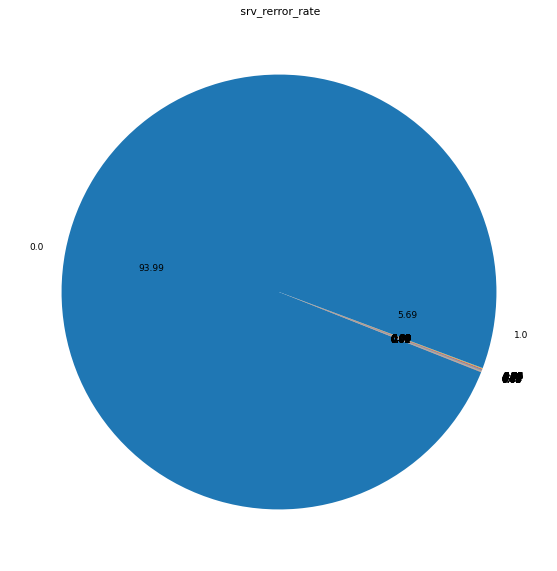

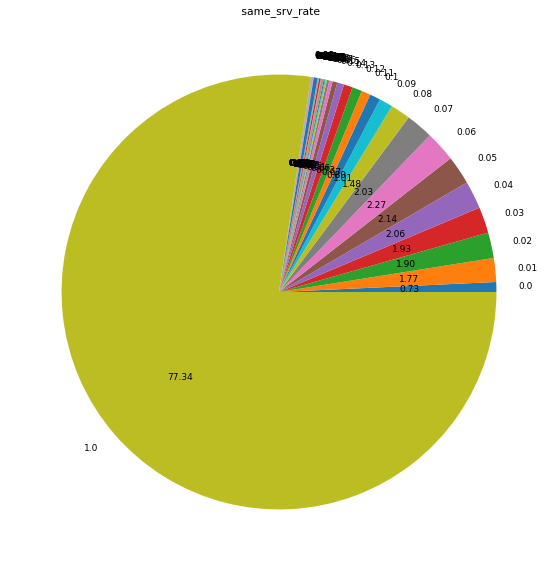

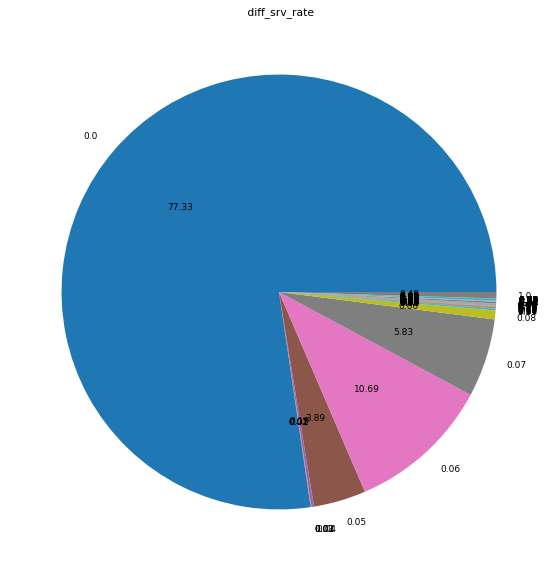

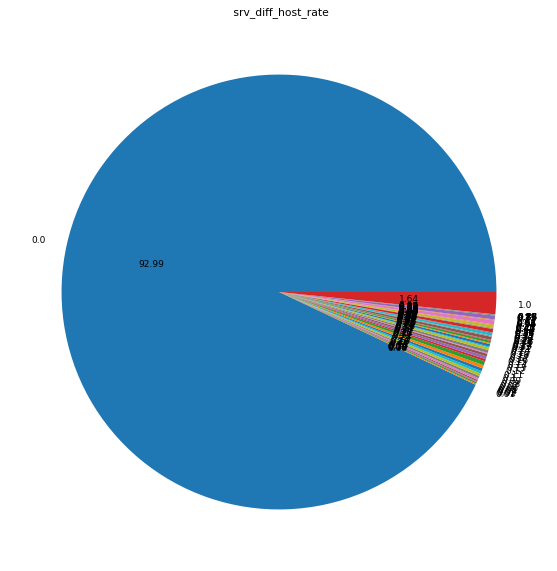

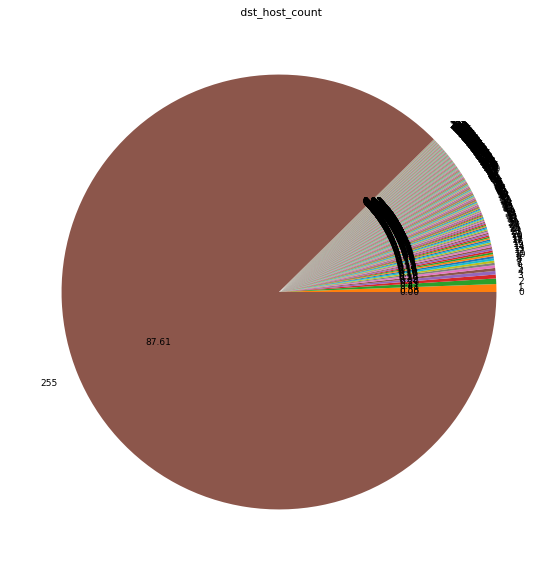

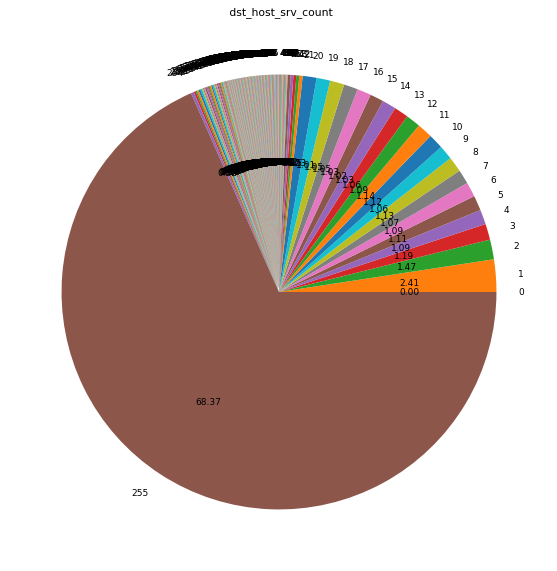

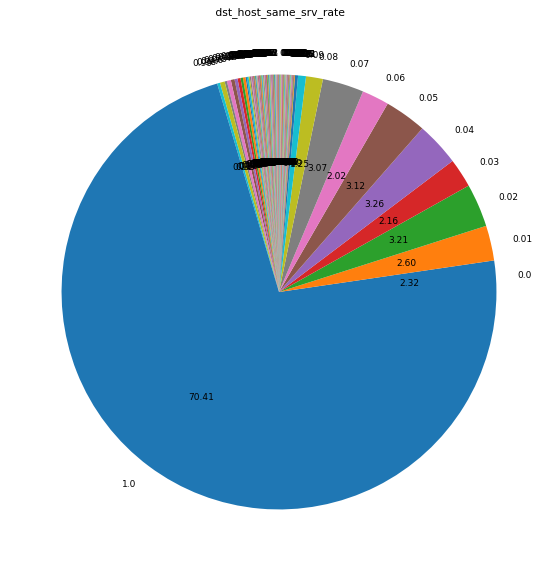

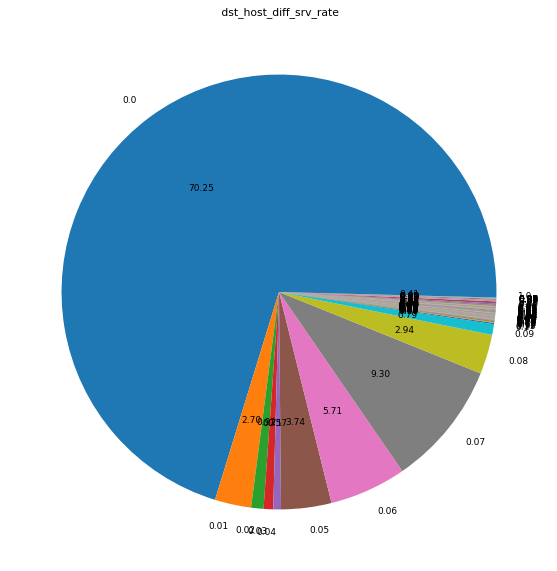

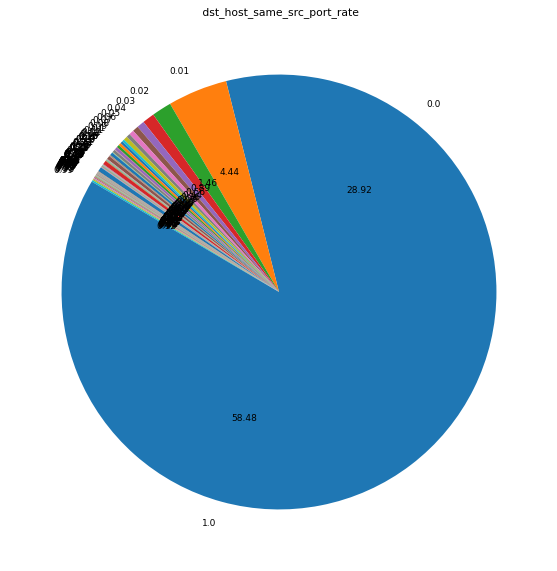

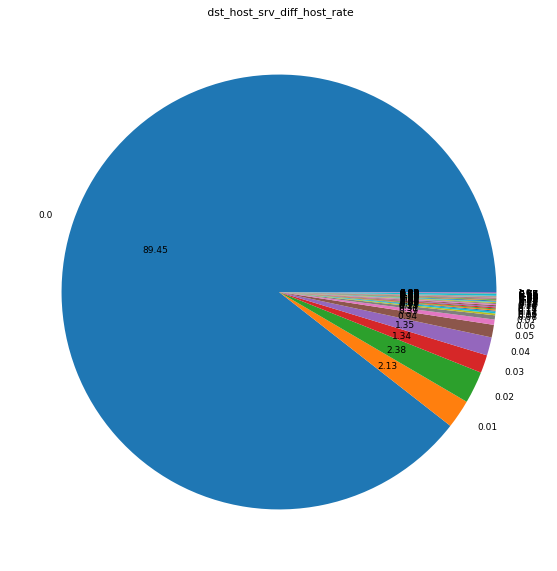

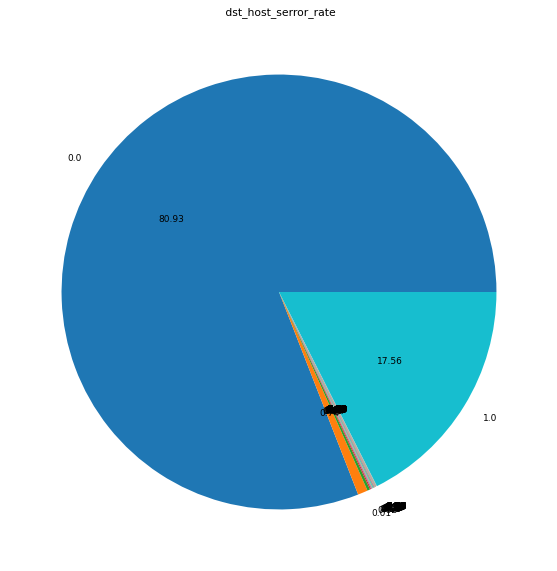

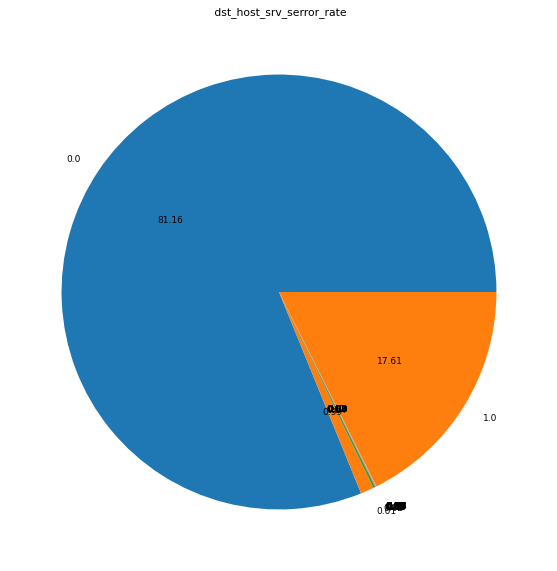

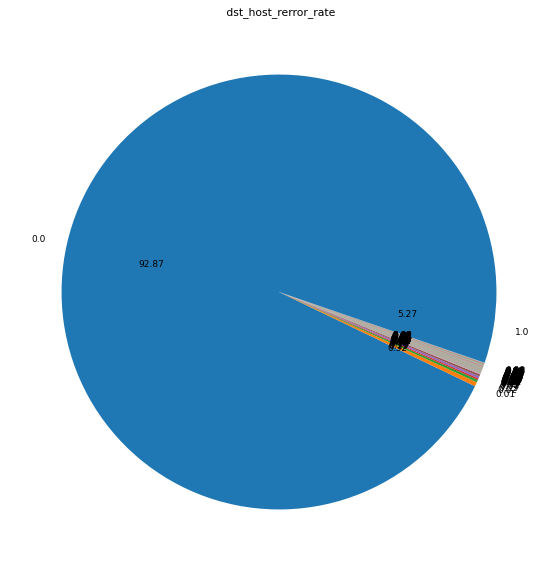

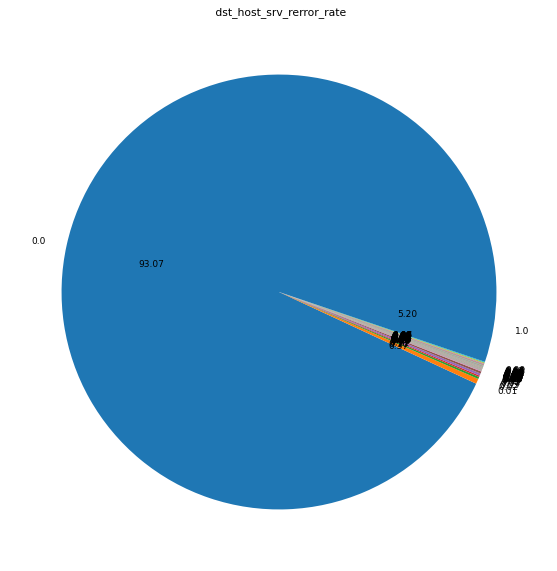

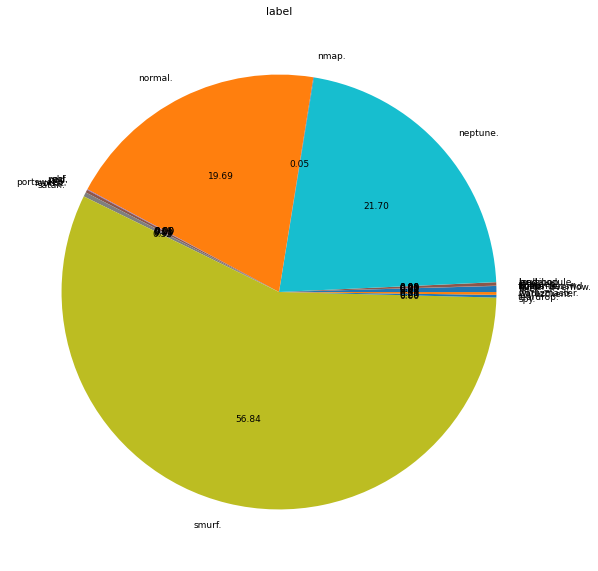

In [193]:
def pieplotting(feature):
    feature_map = kdd_data.groupby(by=[value]).size().to_frame('count').reset_index() 
    fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(aspect="equal"))
    
    plt.pie(feature_map['count'],labels=feature_map[feature], autopct='%.2f')
    ax.set_title(feature)
    plt.show()
    
for value in kdd_data.columns: 
    pieplotting(value)


## 5. Visualise the difference in the scales of individual features between normal and abnormal labels

C:\Users\Naing\anaconda3\envs\ADM_course\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


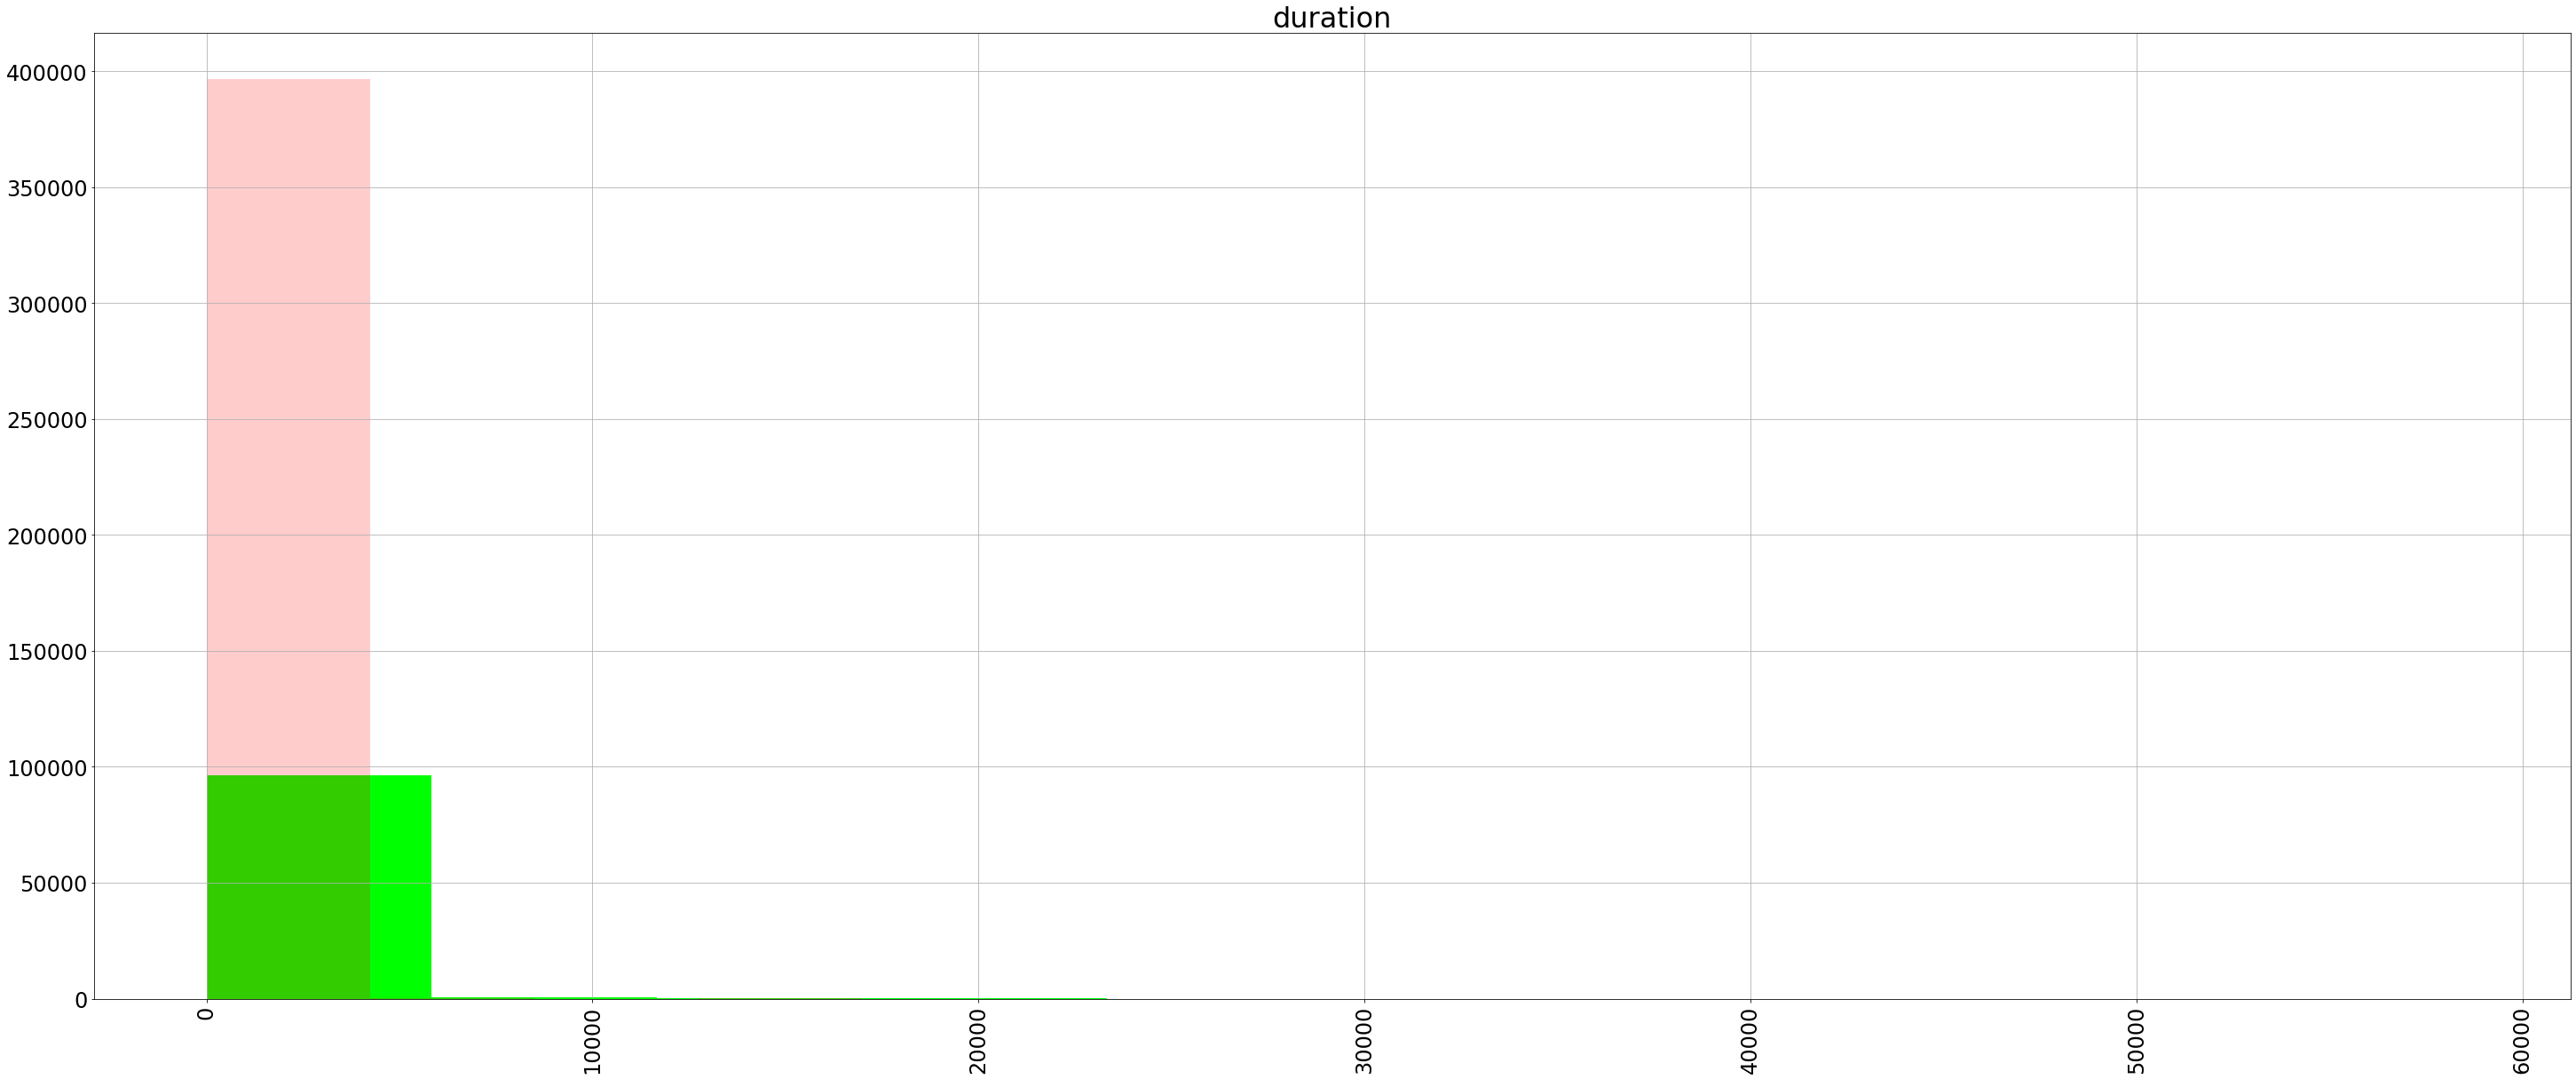

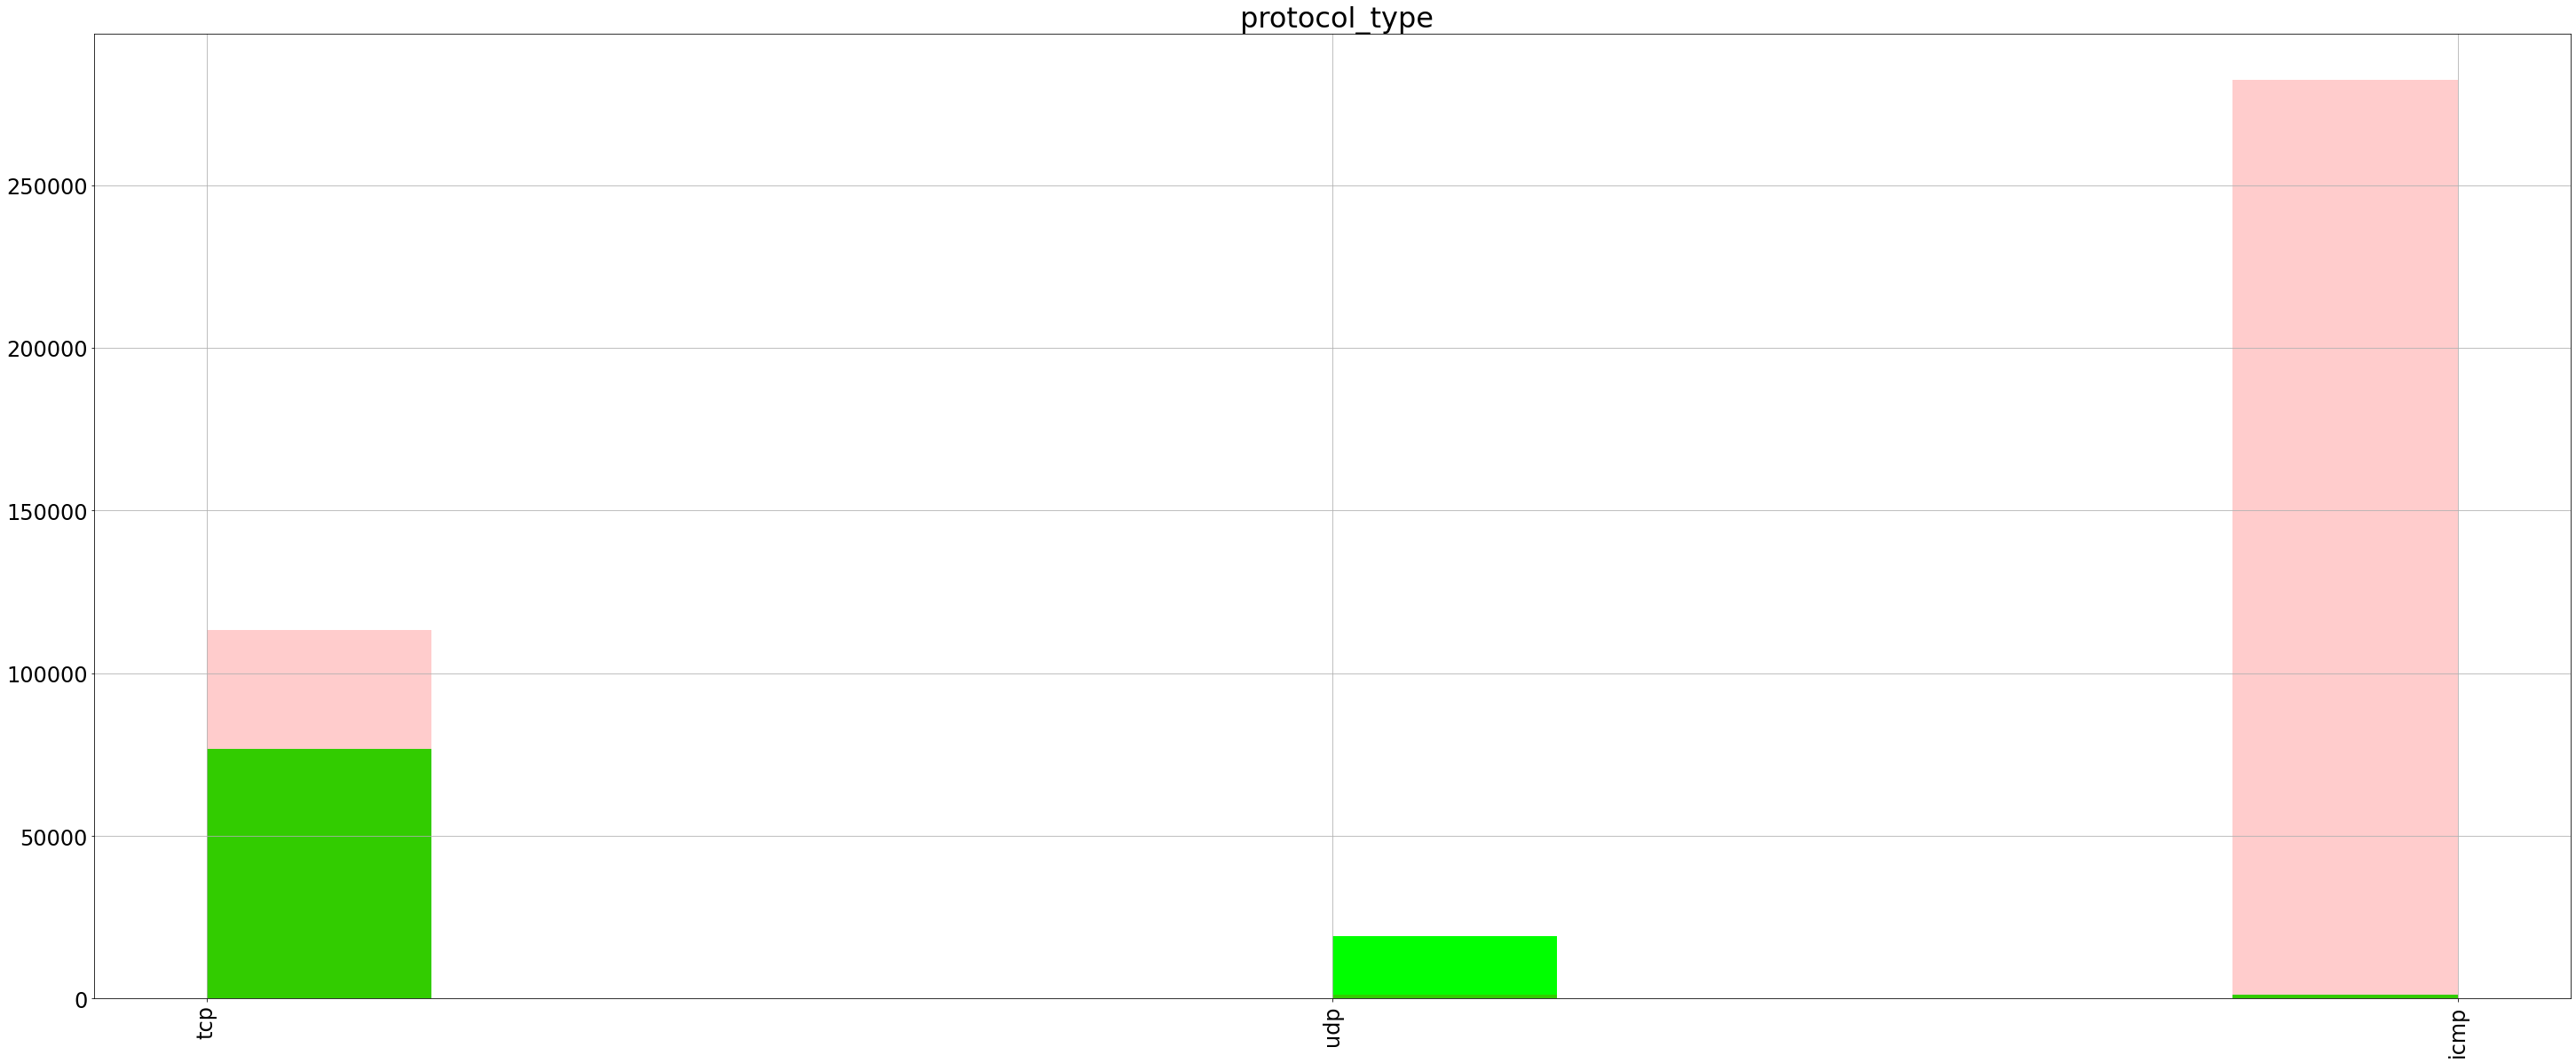

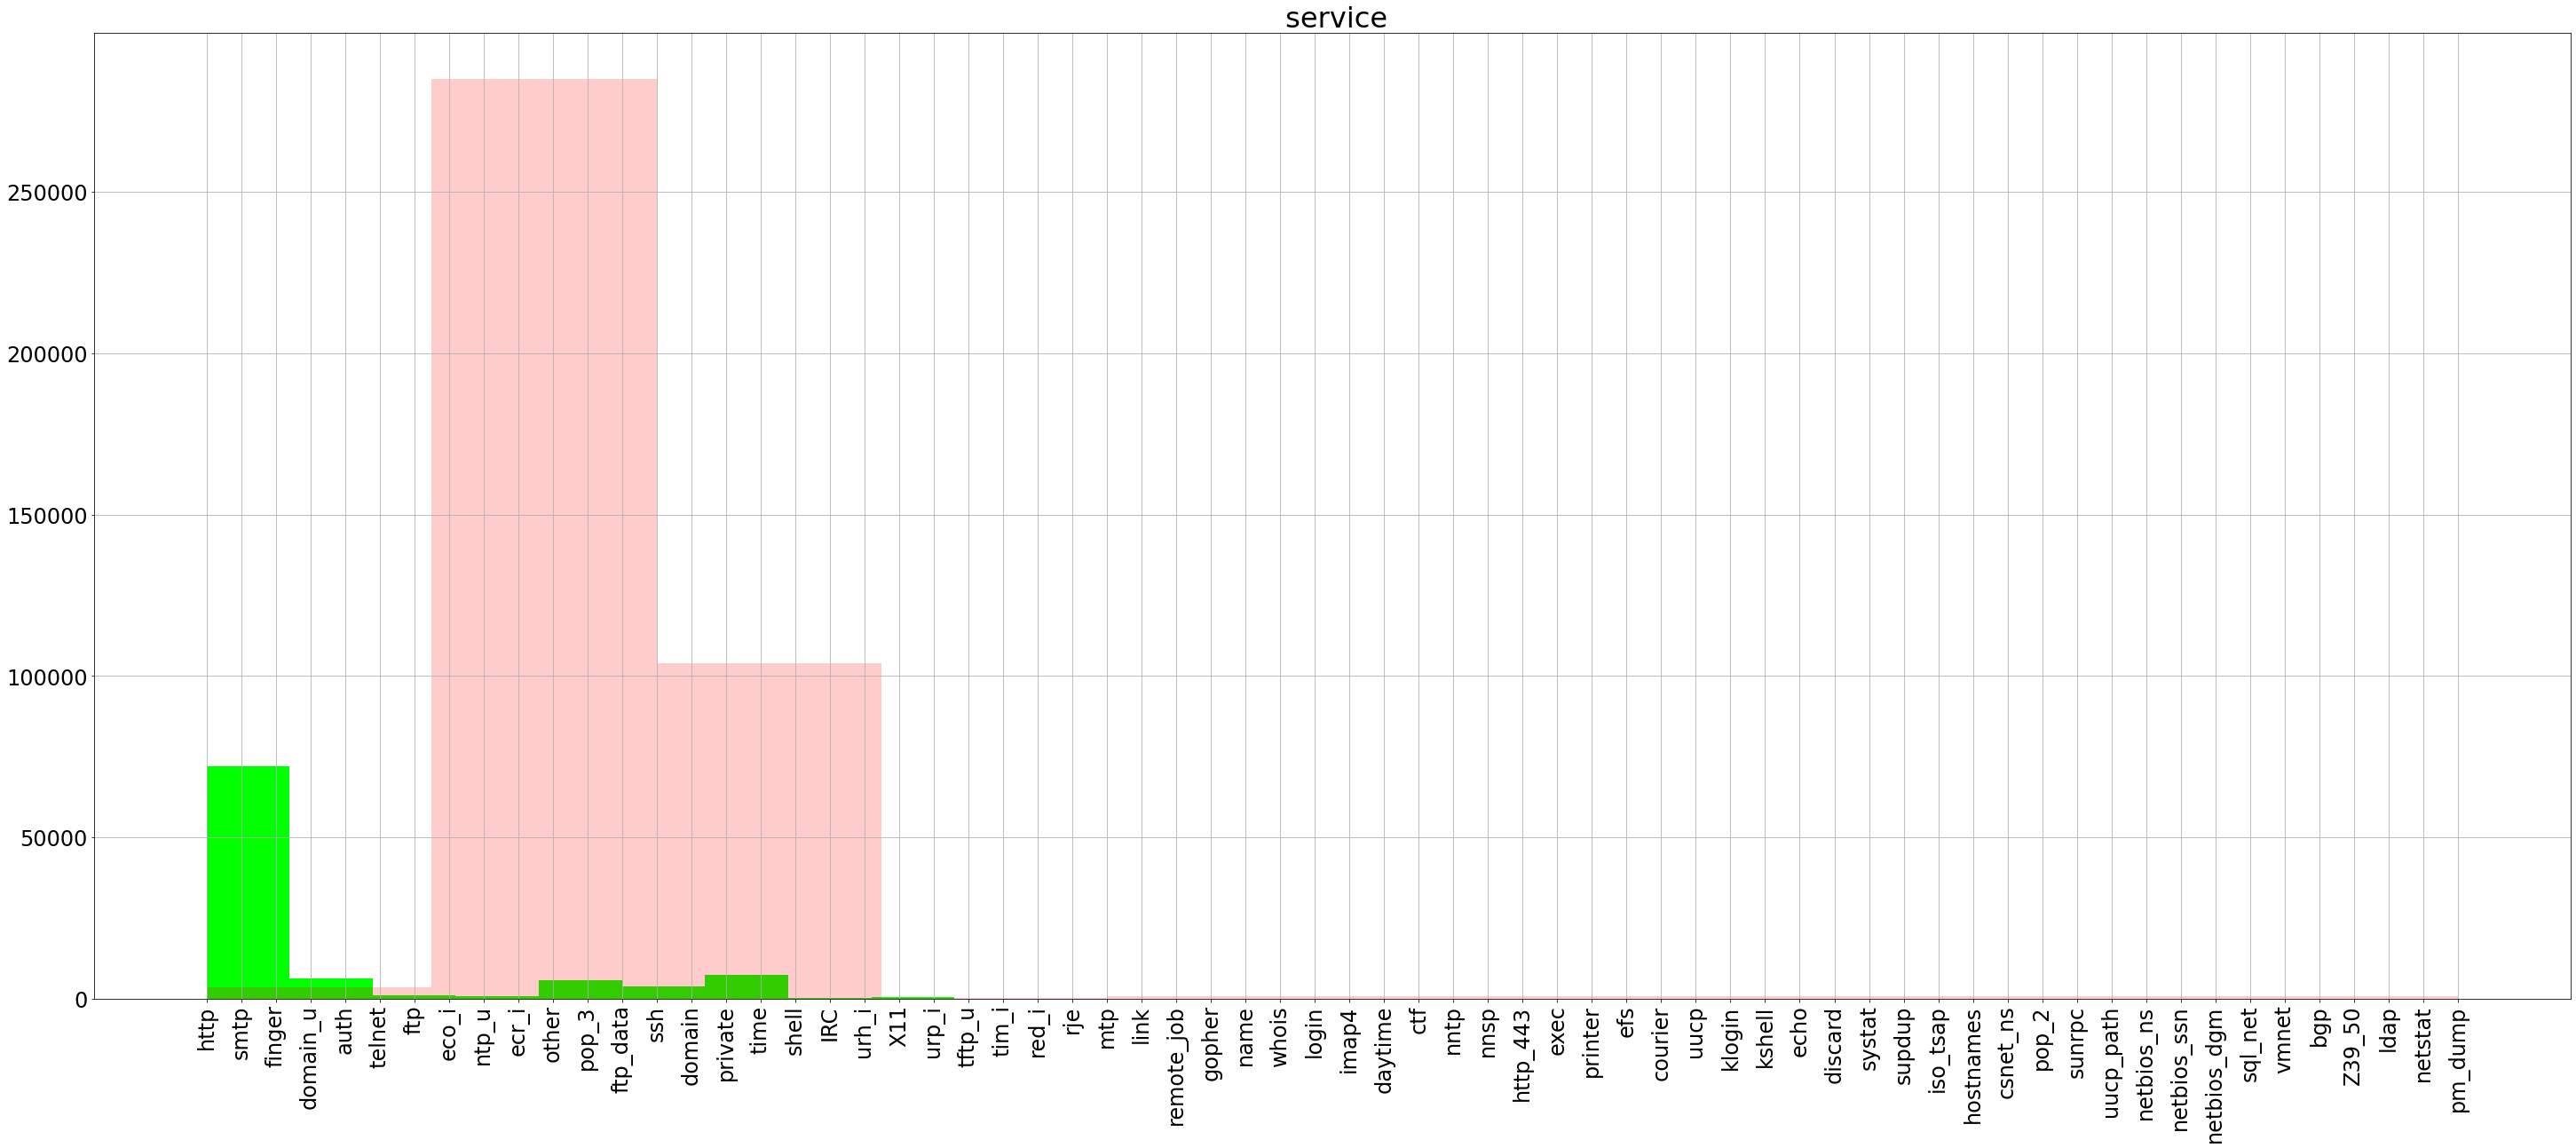

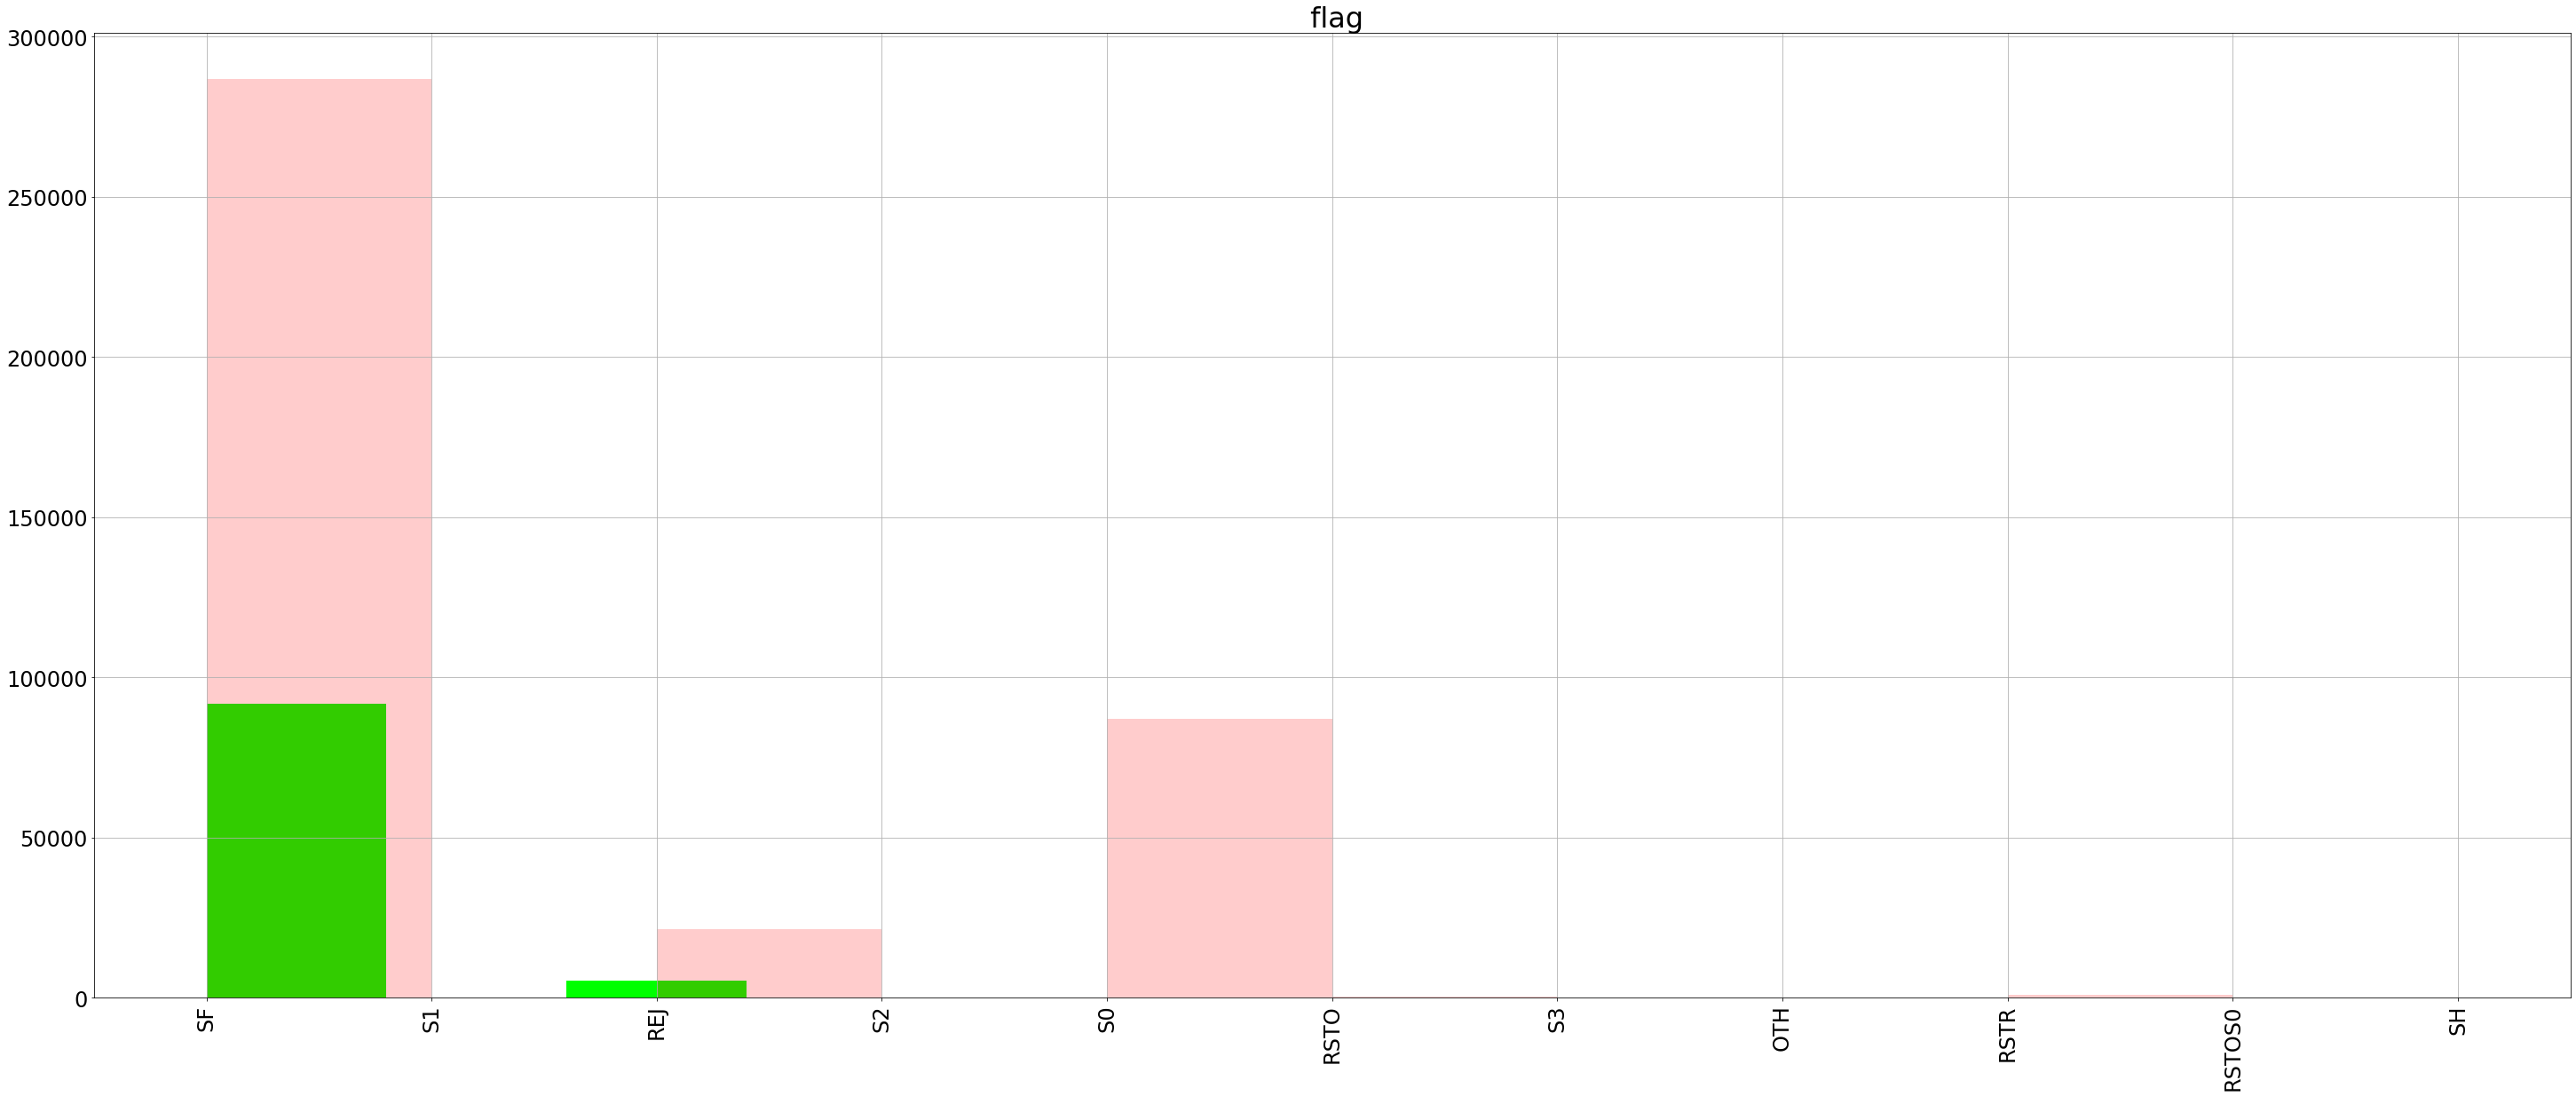

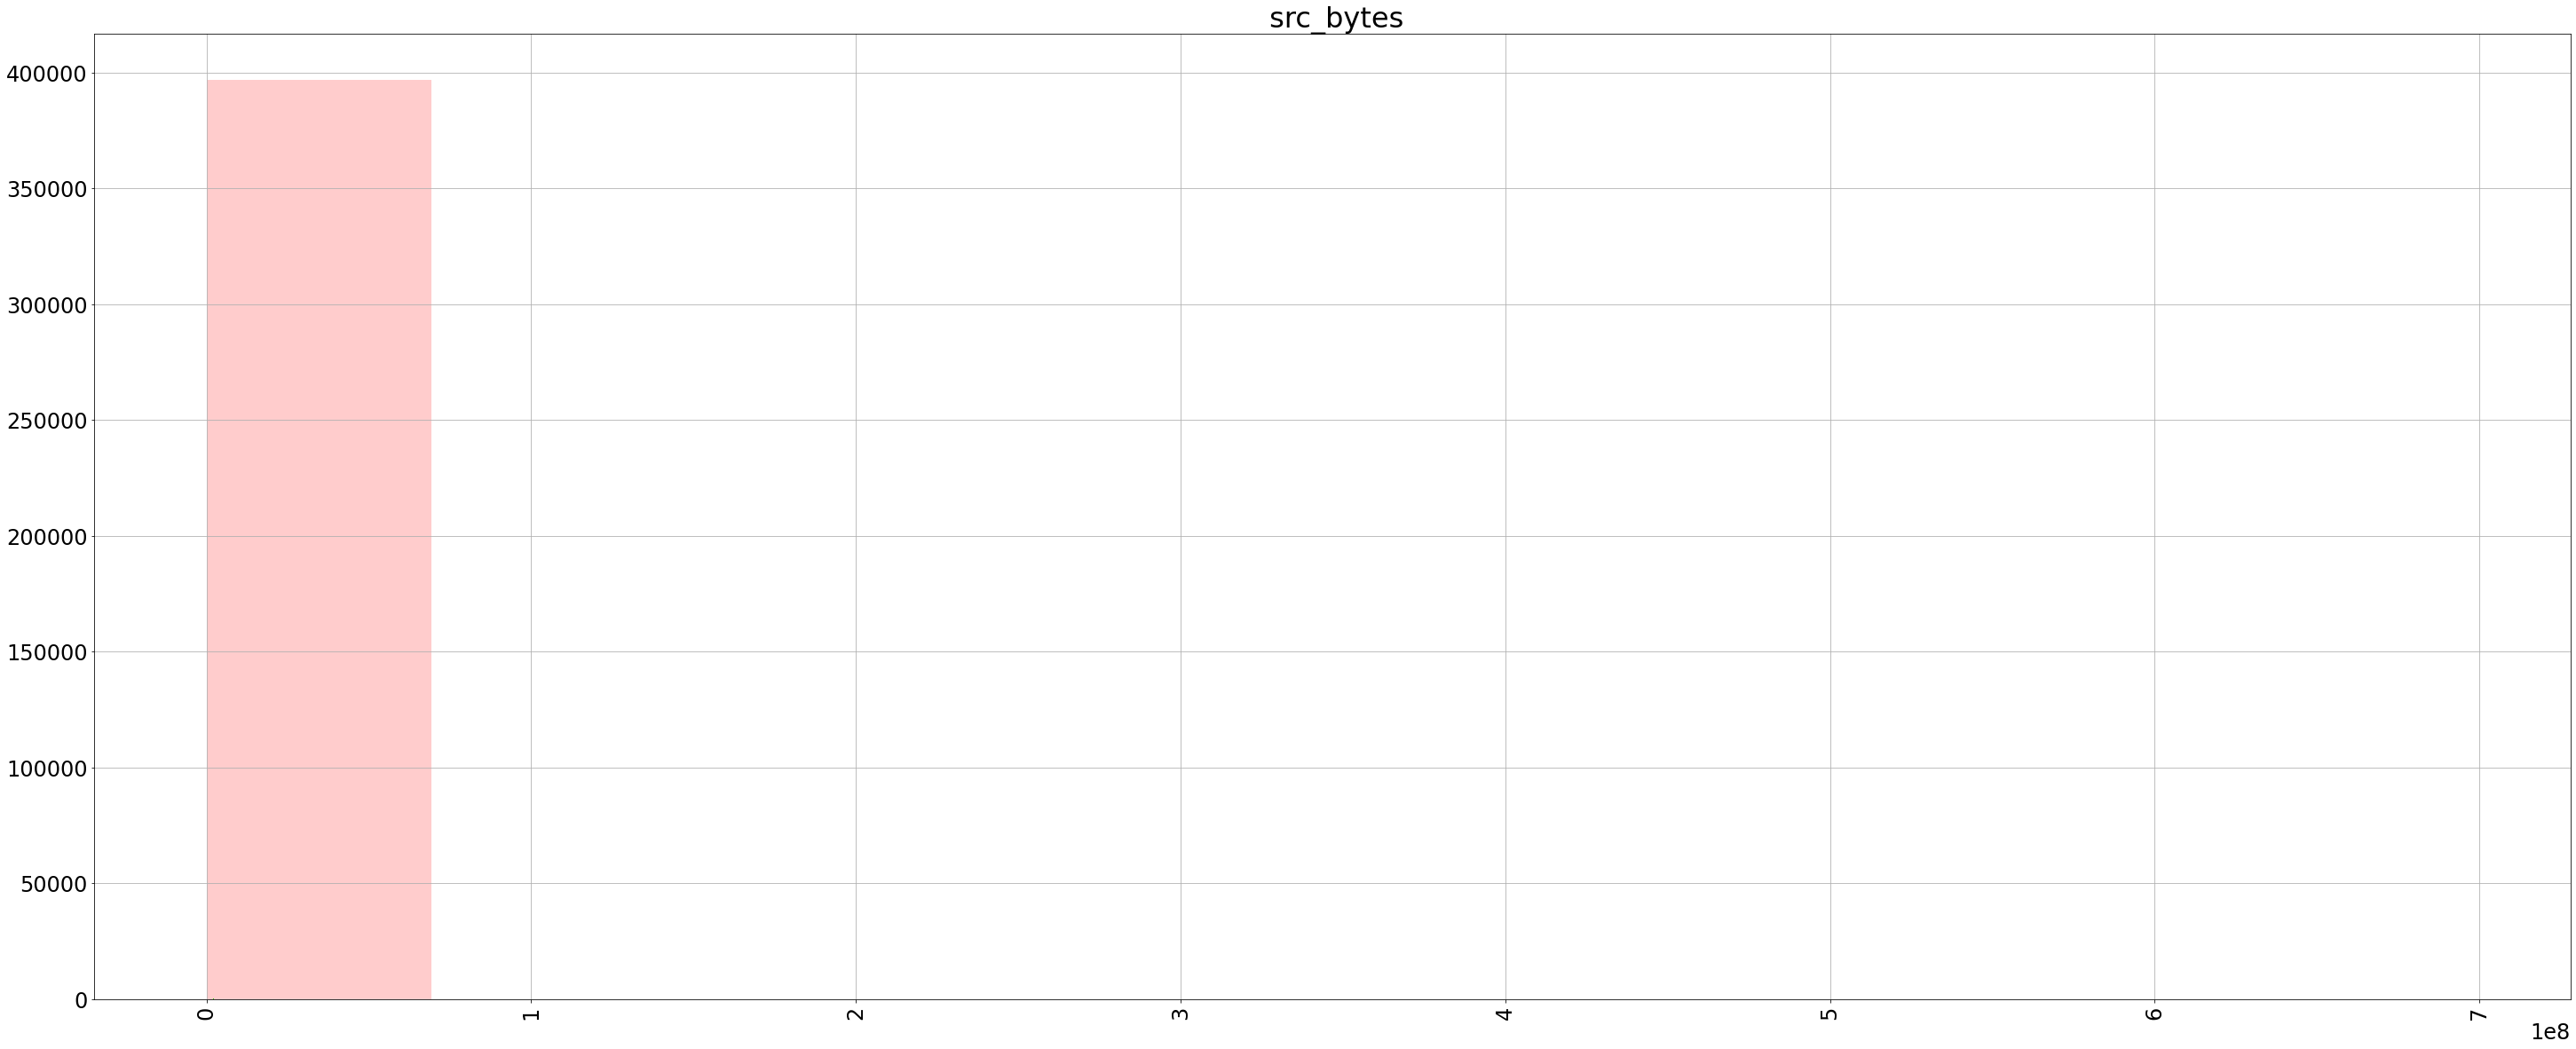

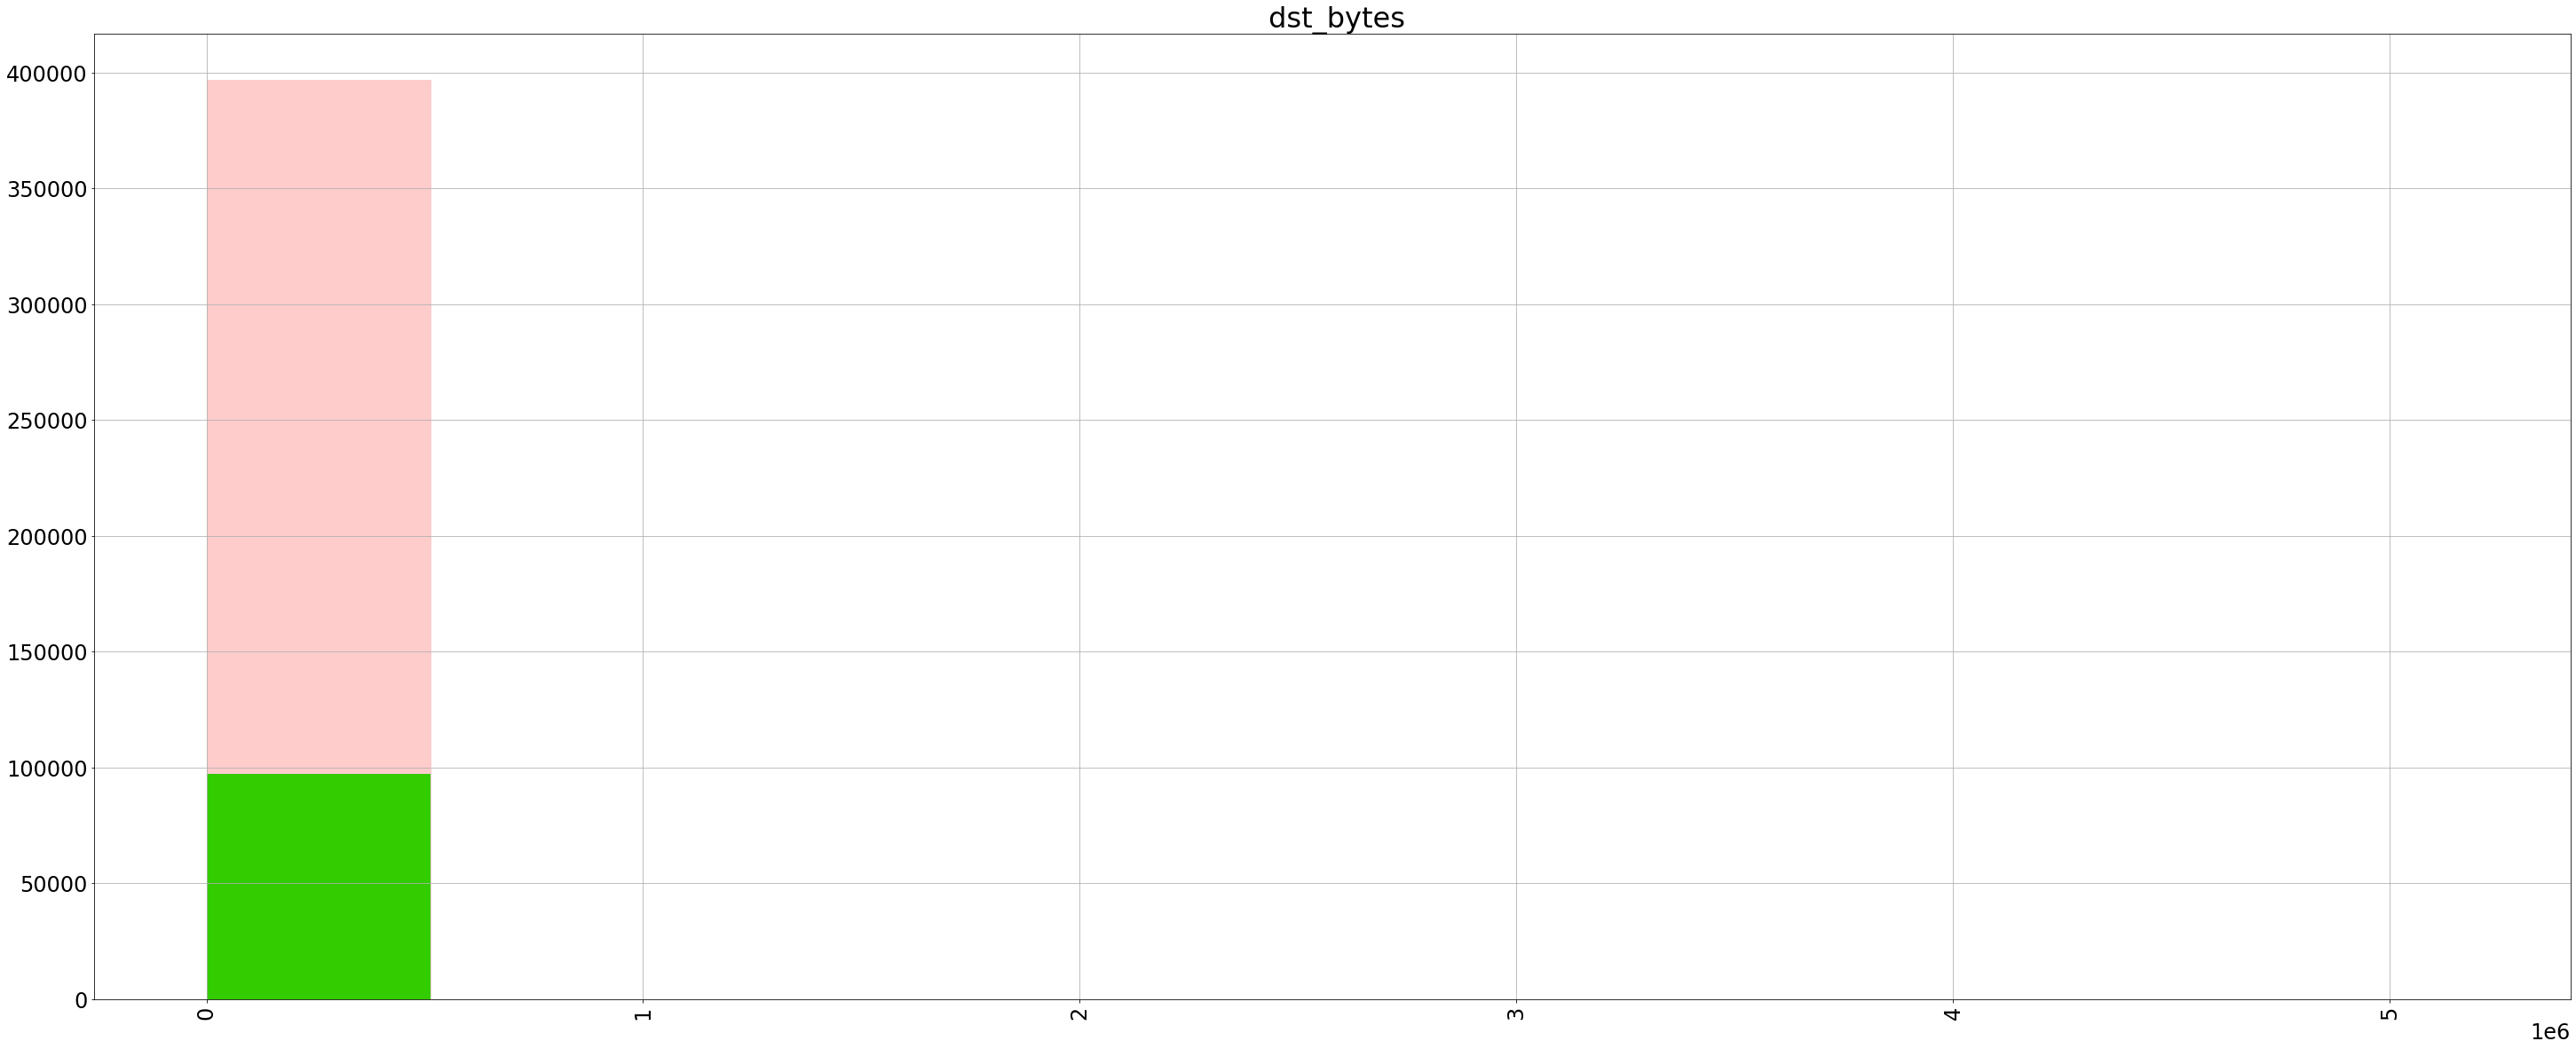

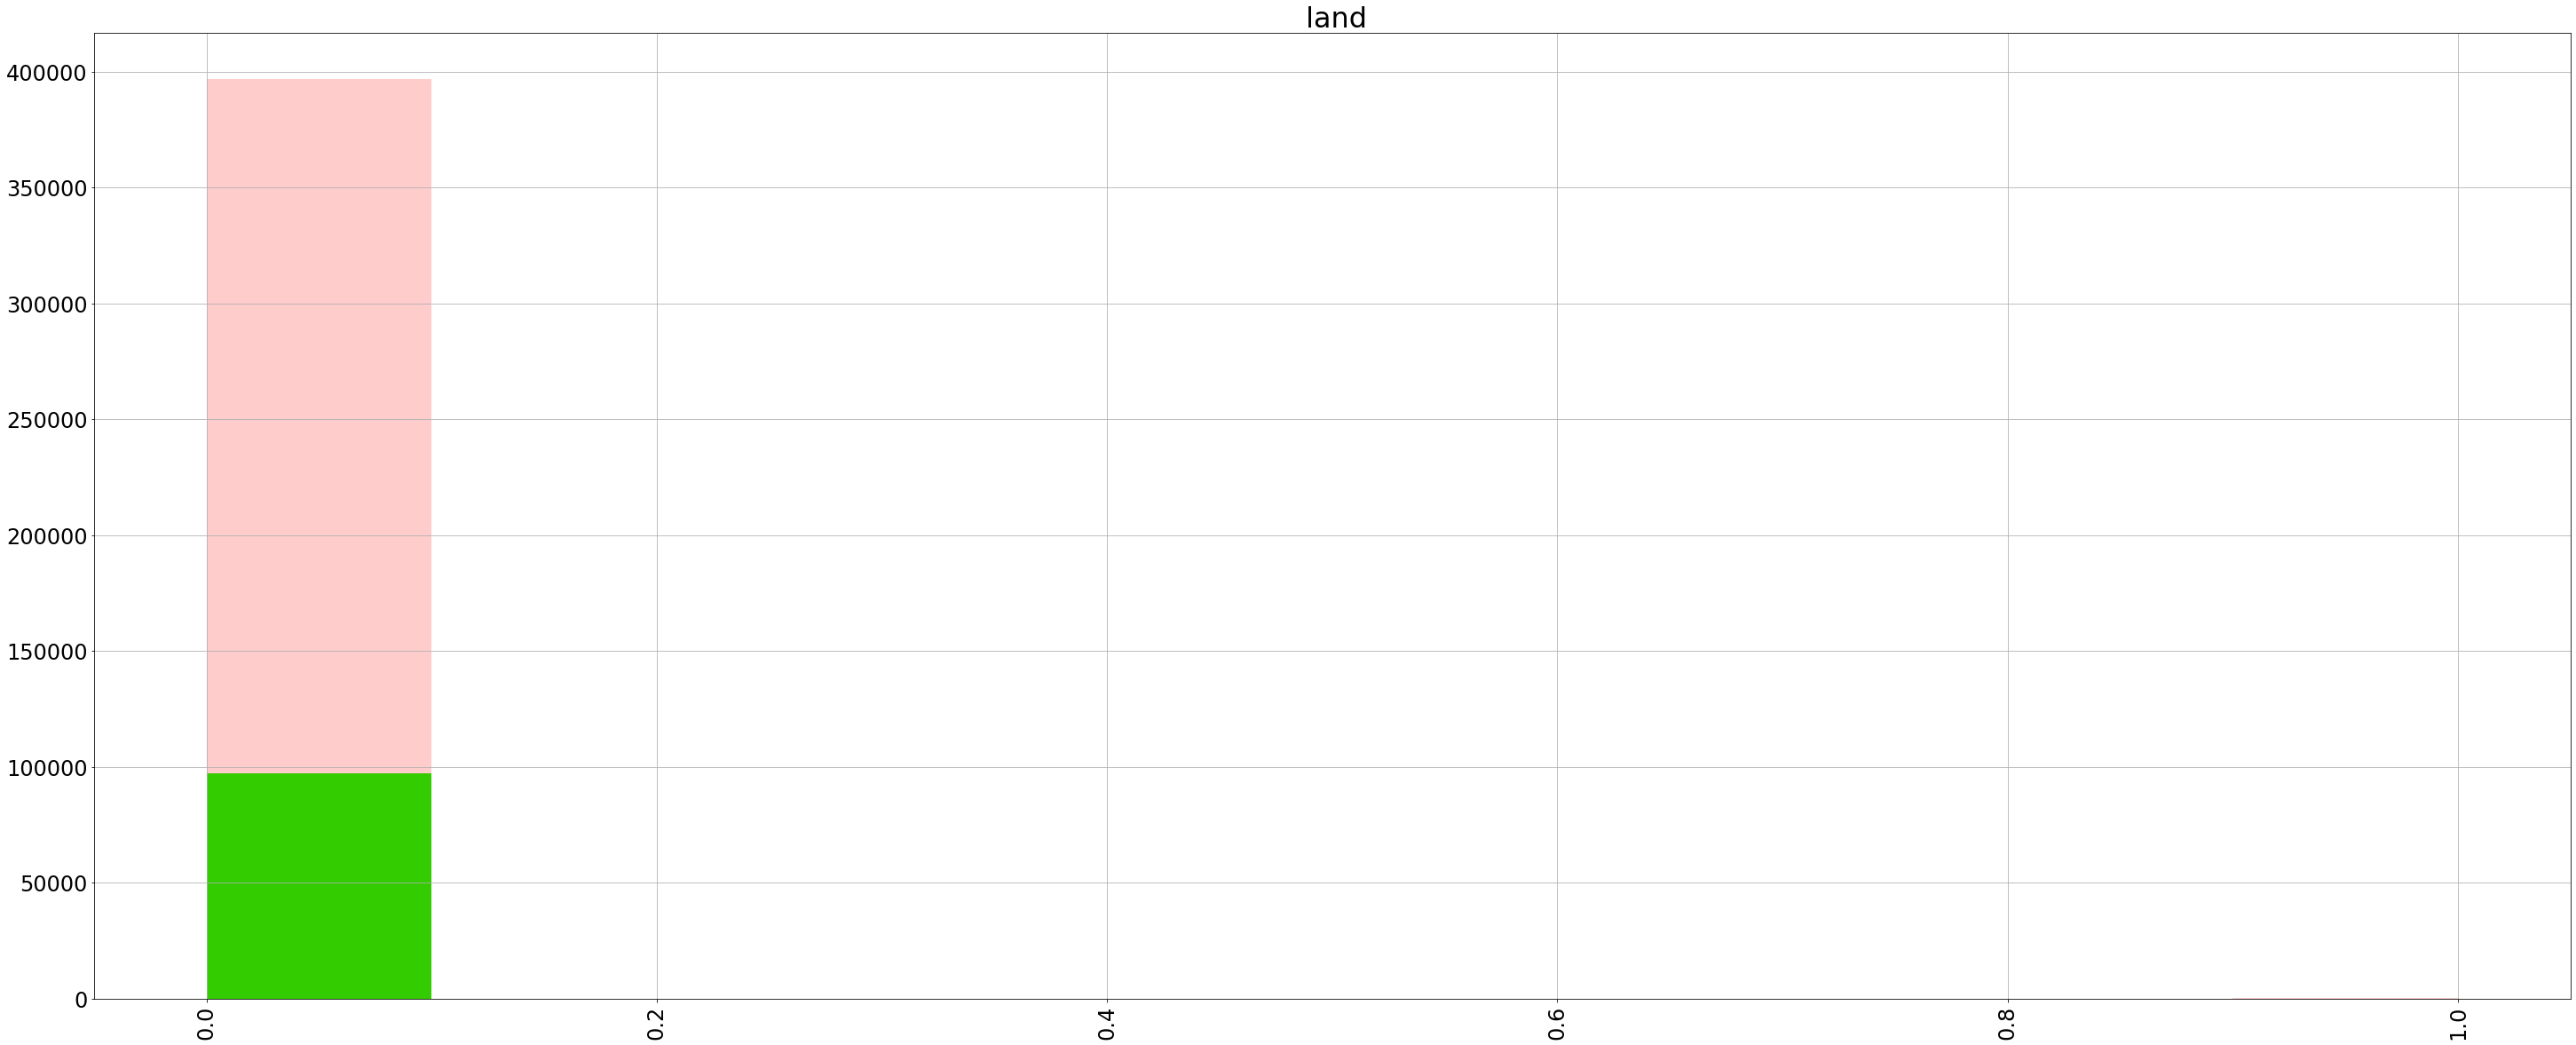

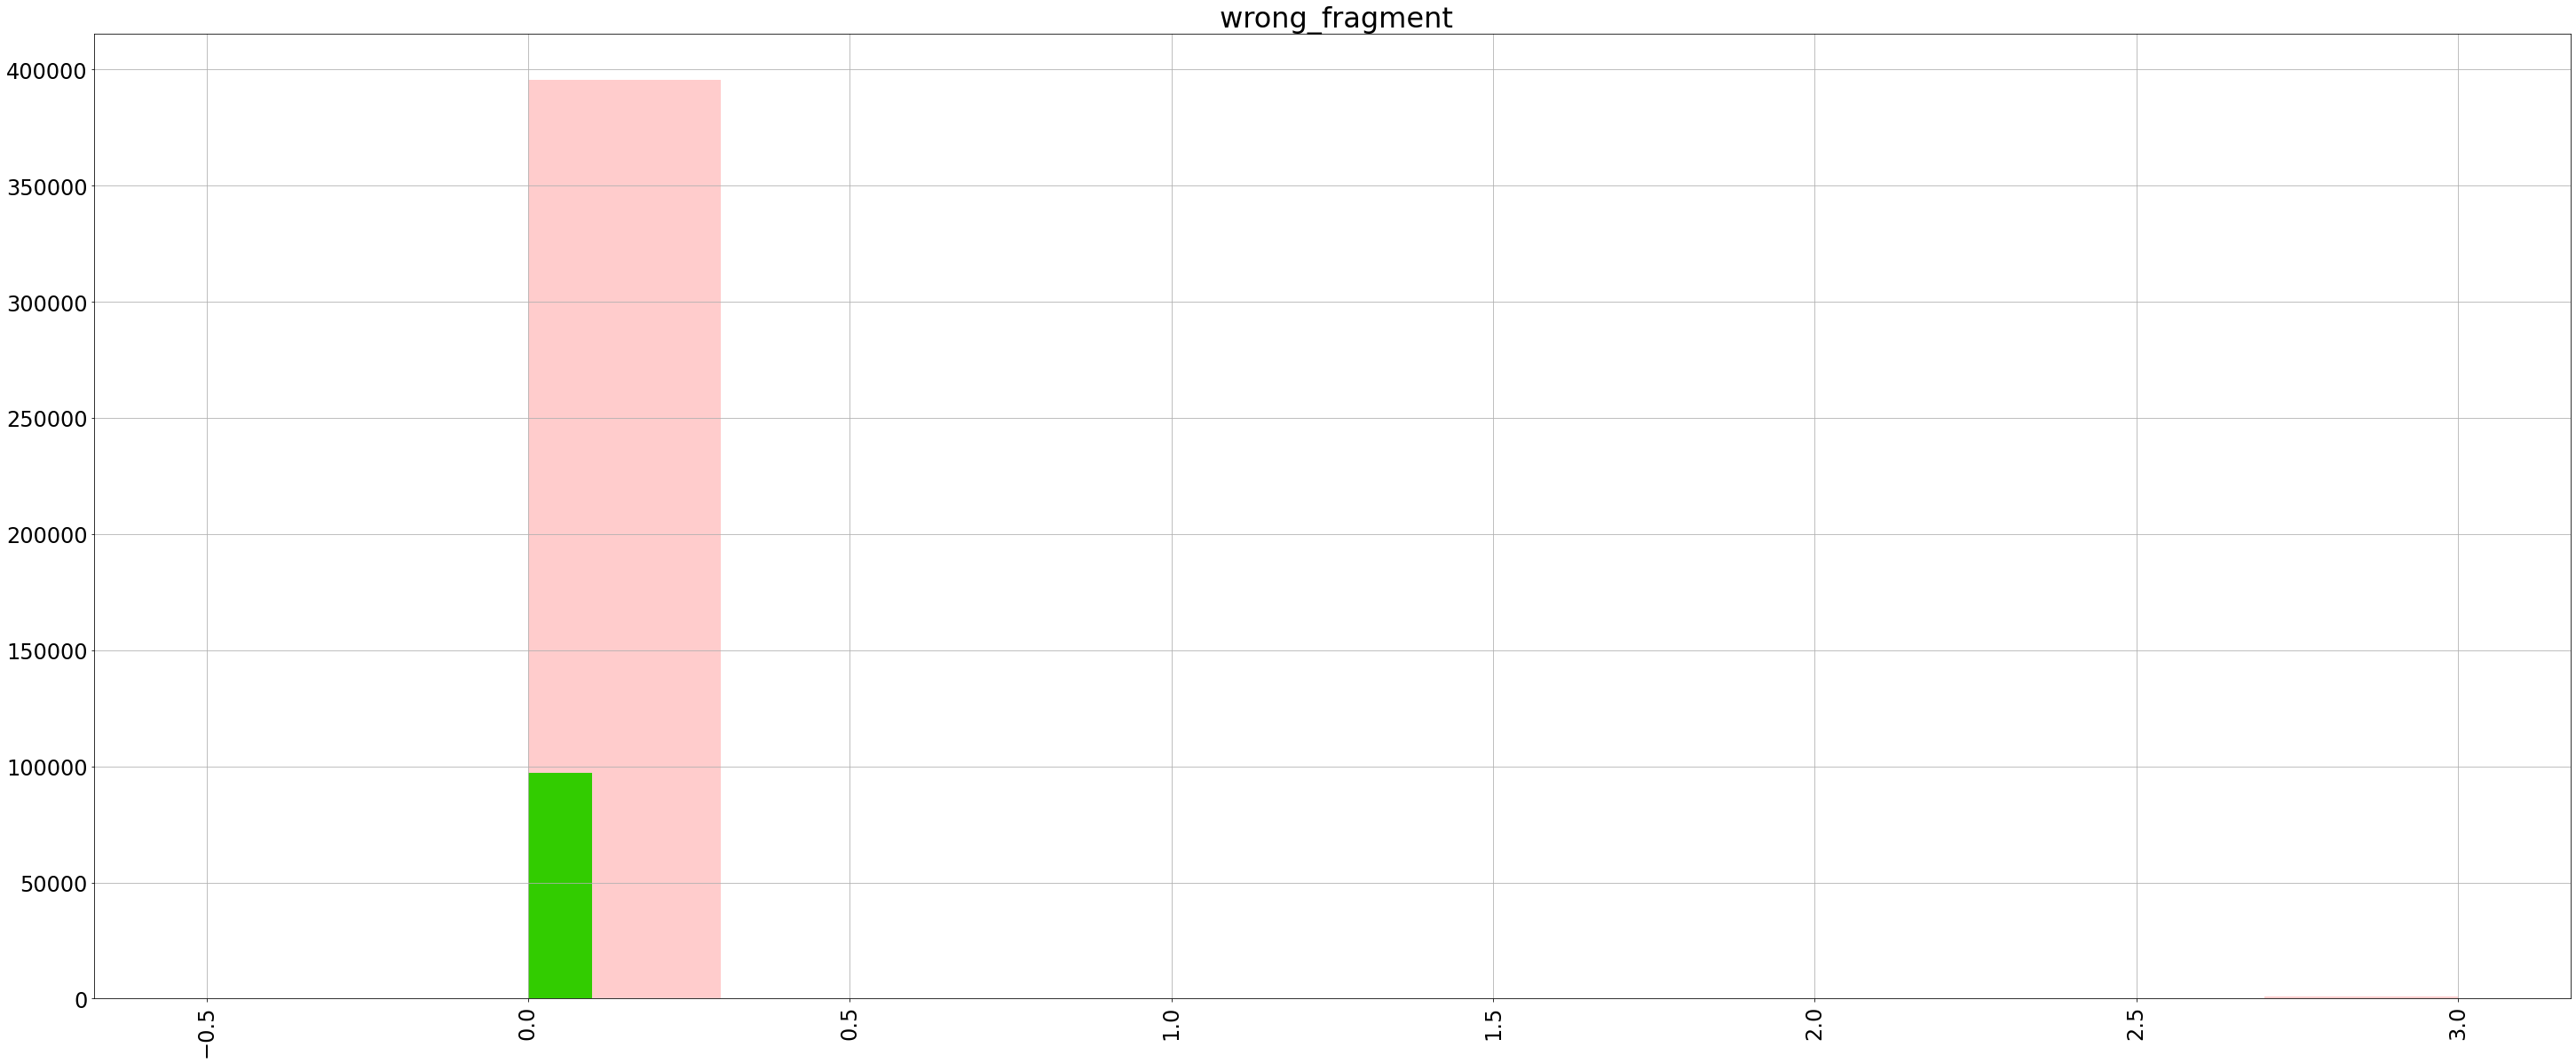

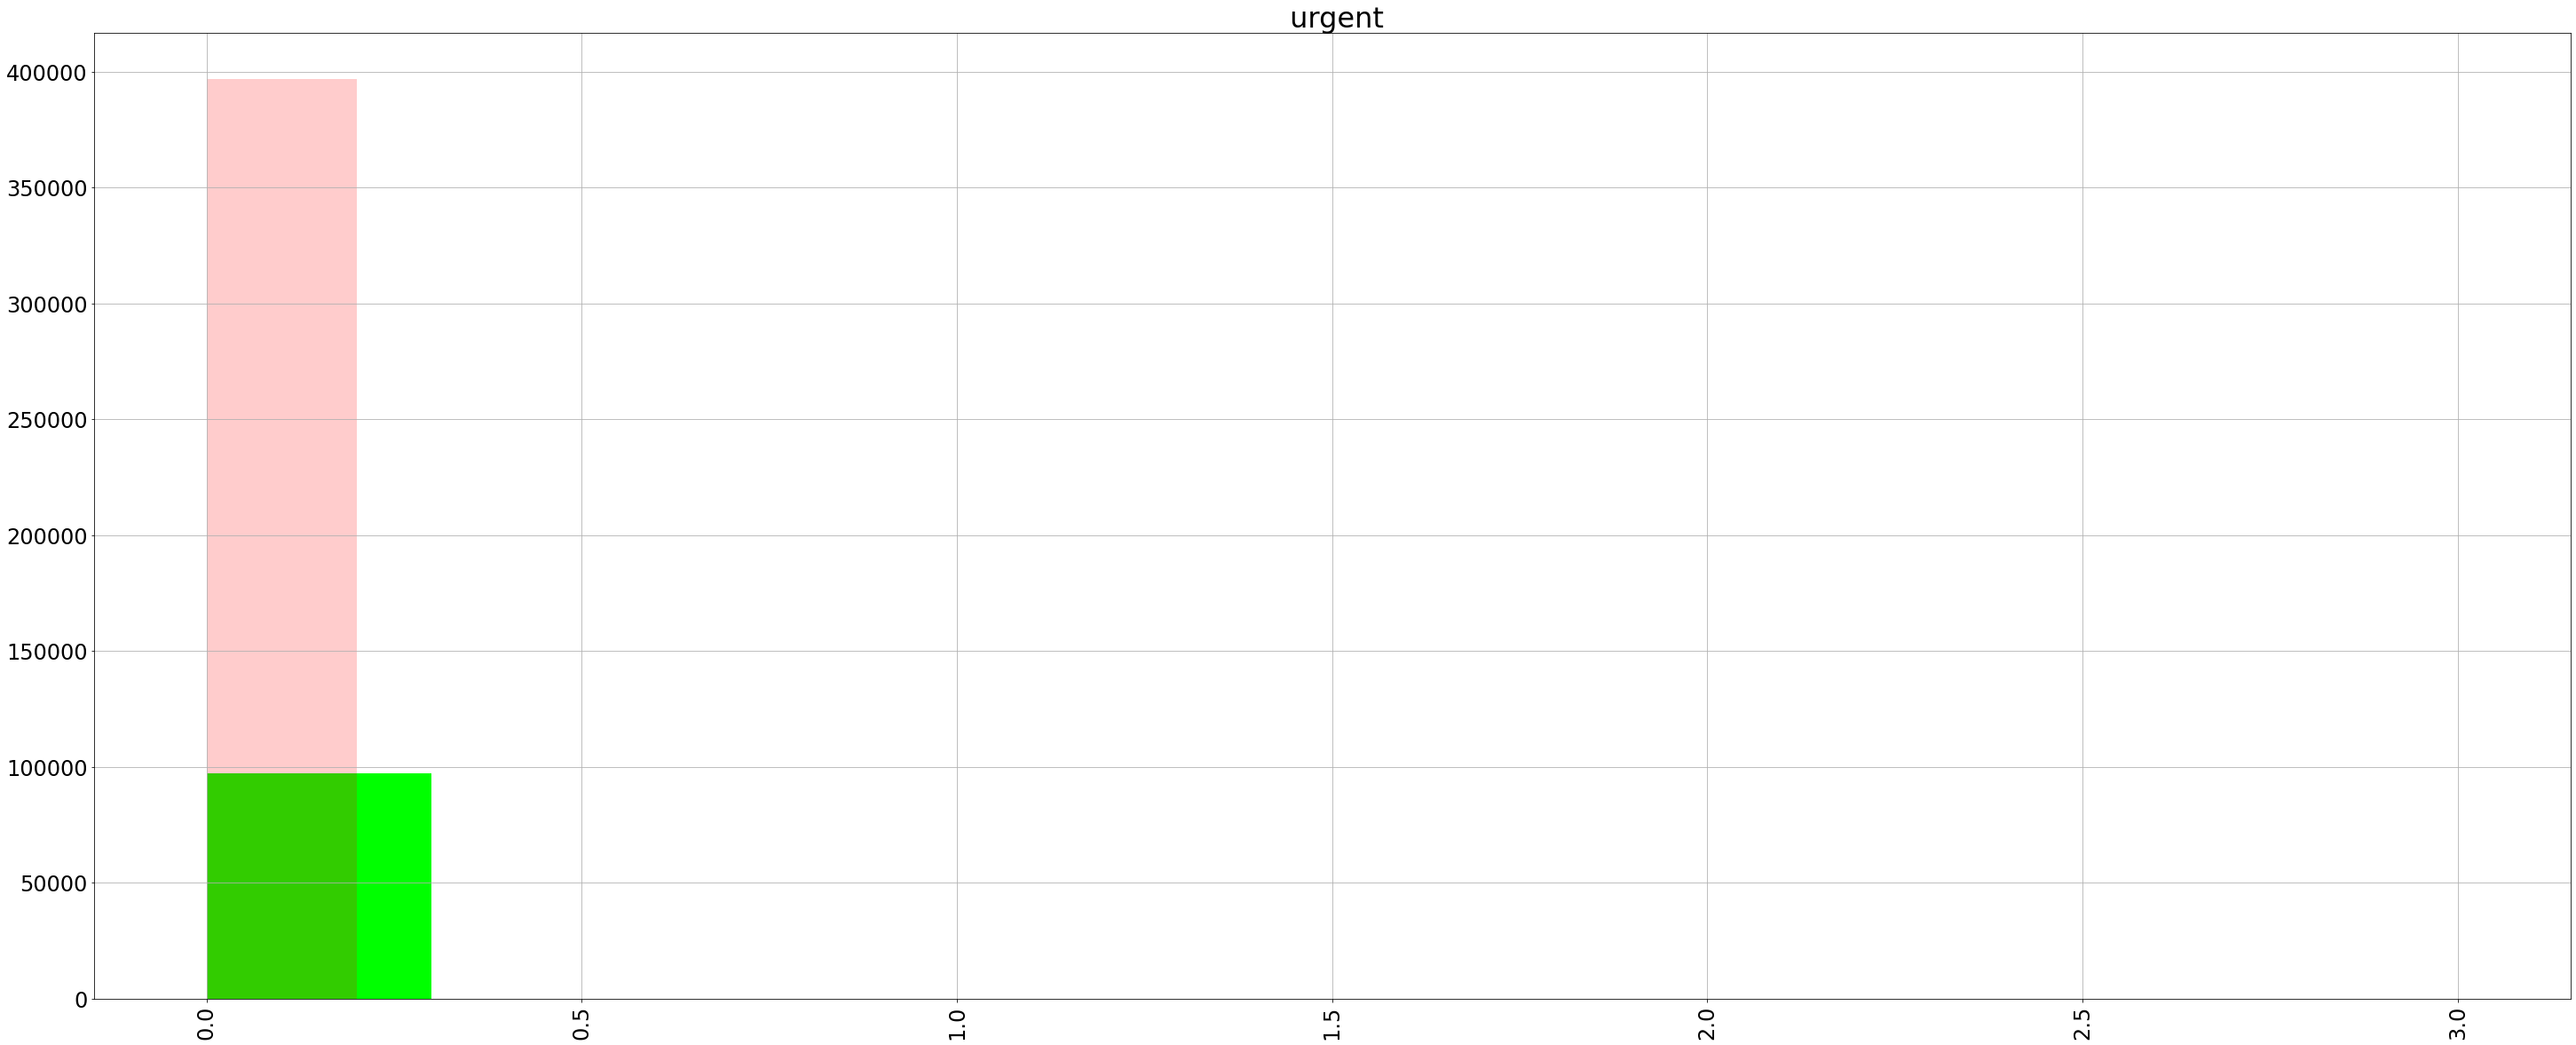

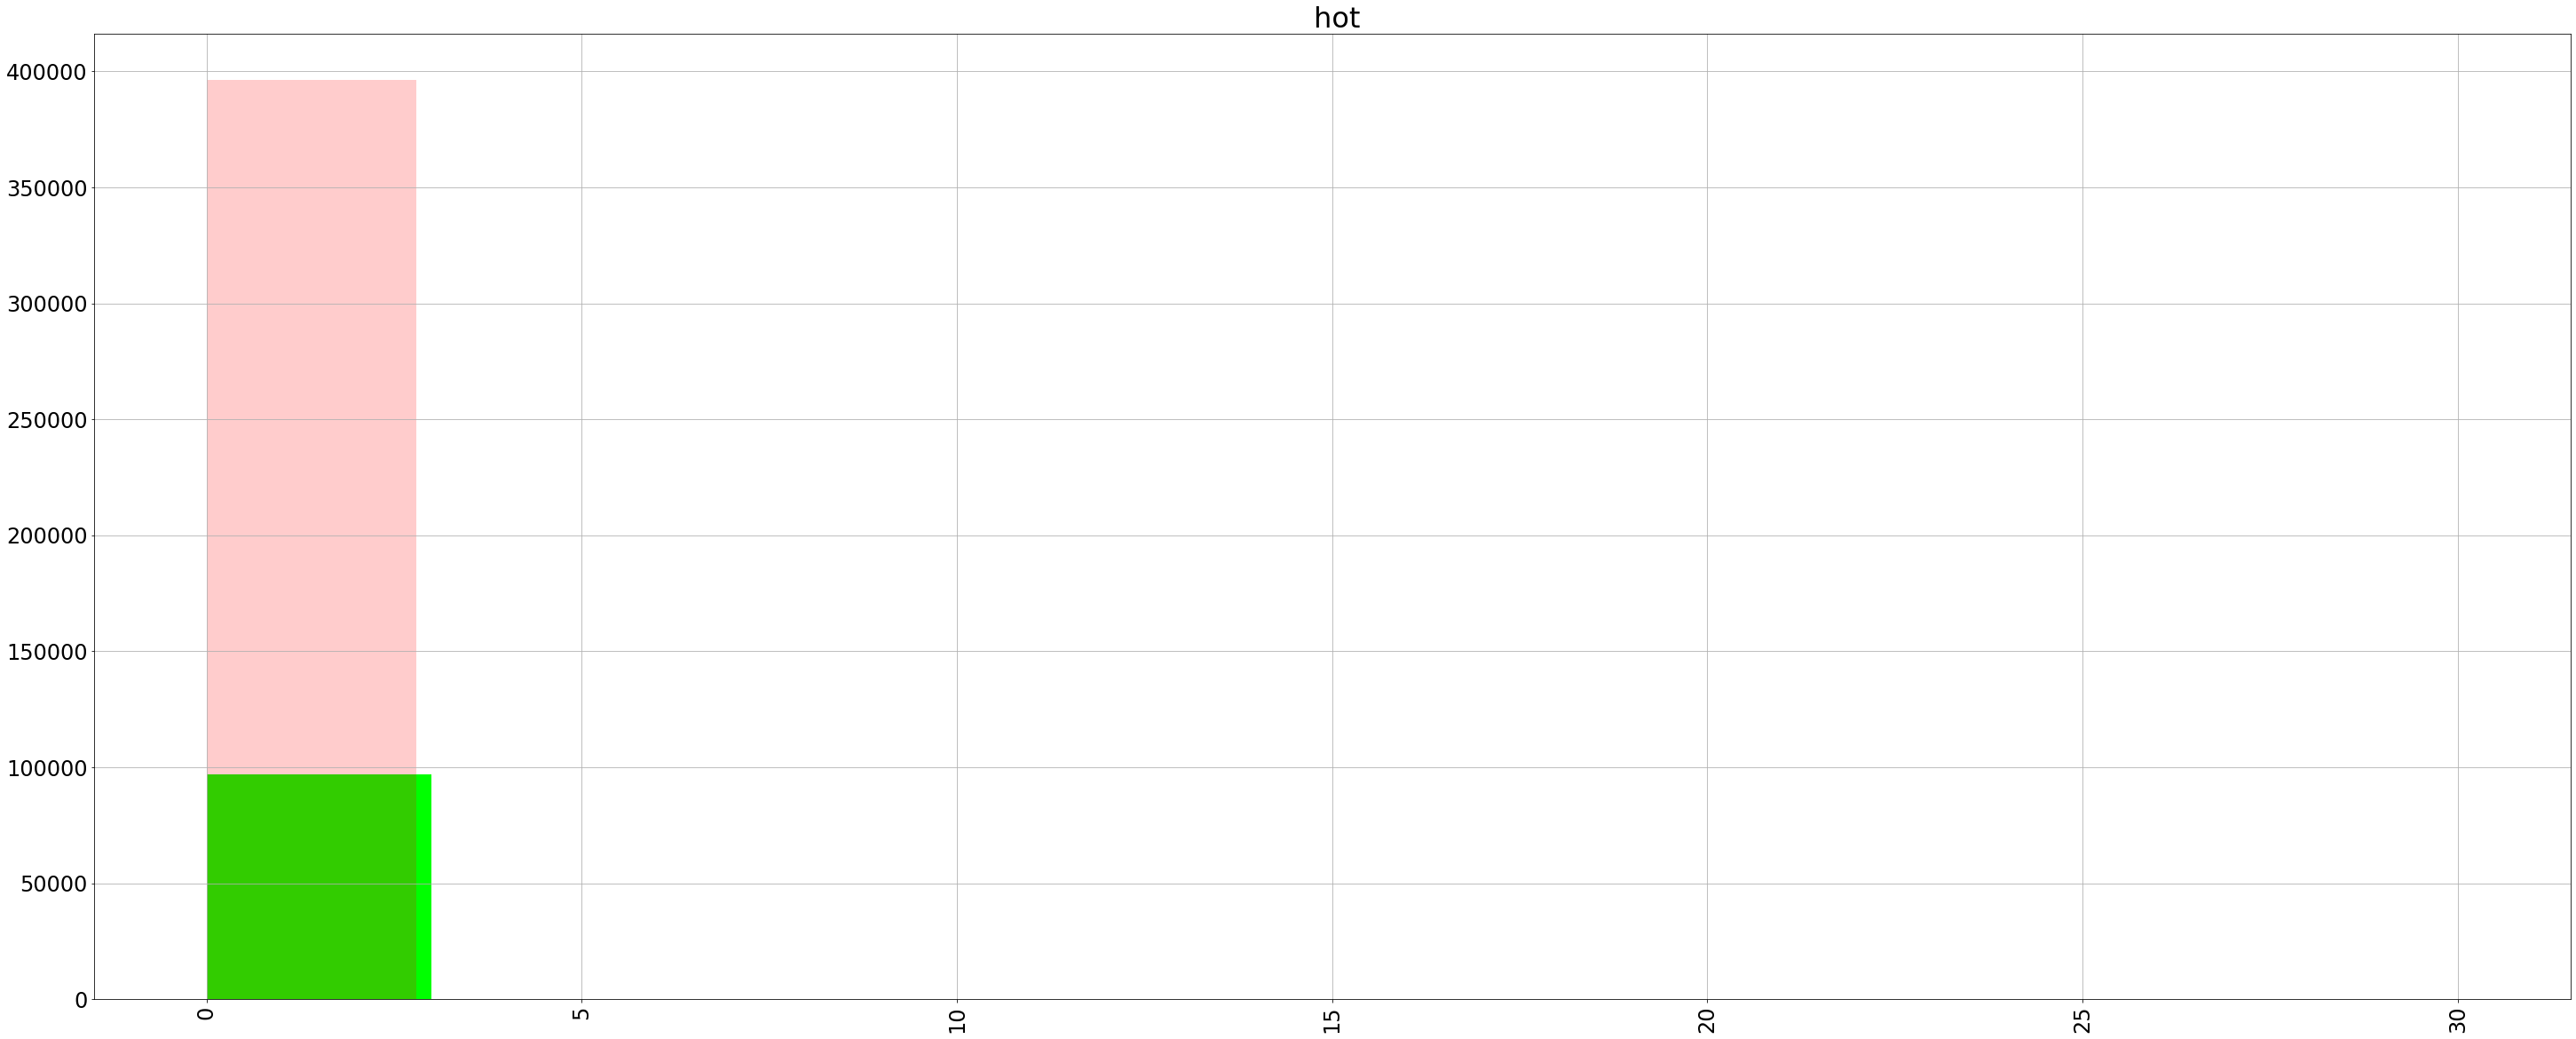

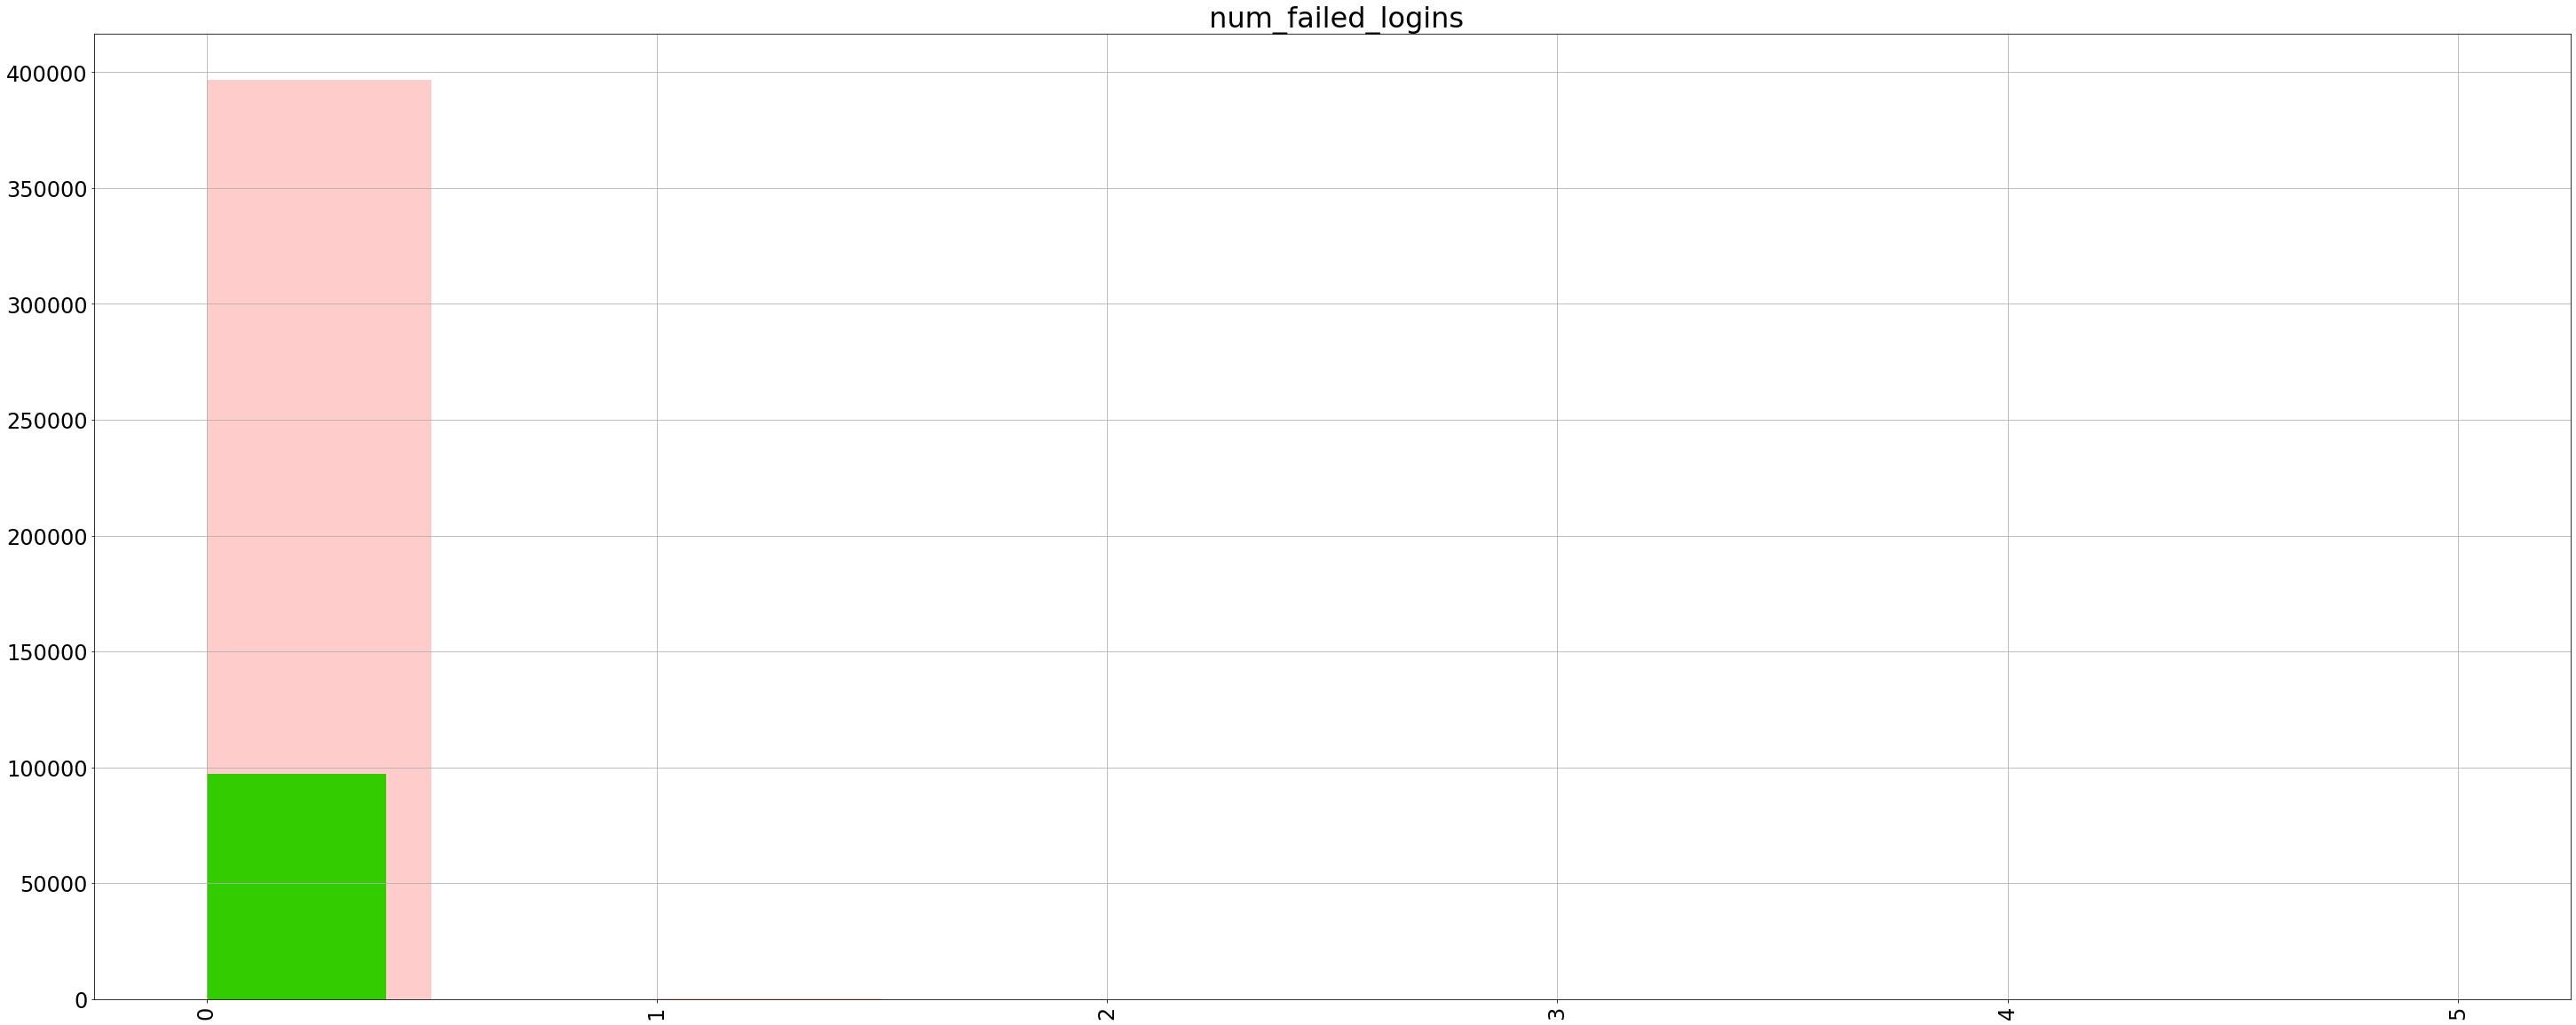

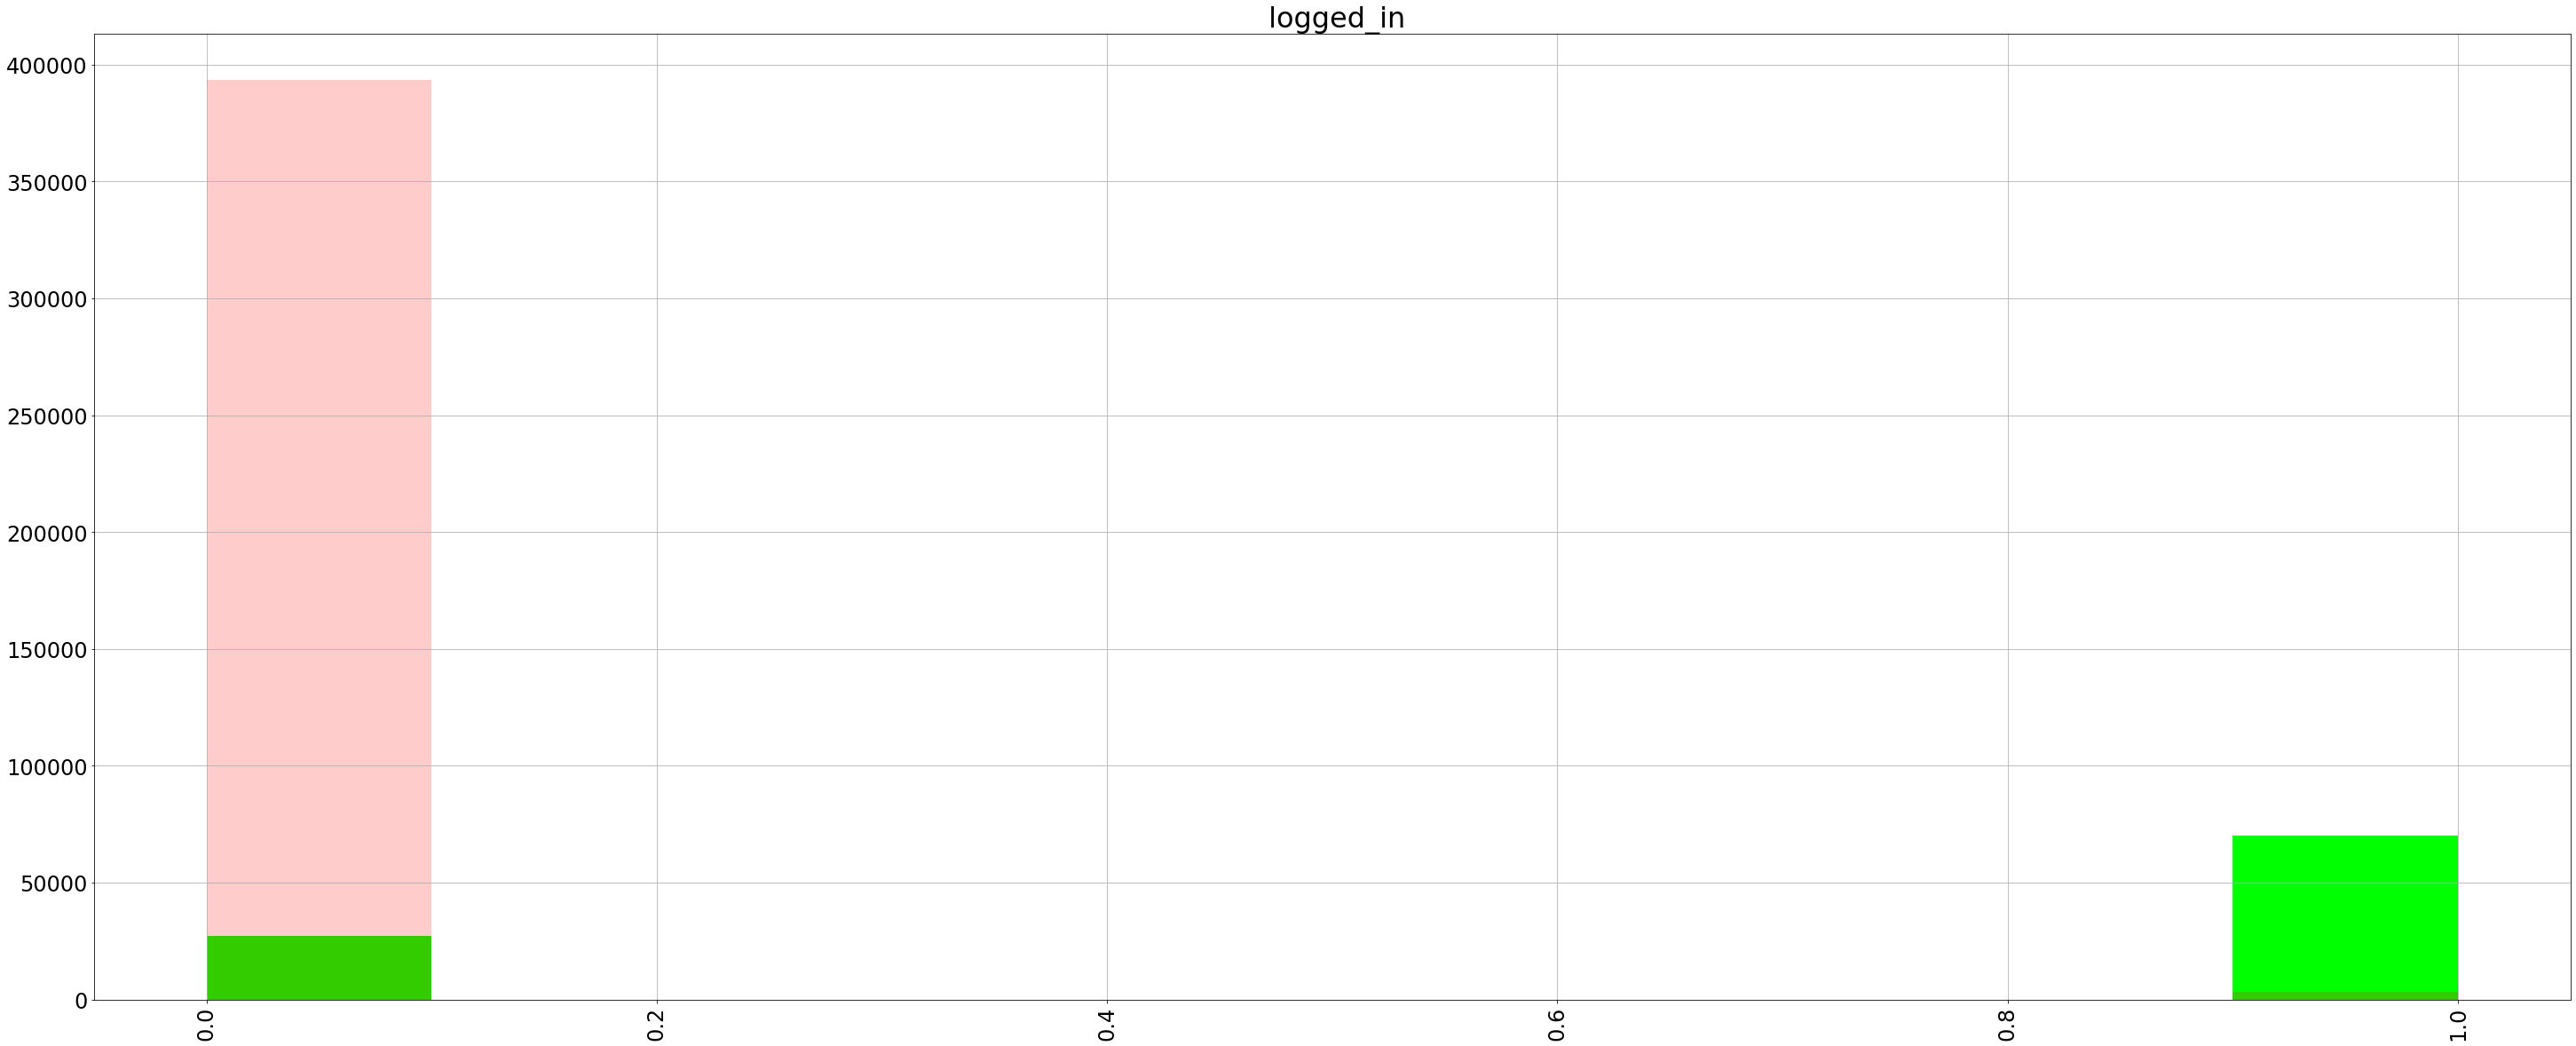

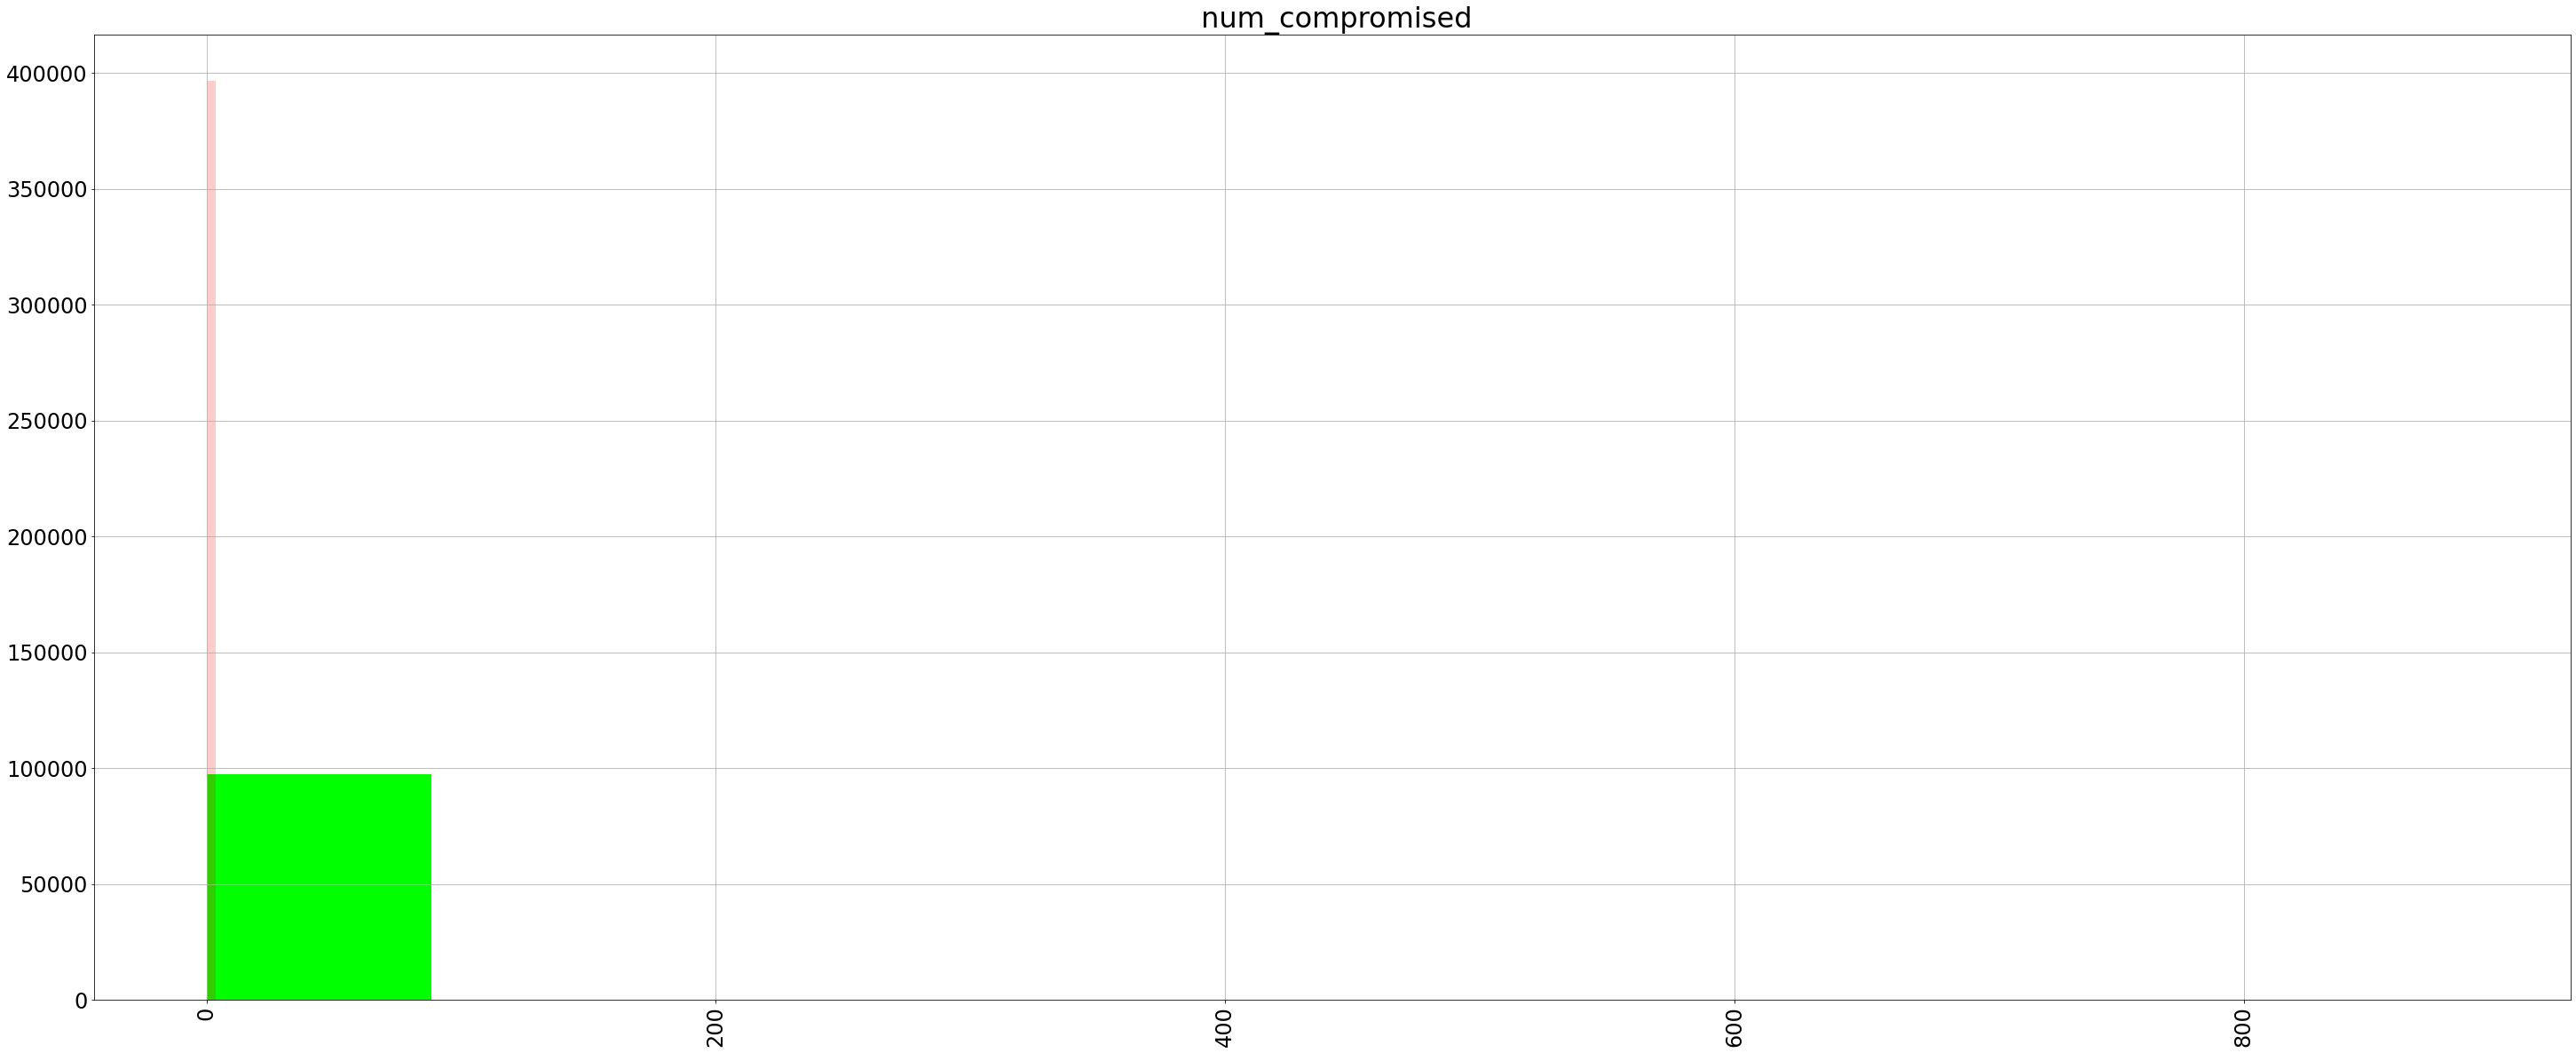

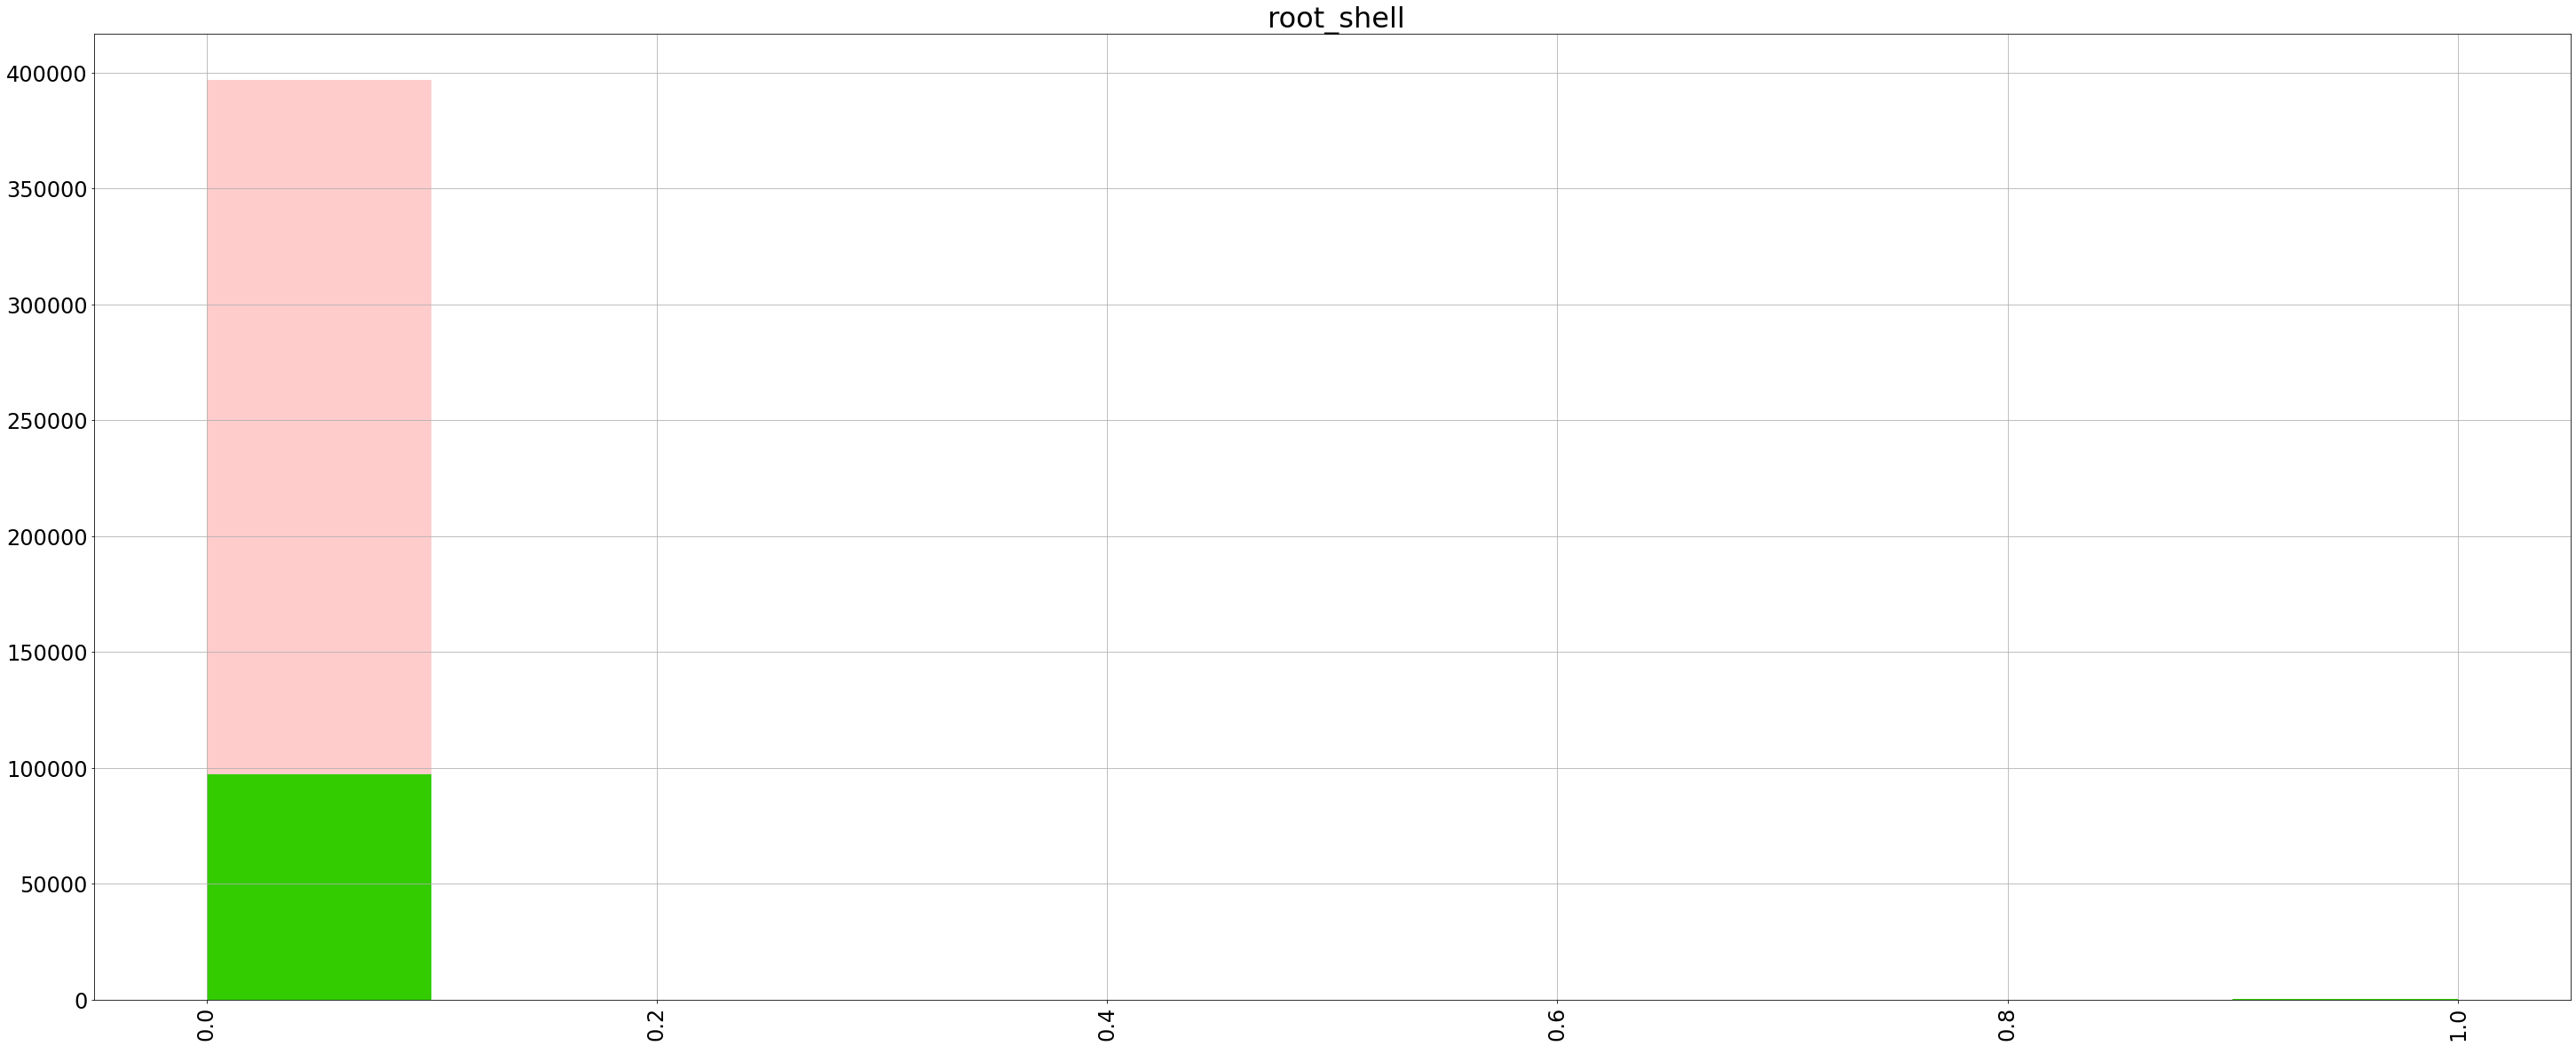

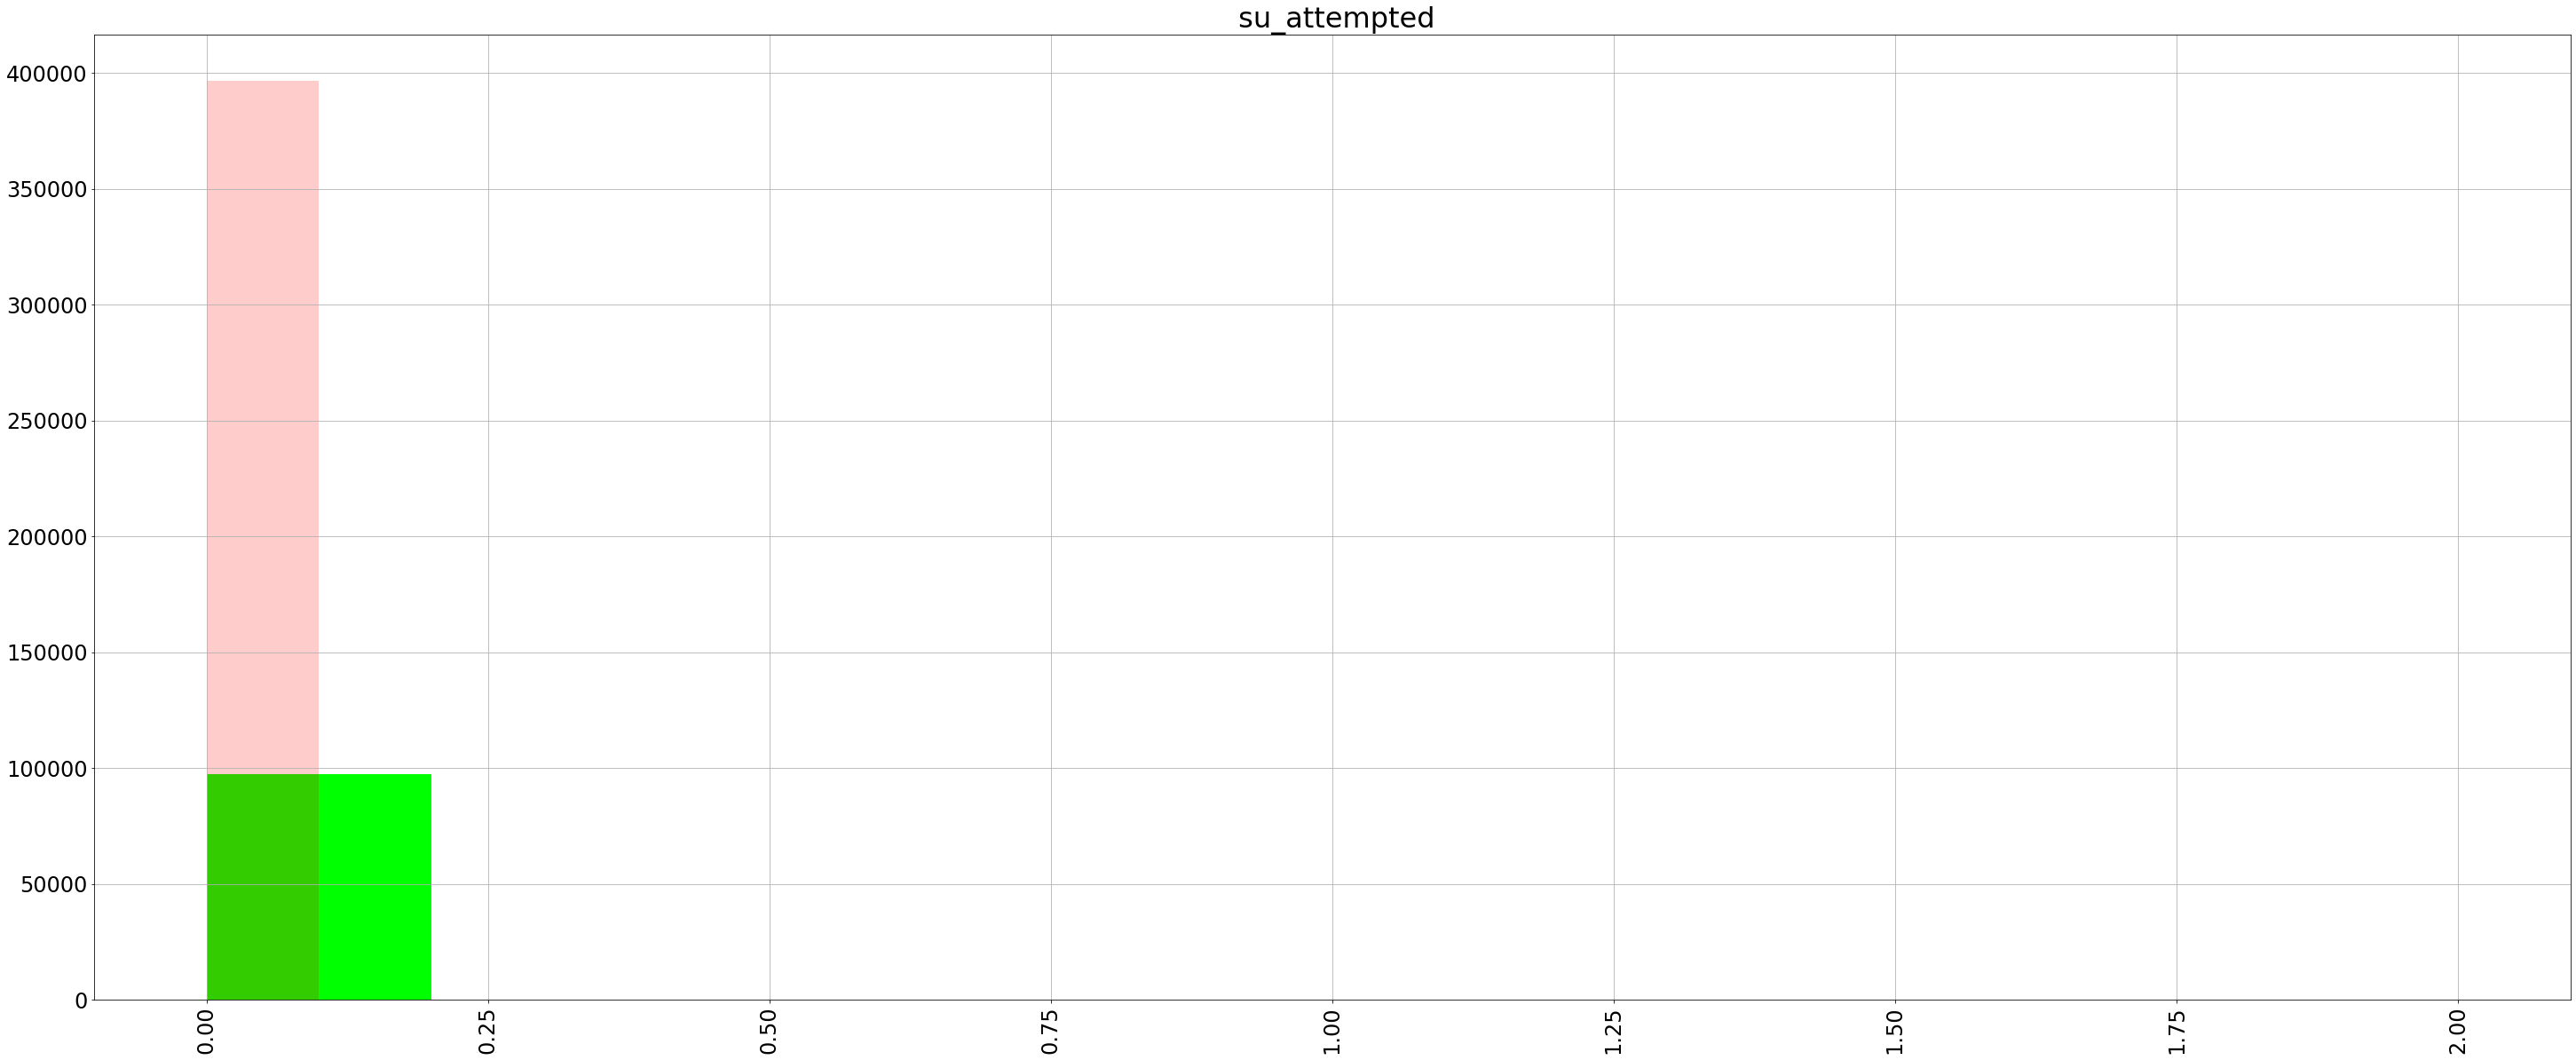

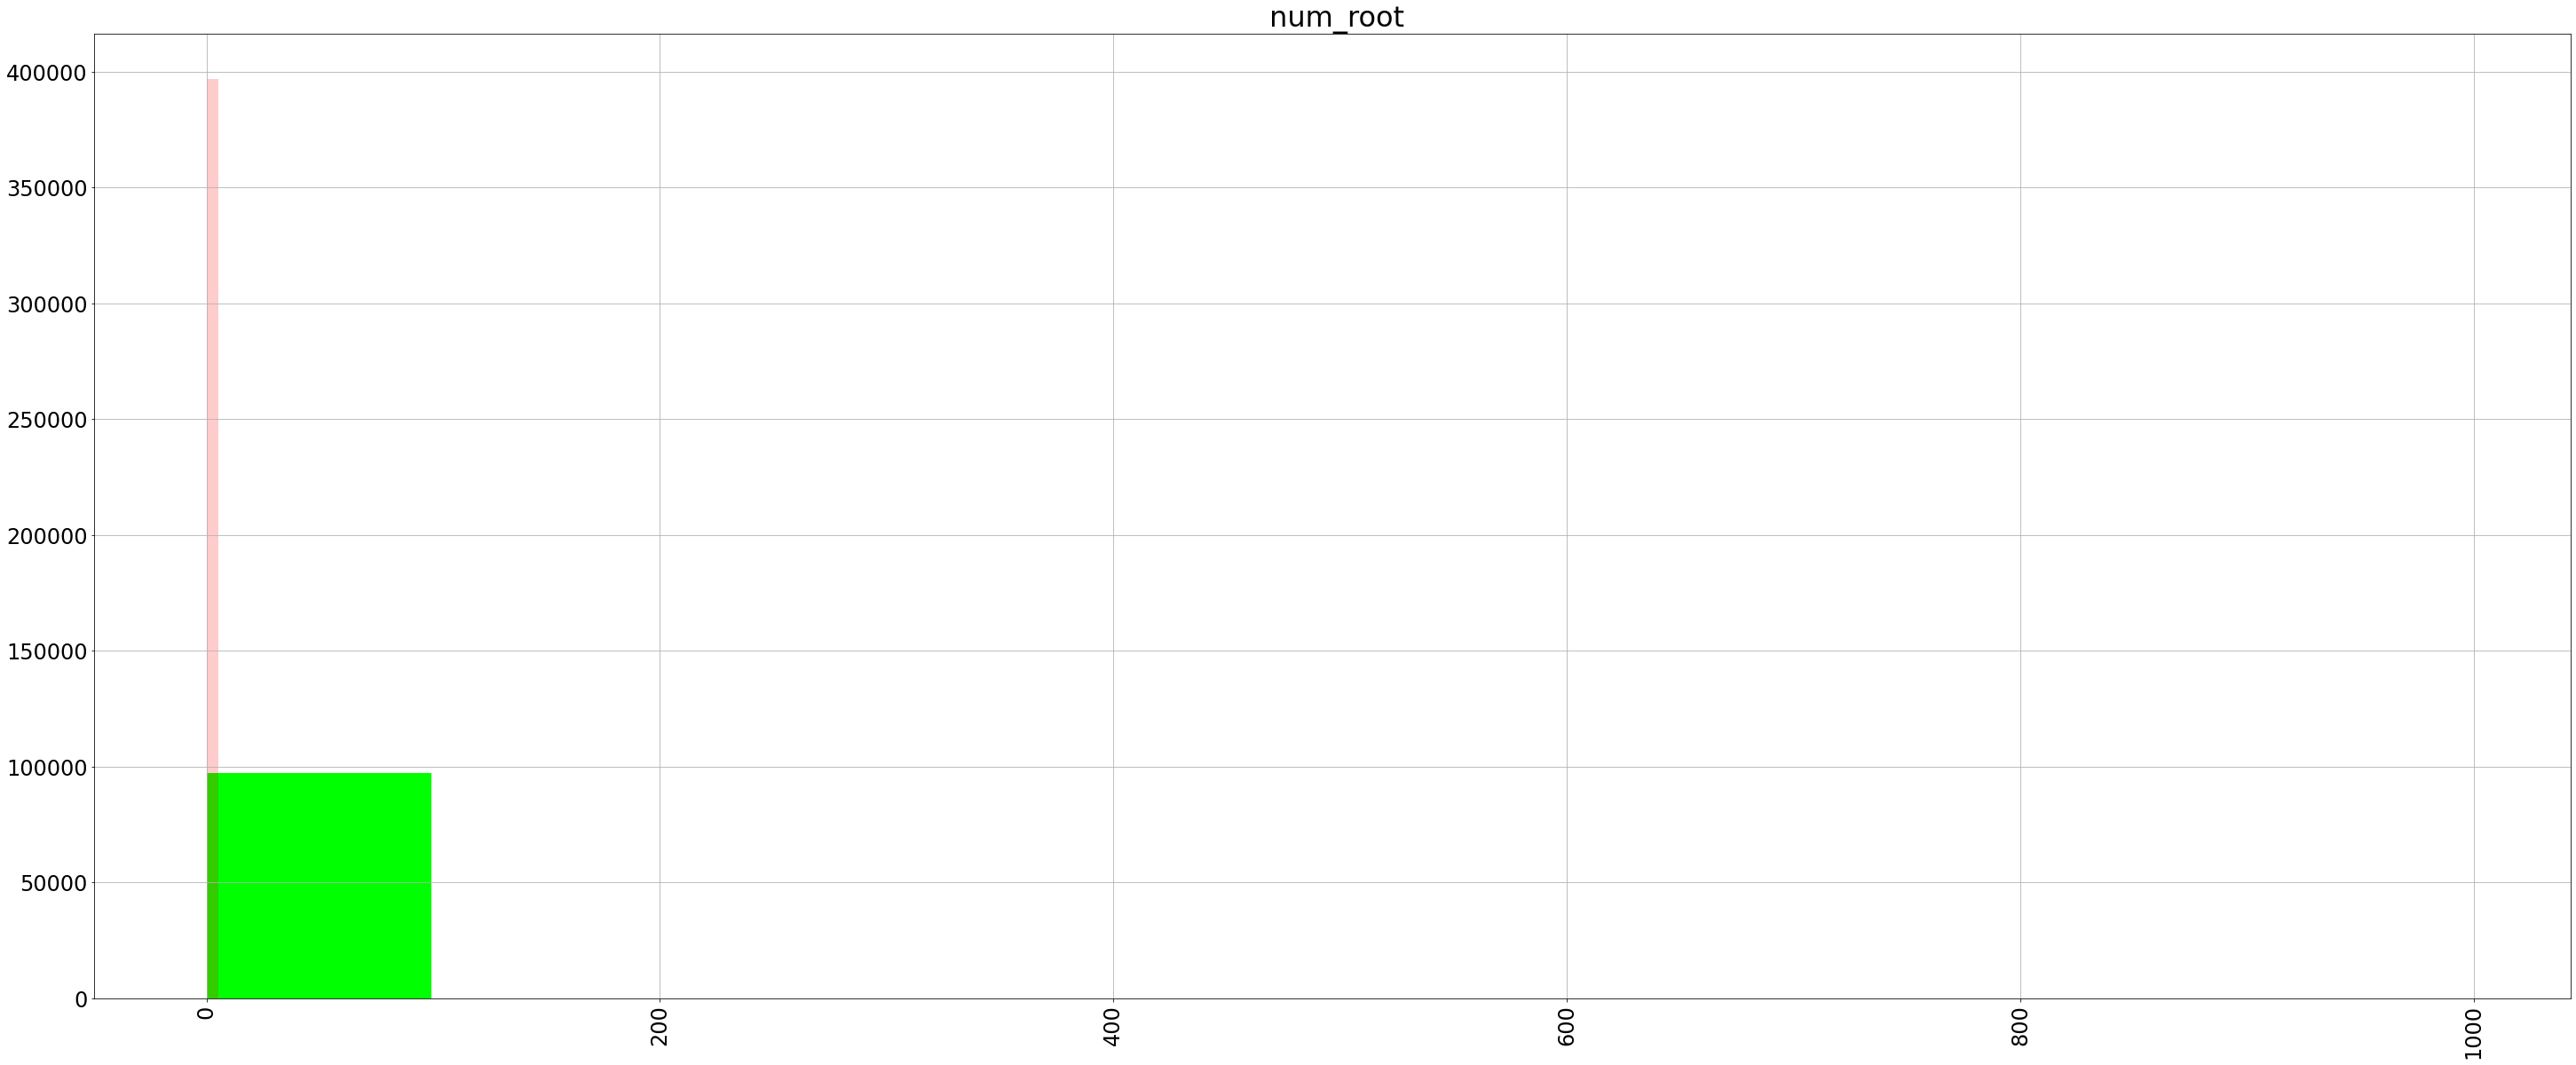

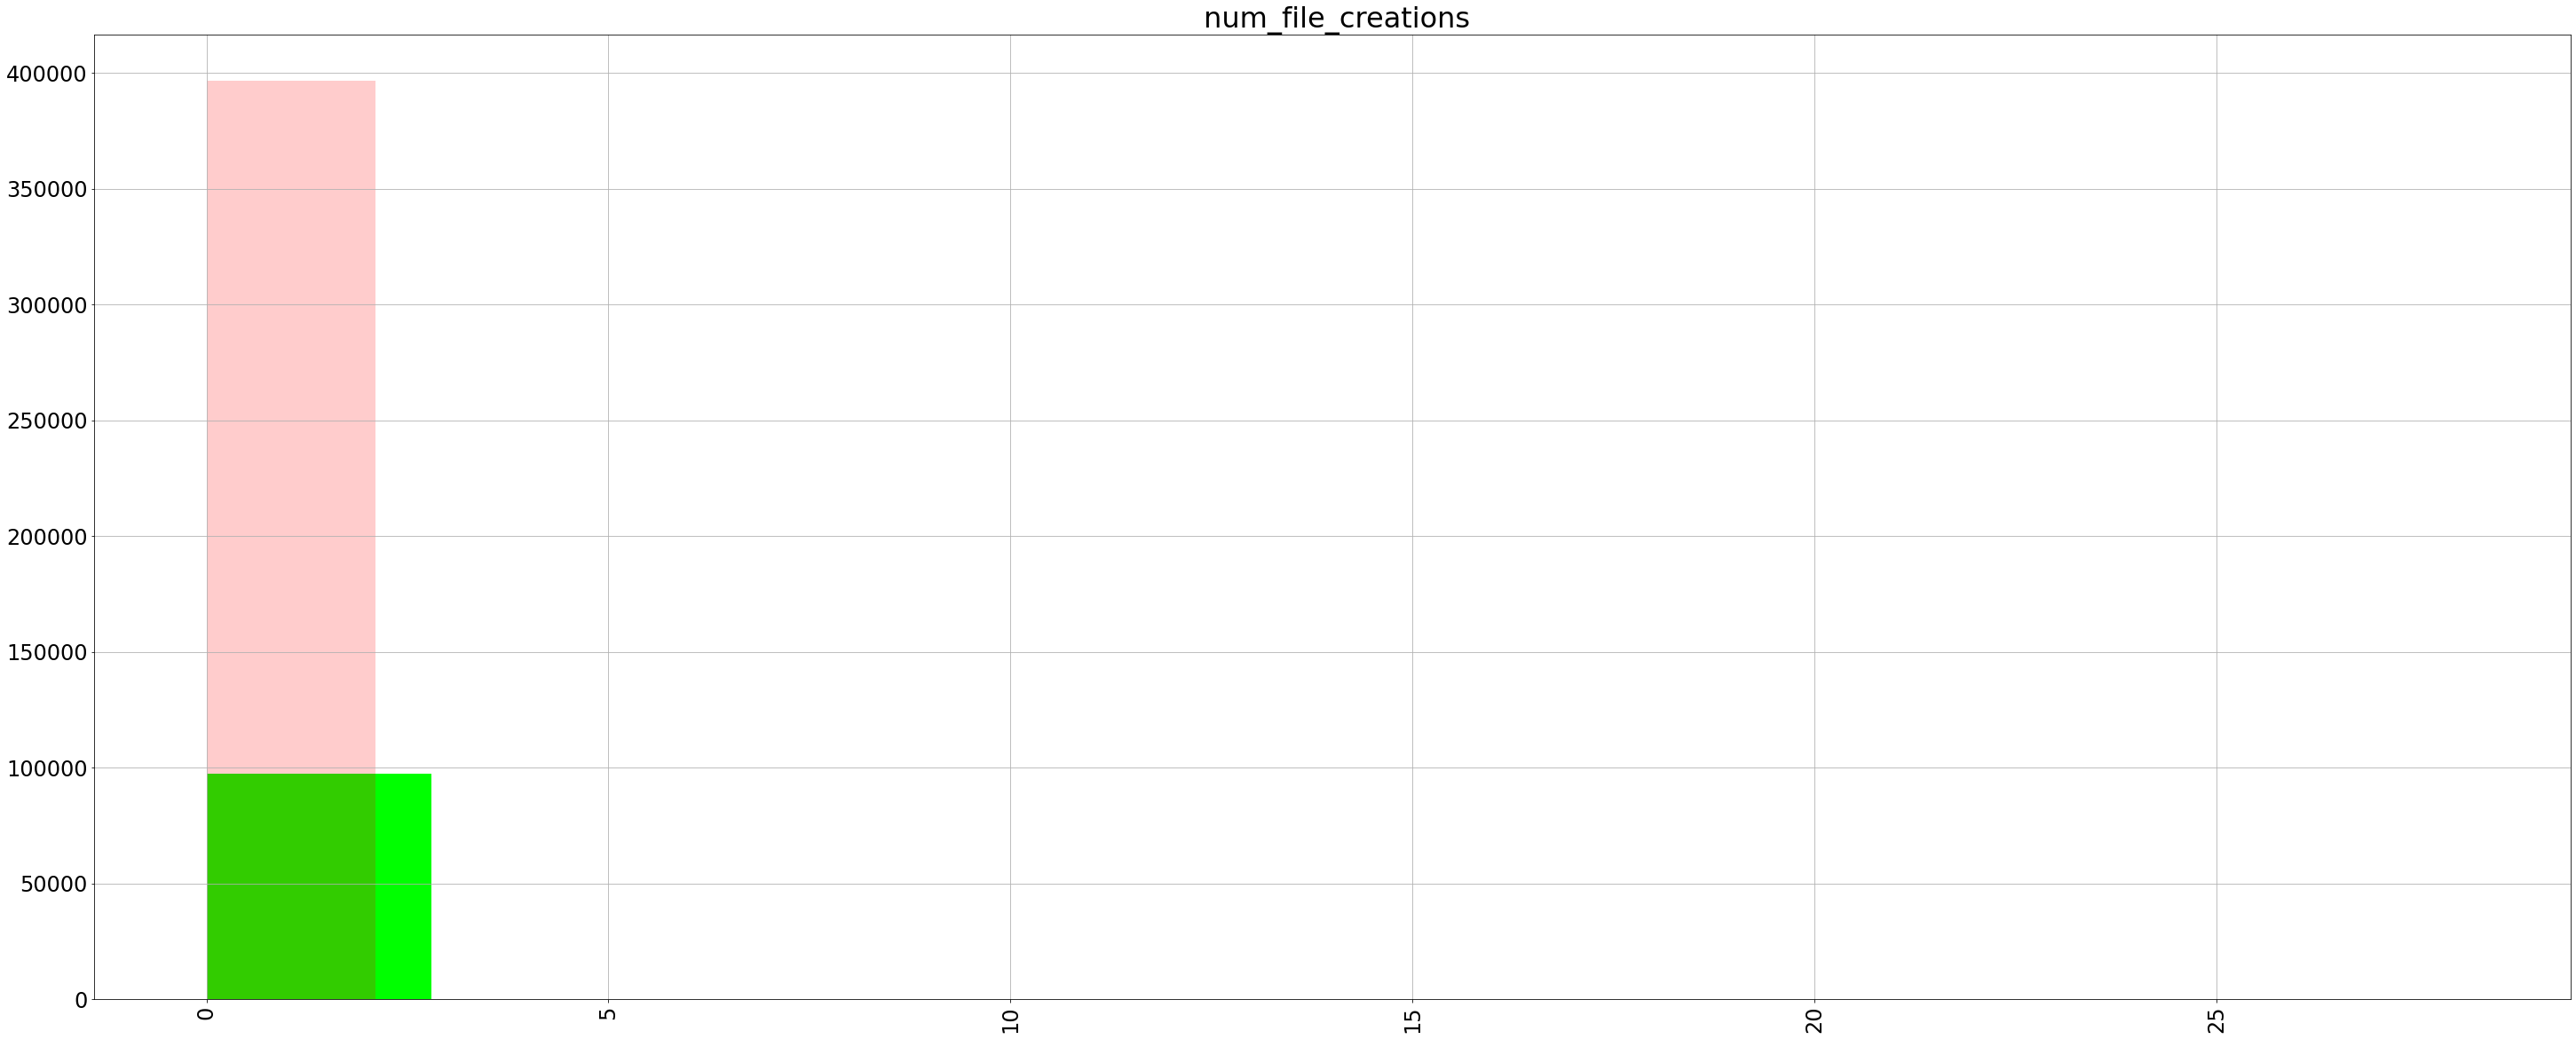

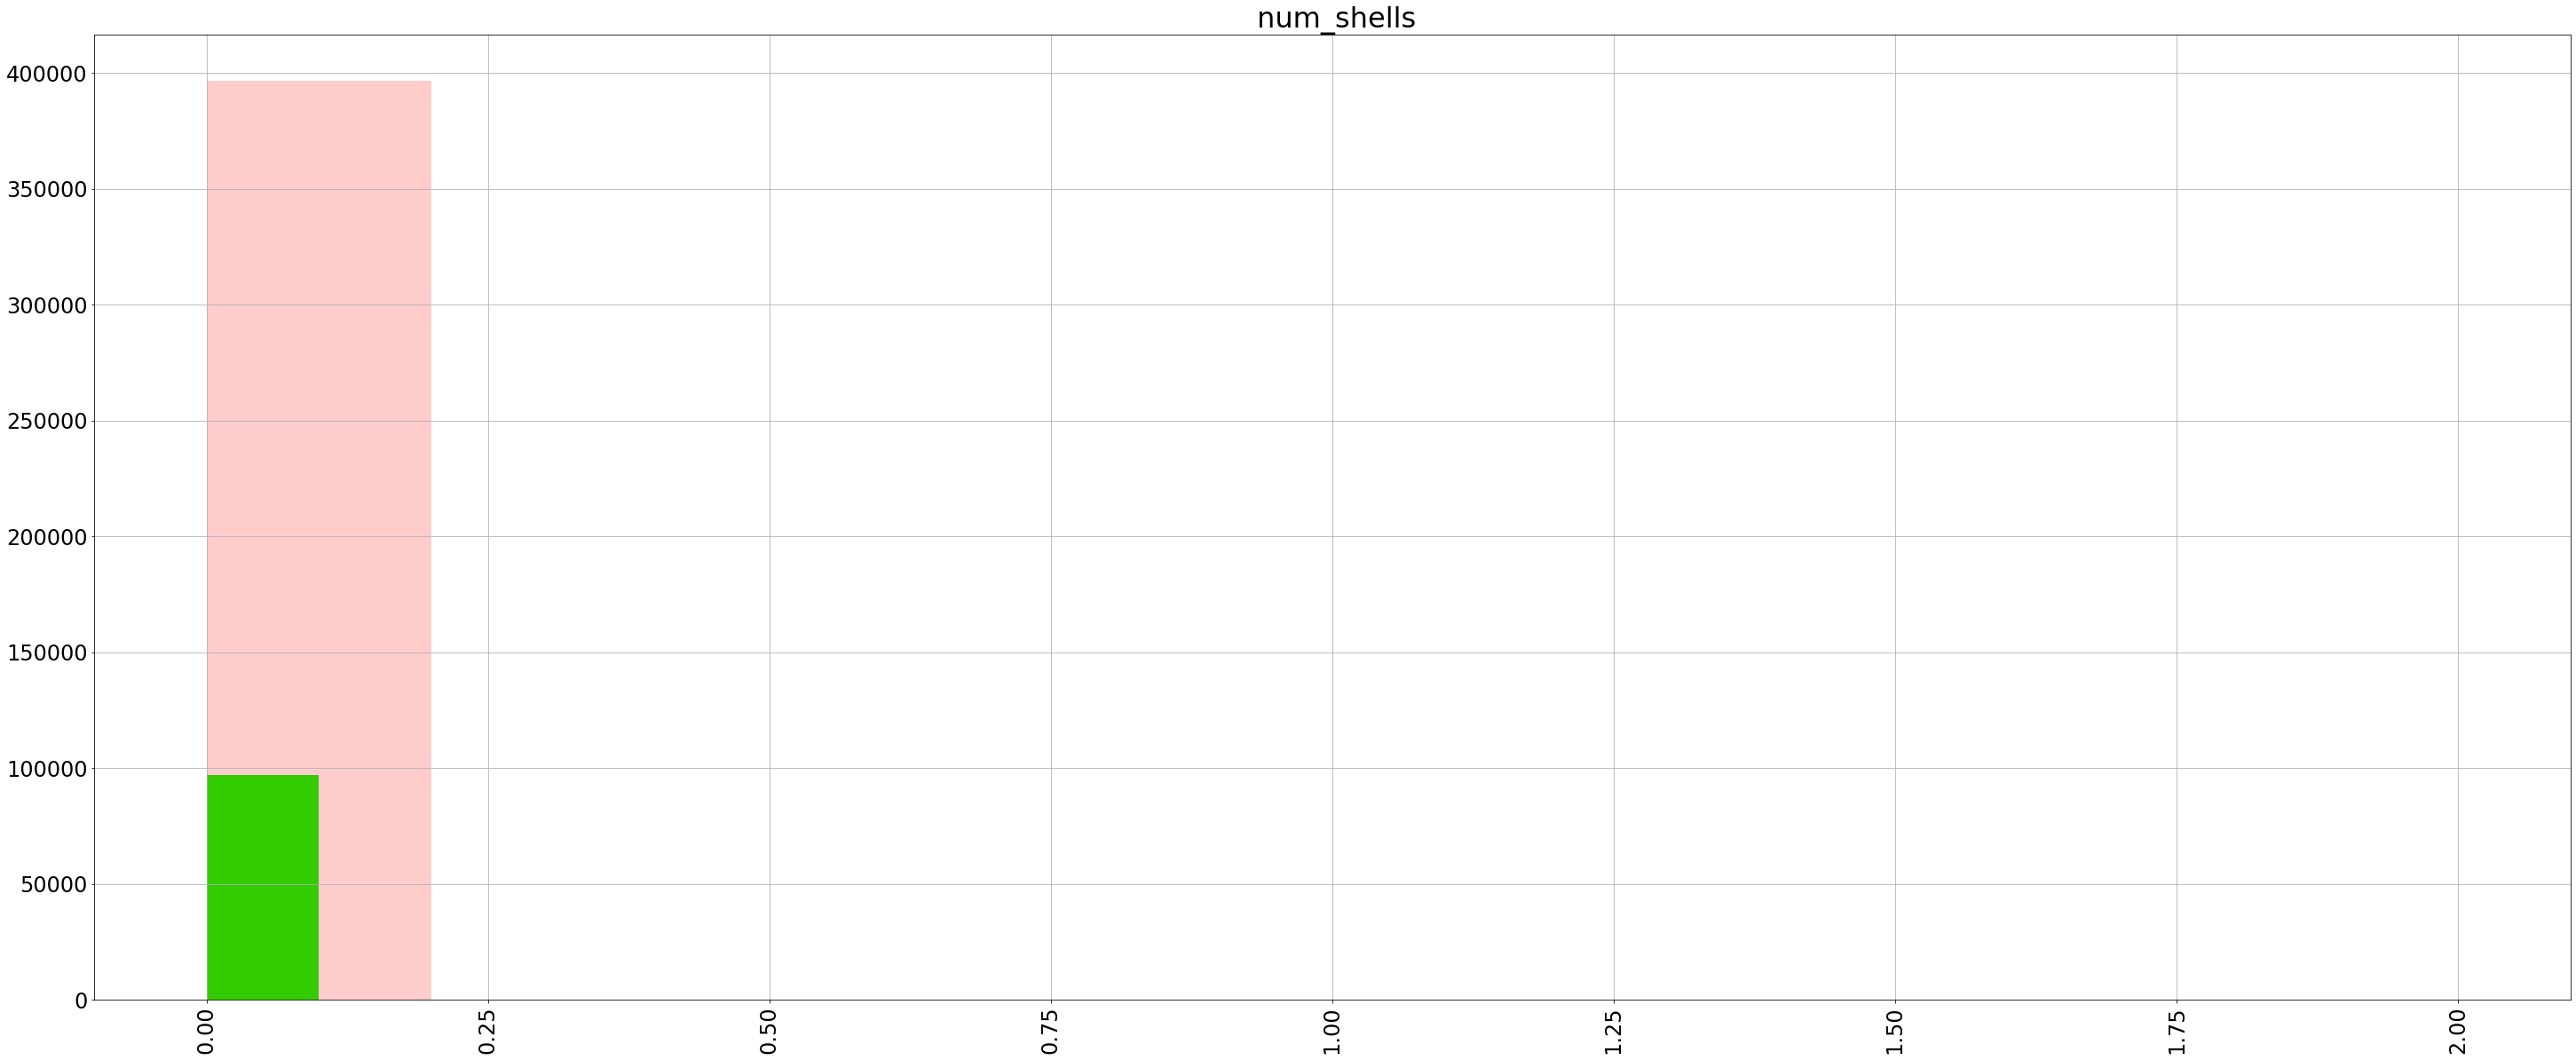

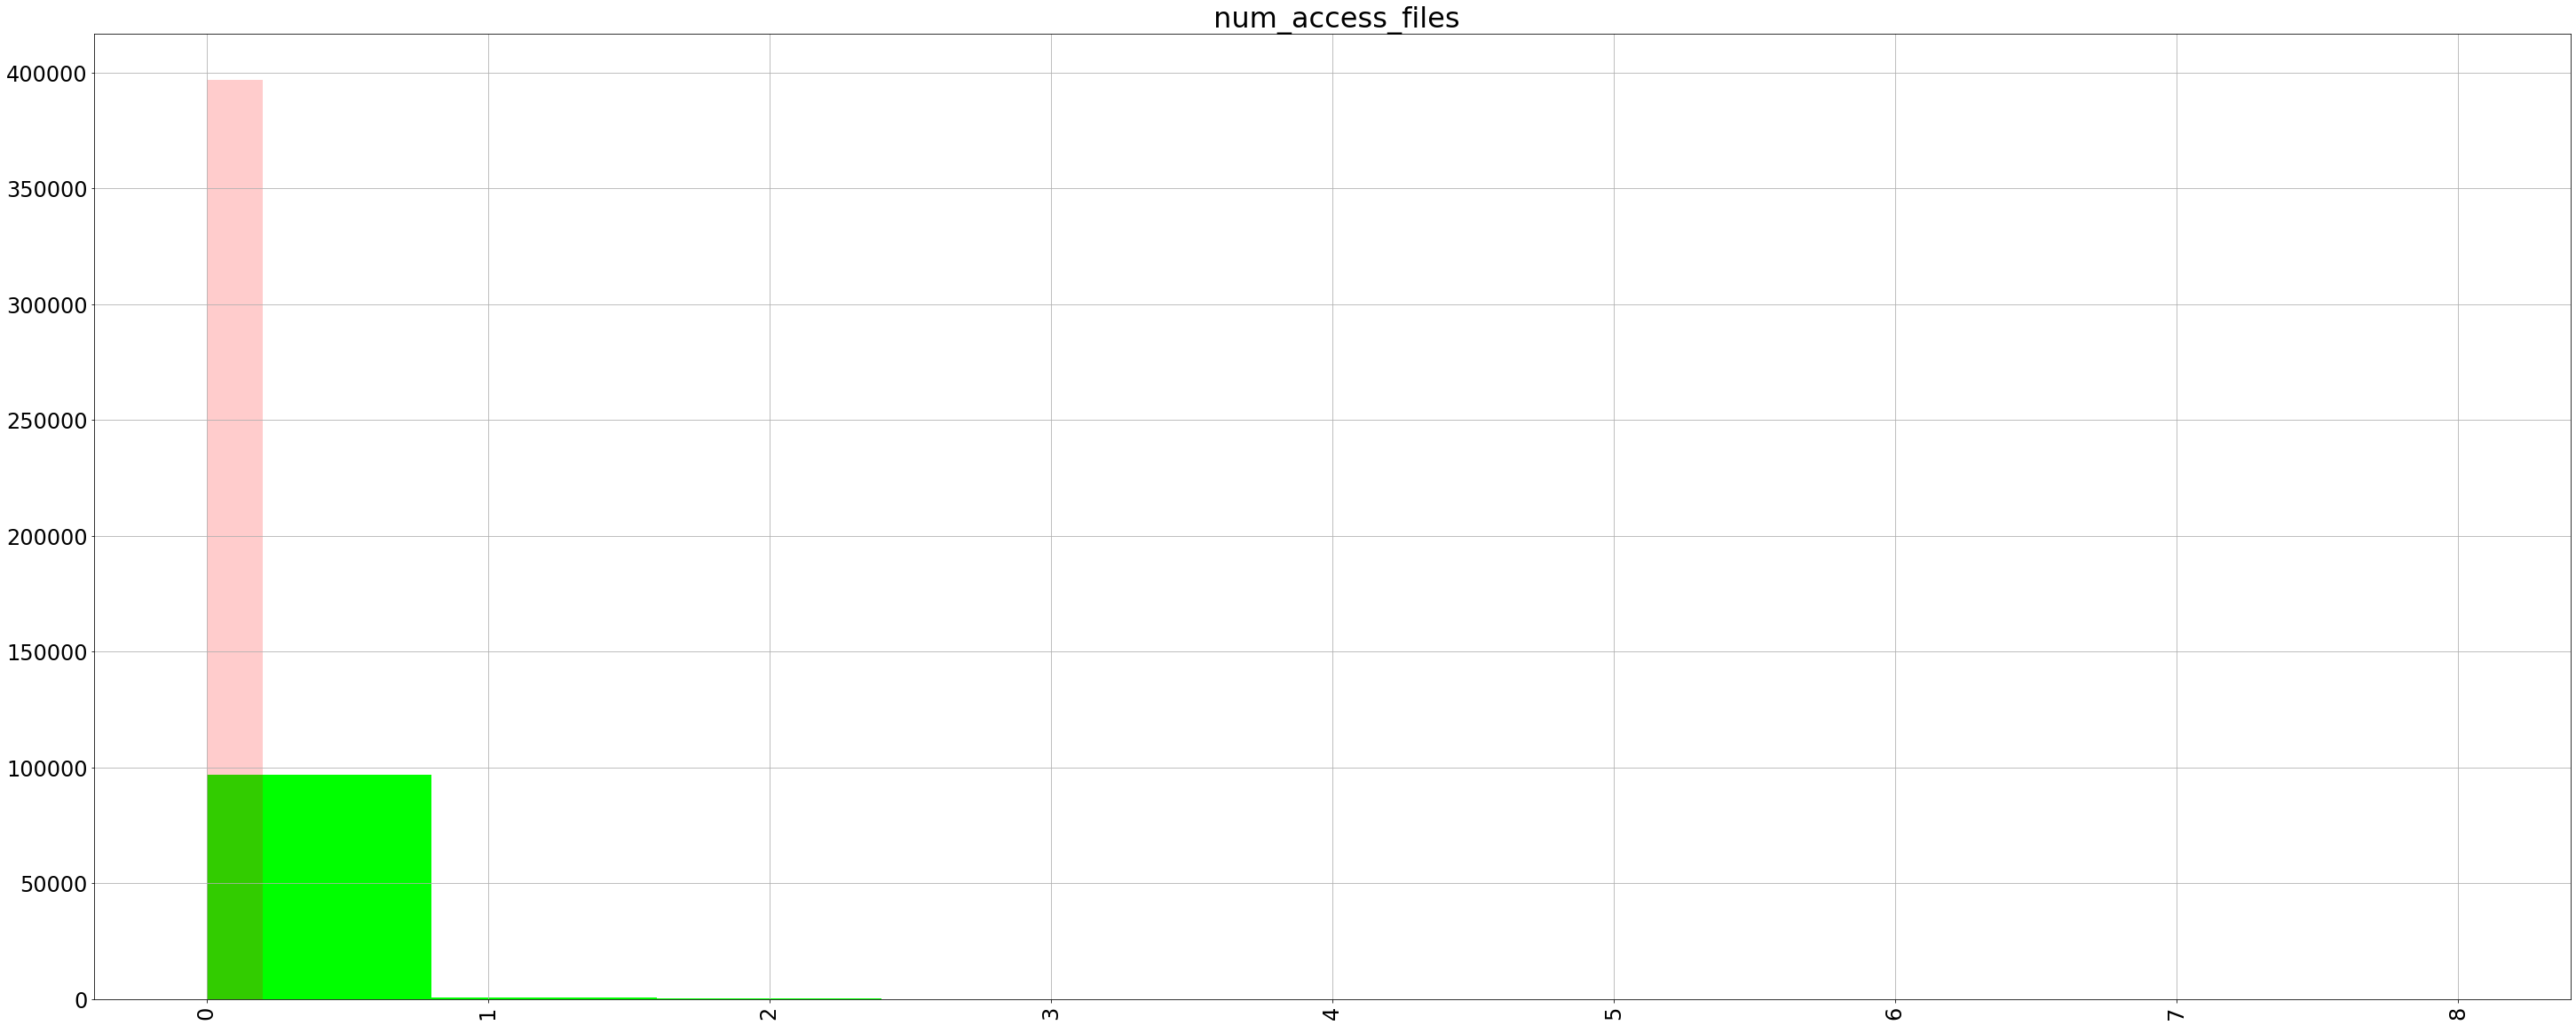

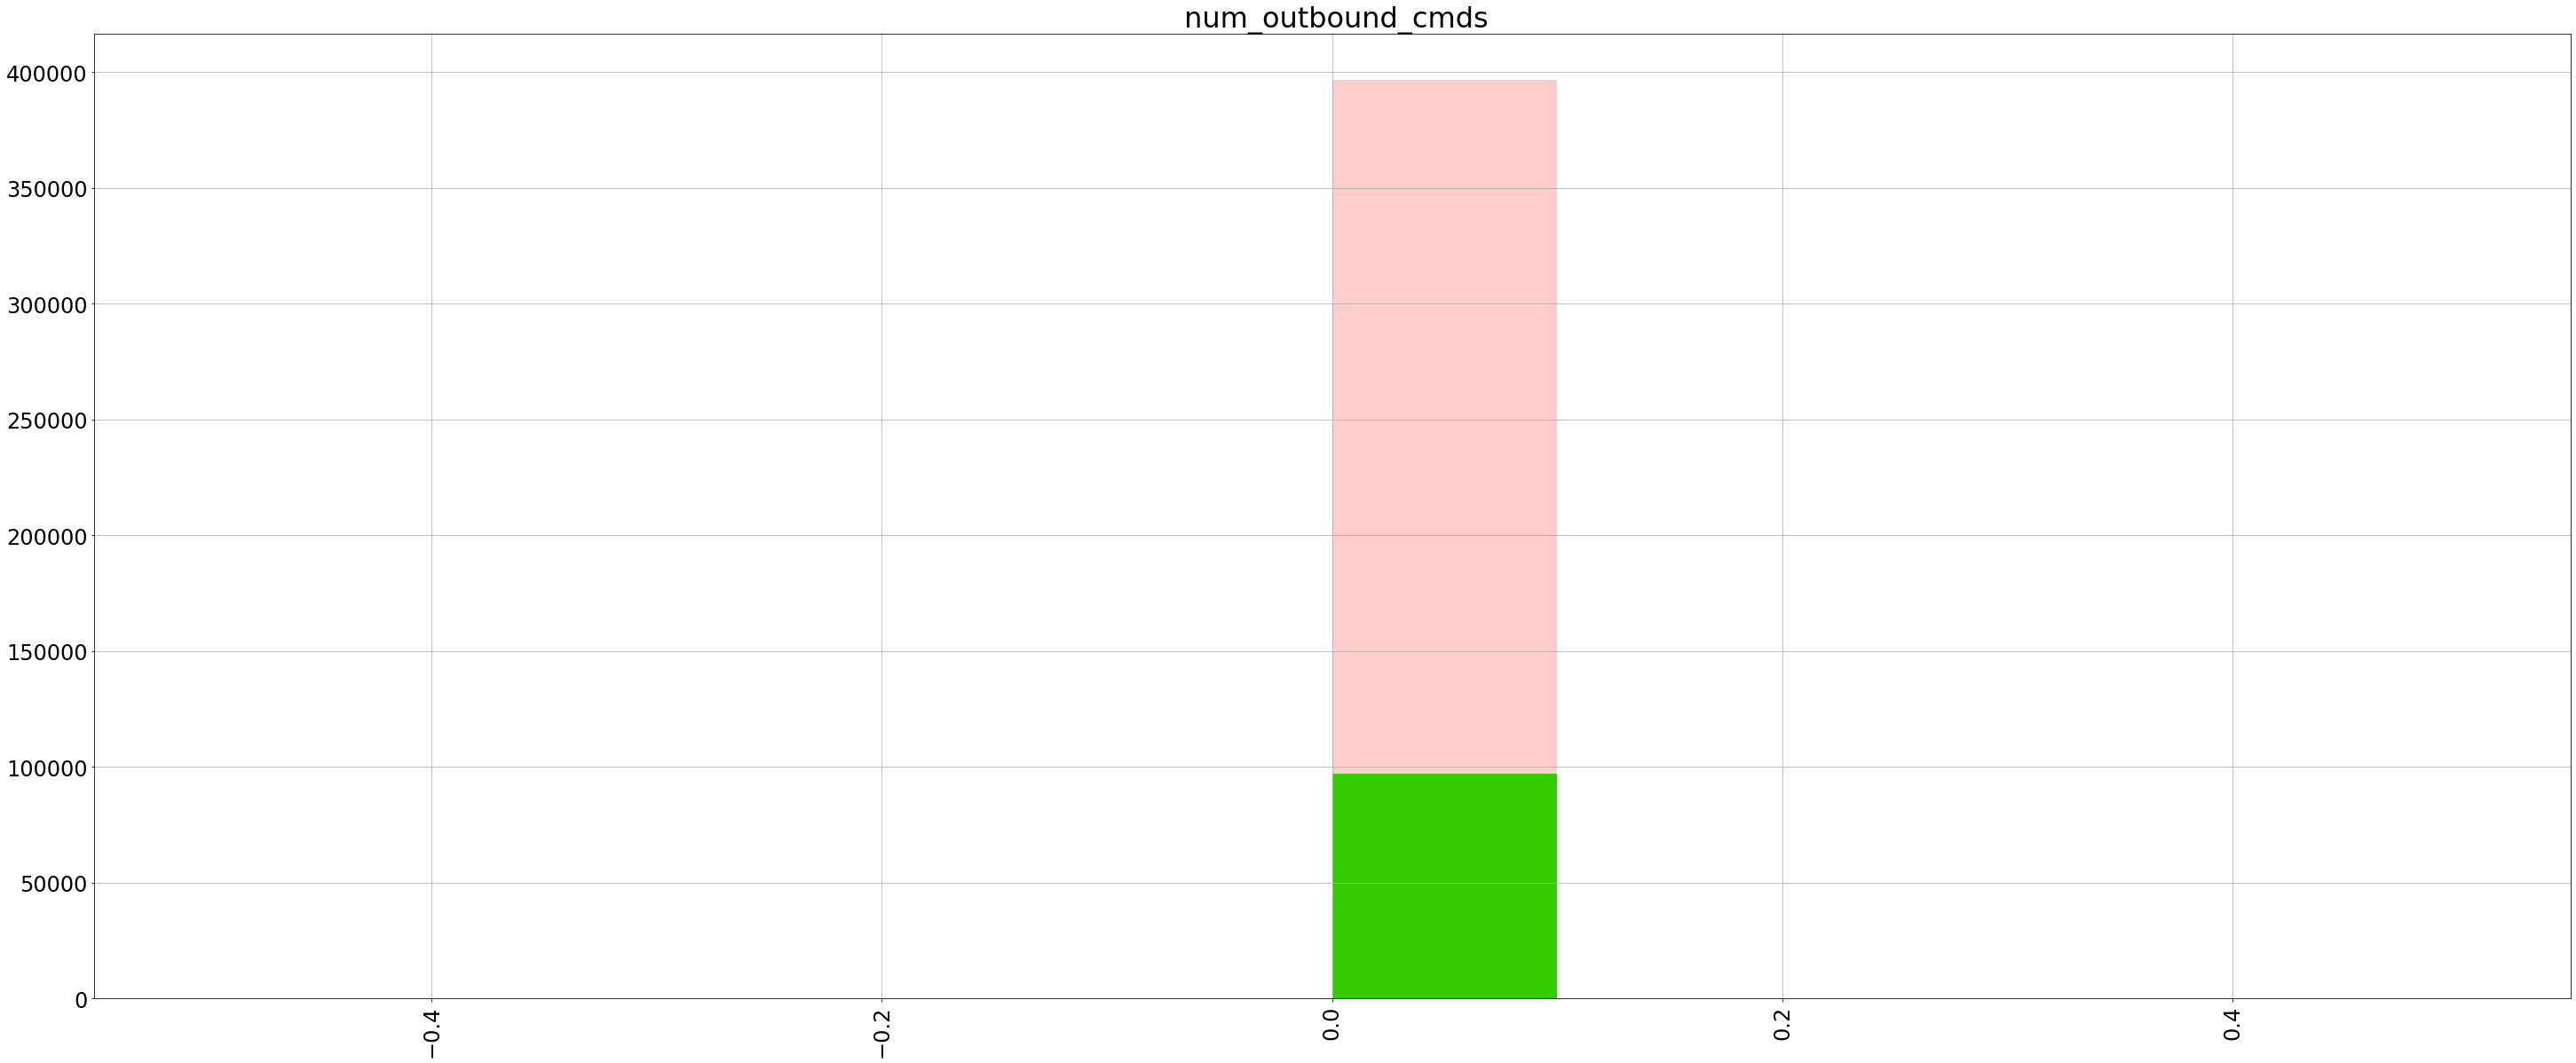

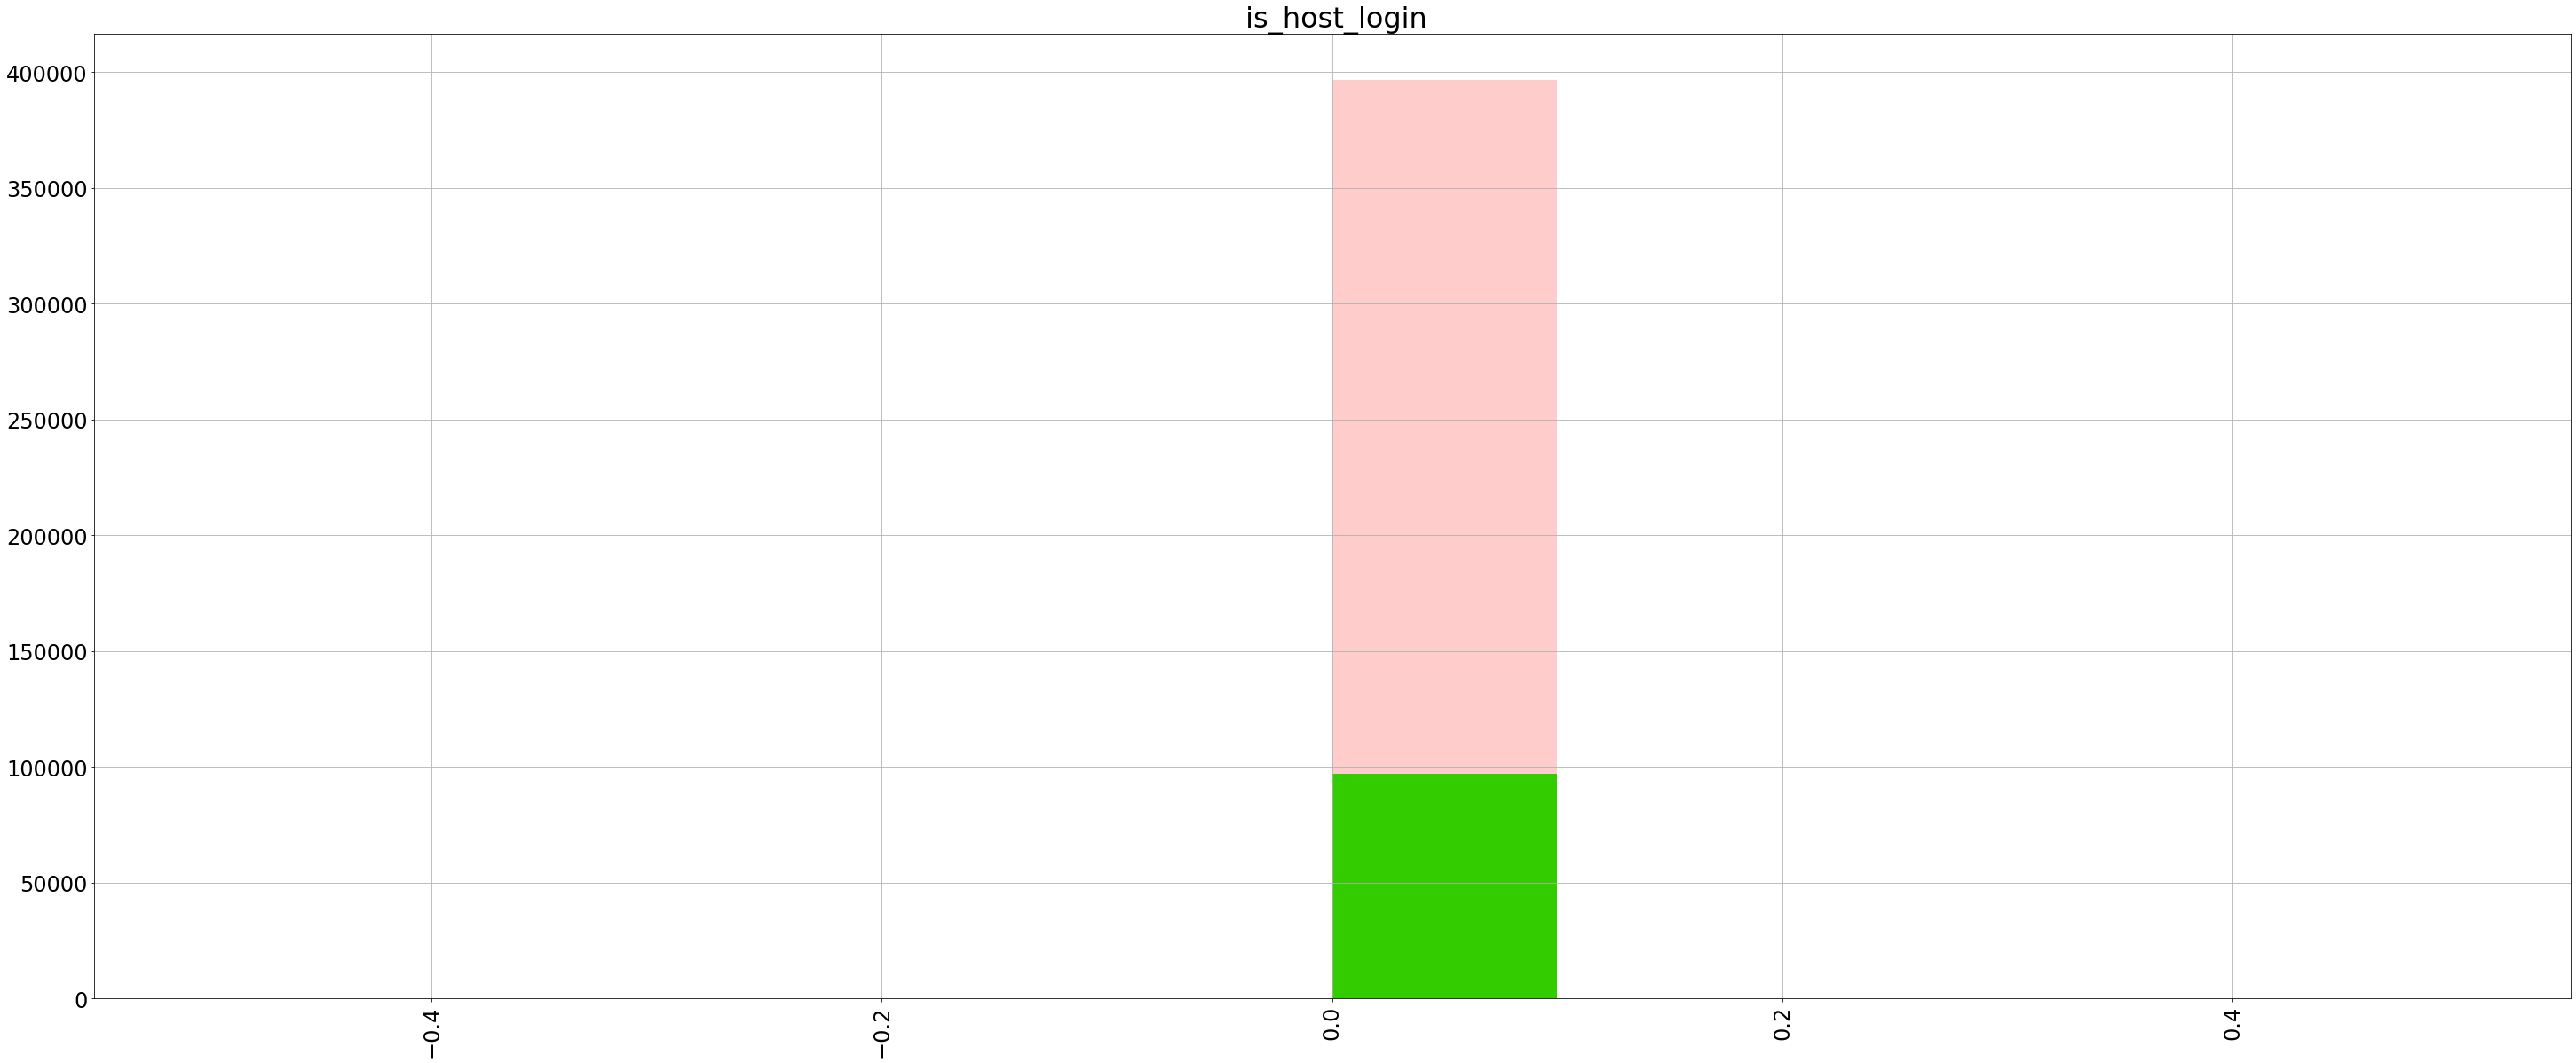

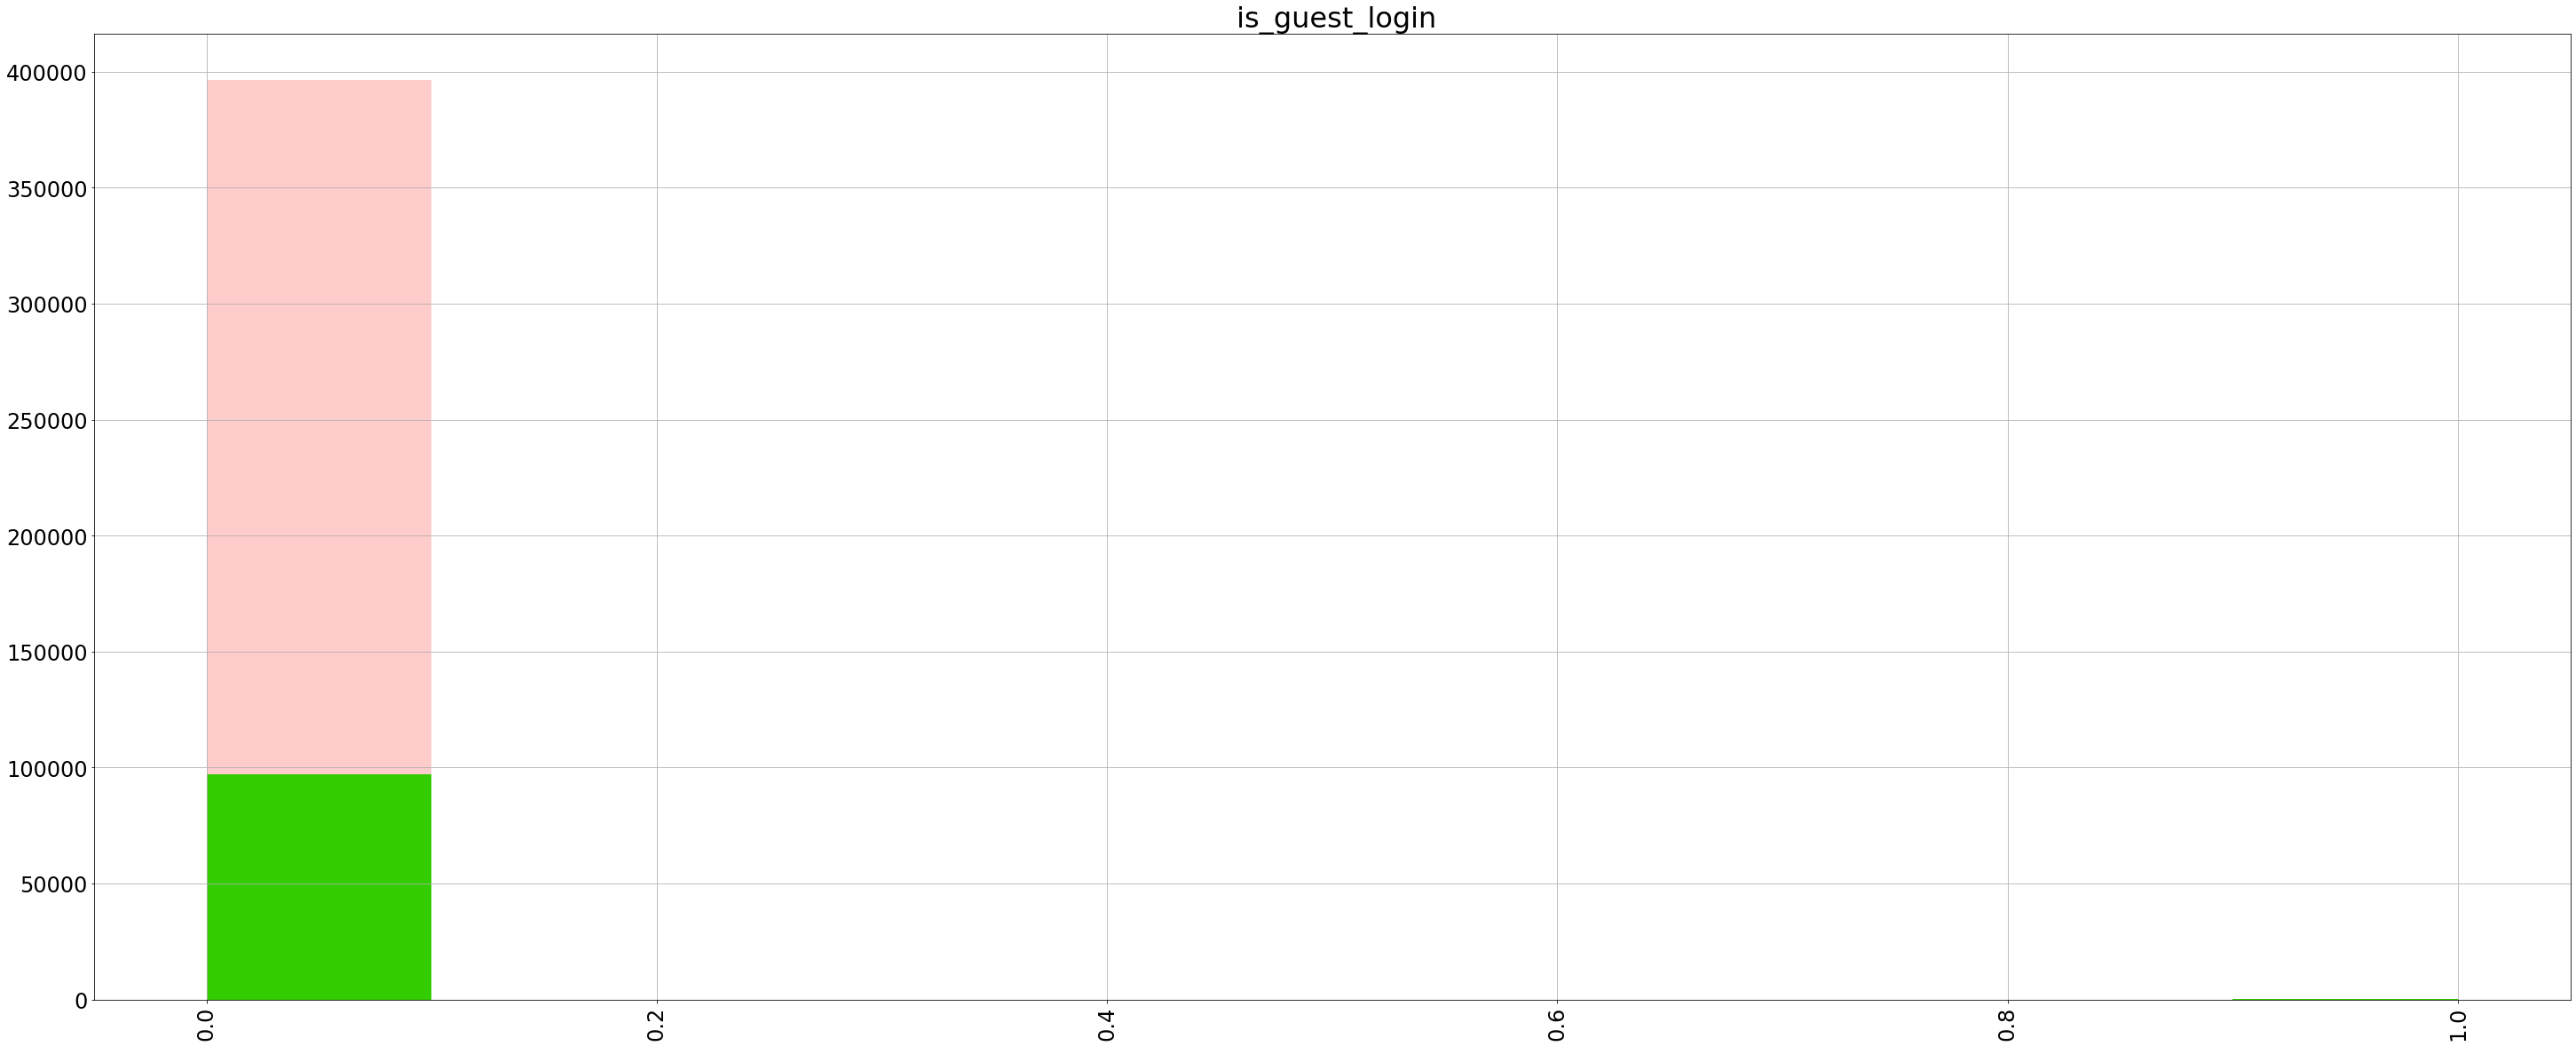

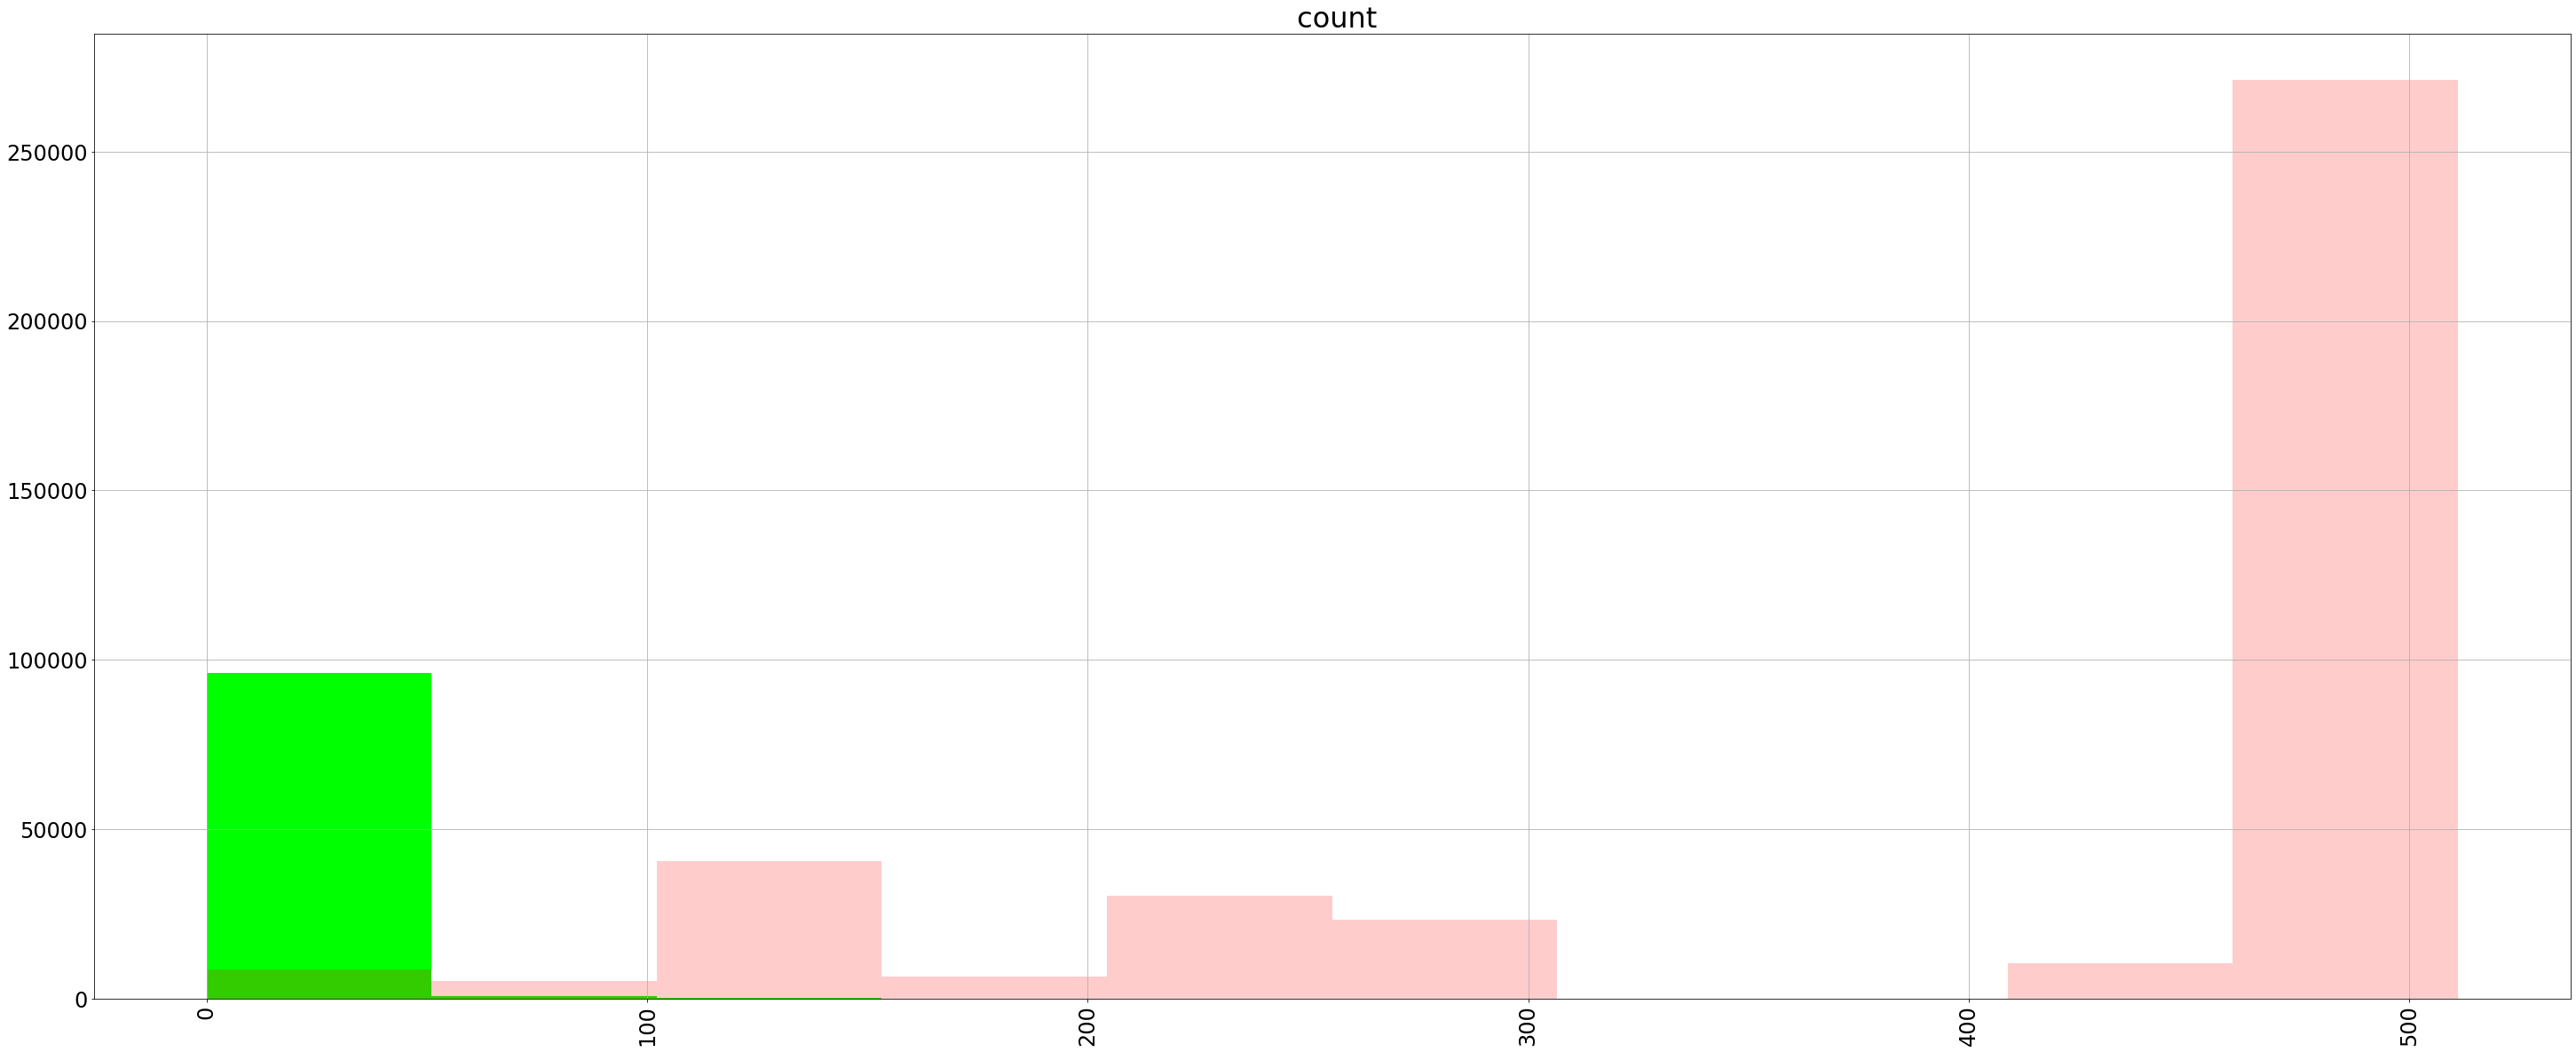

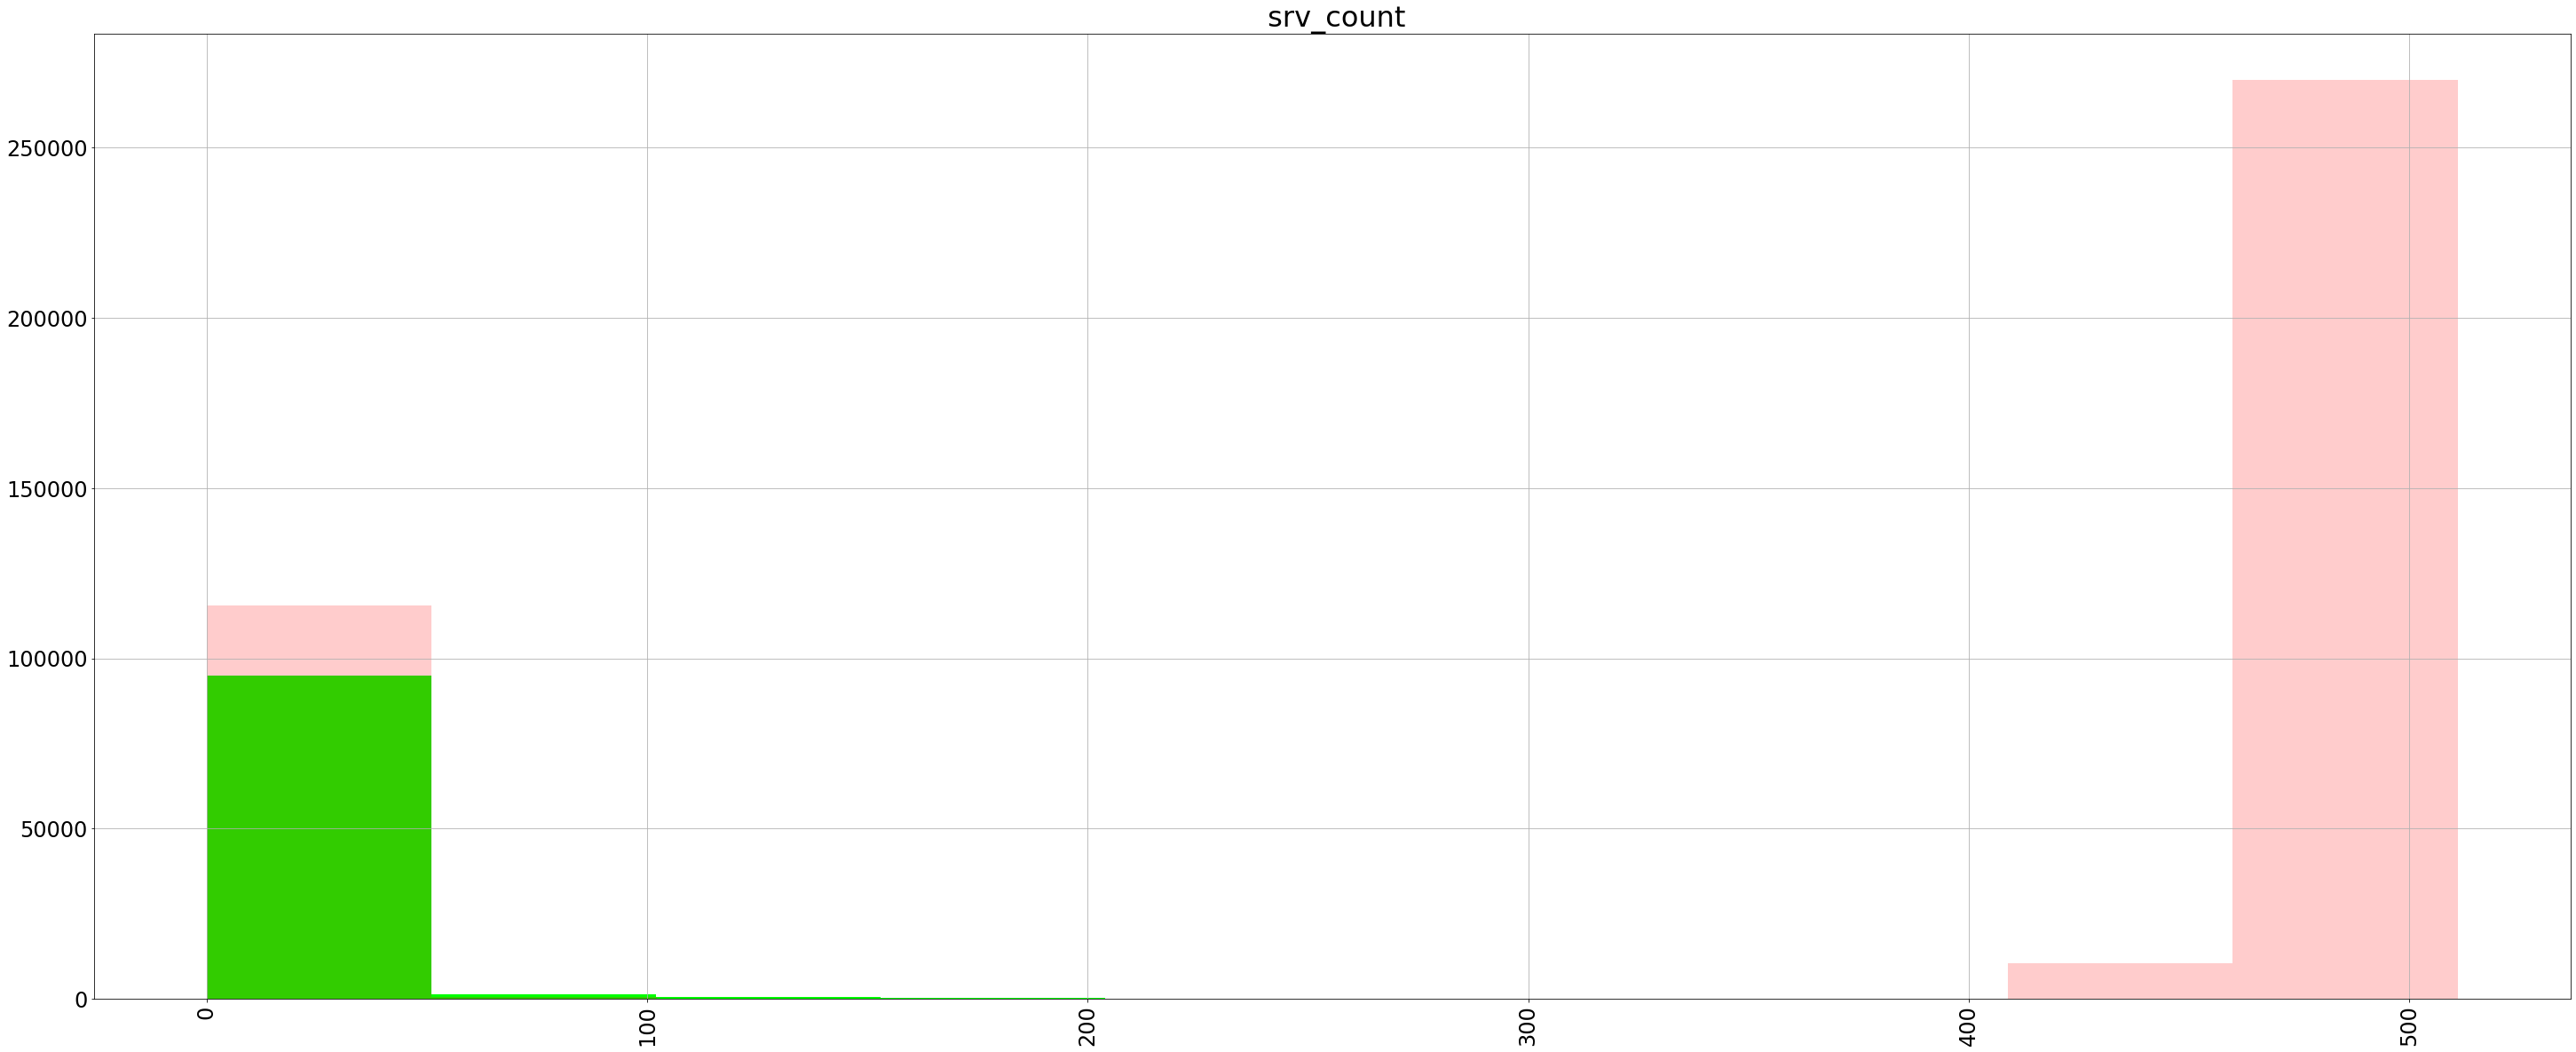

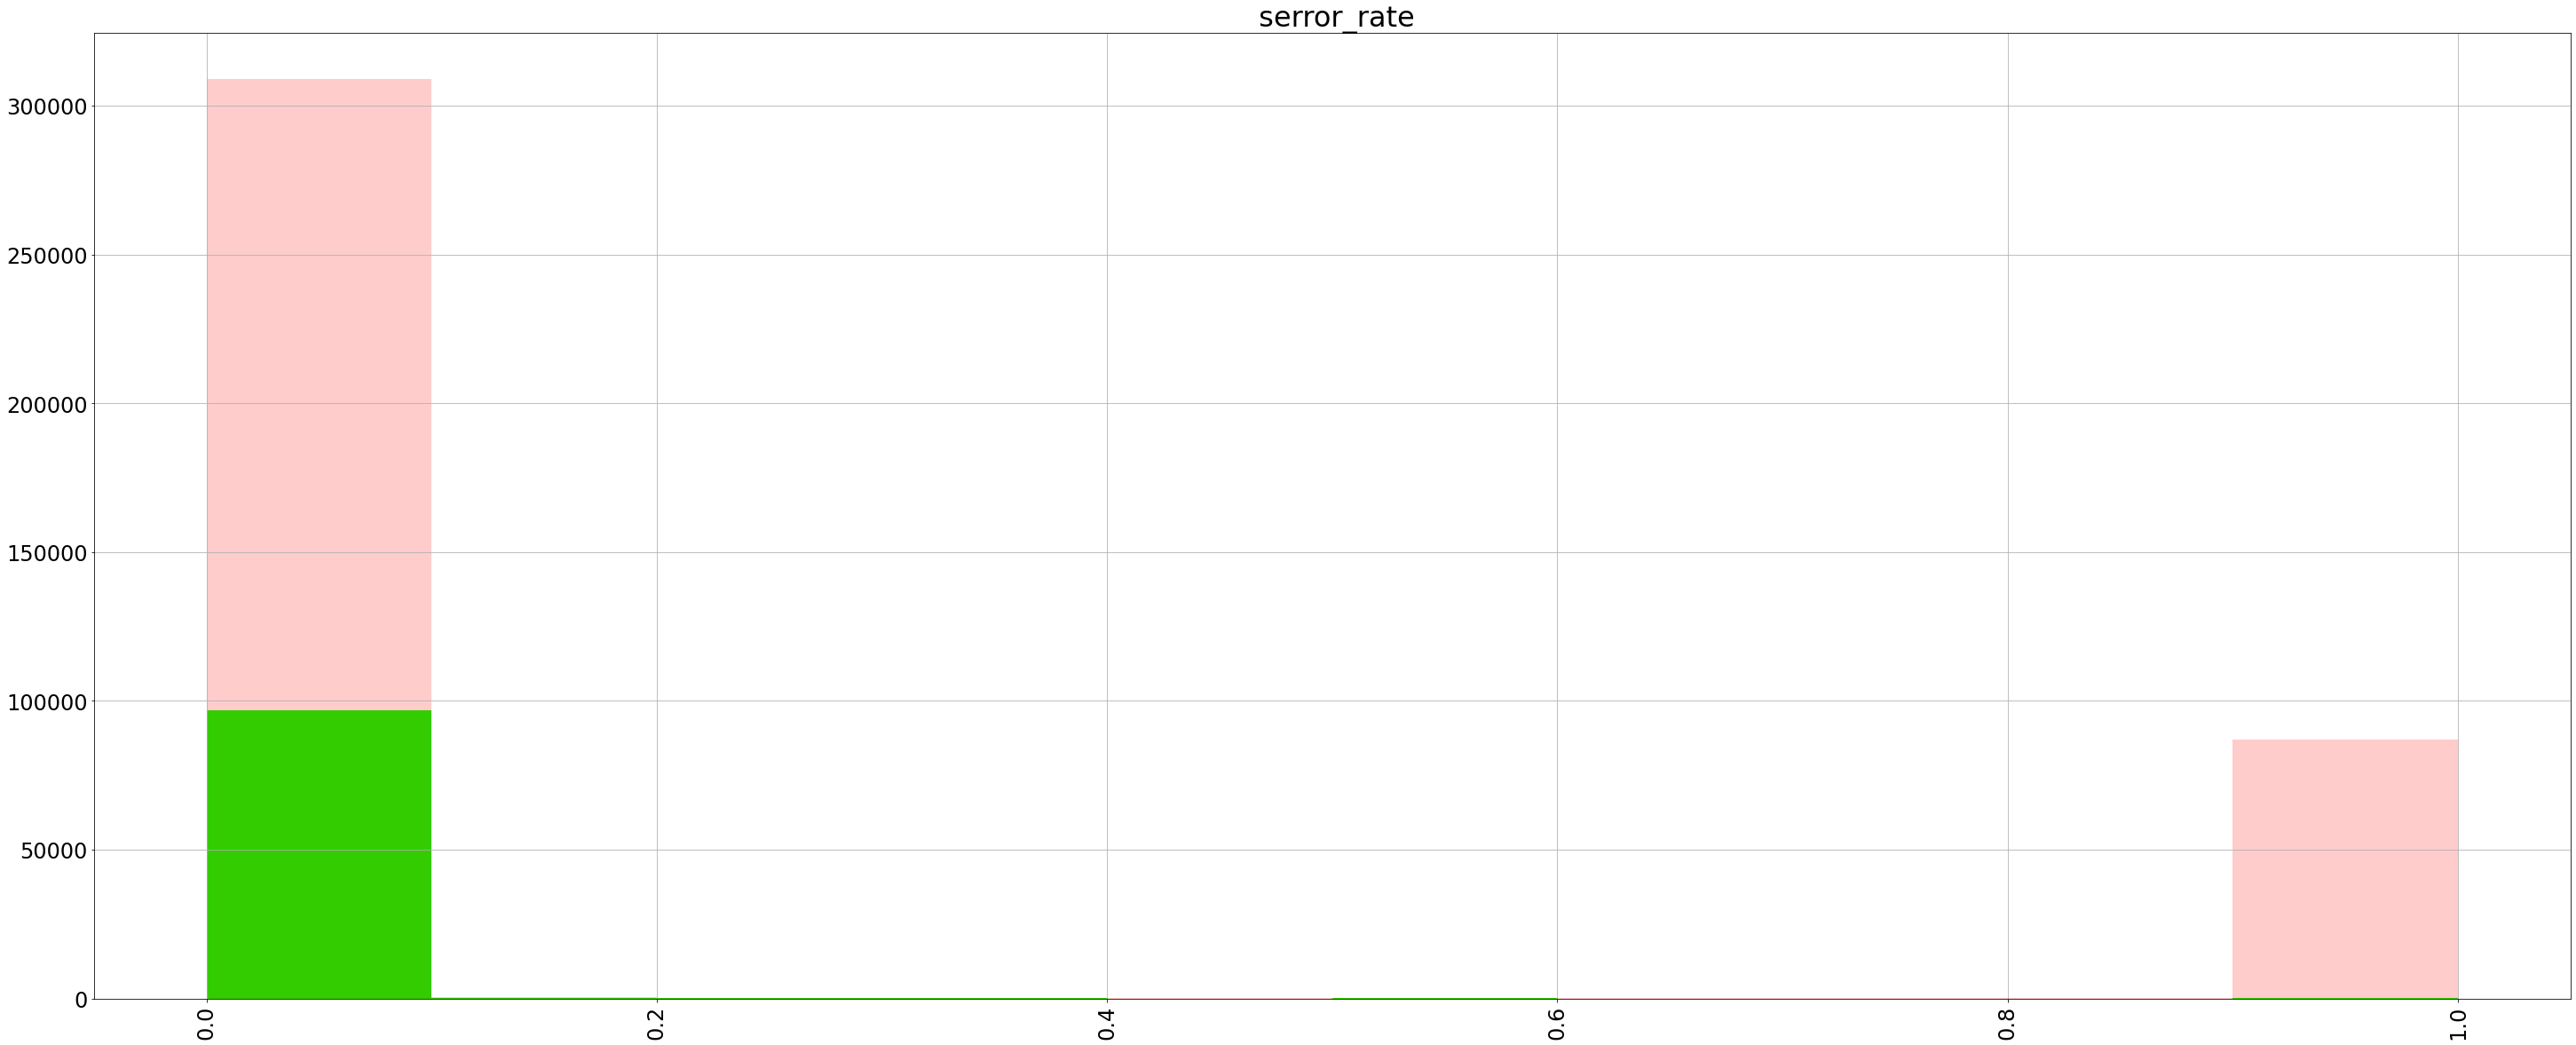

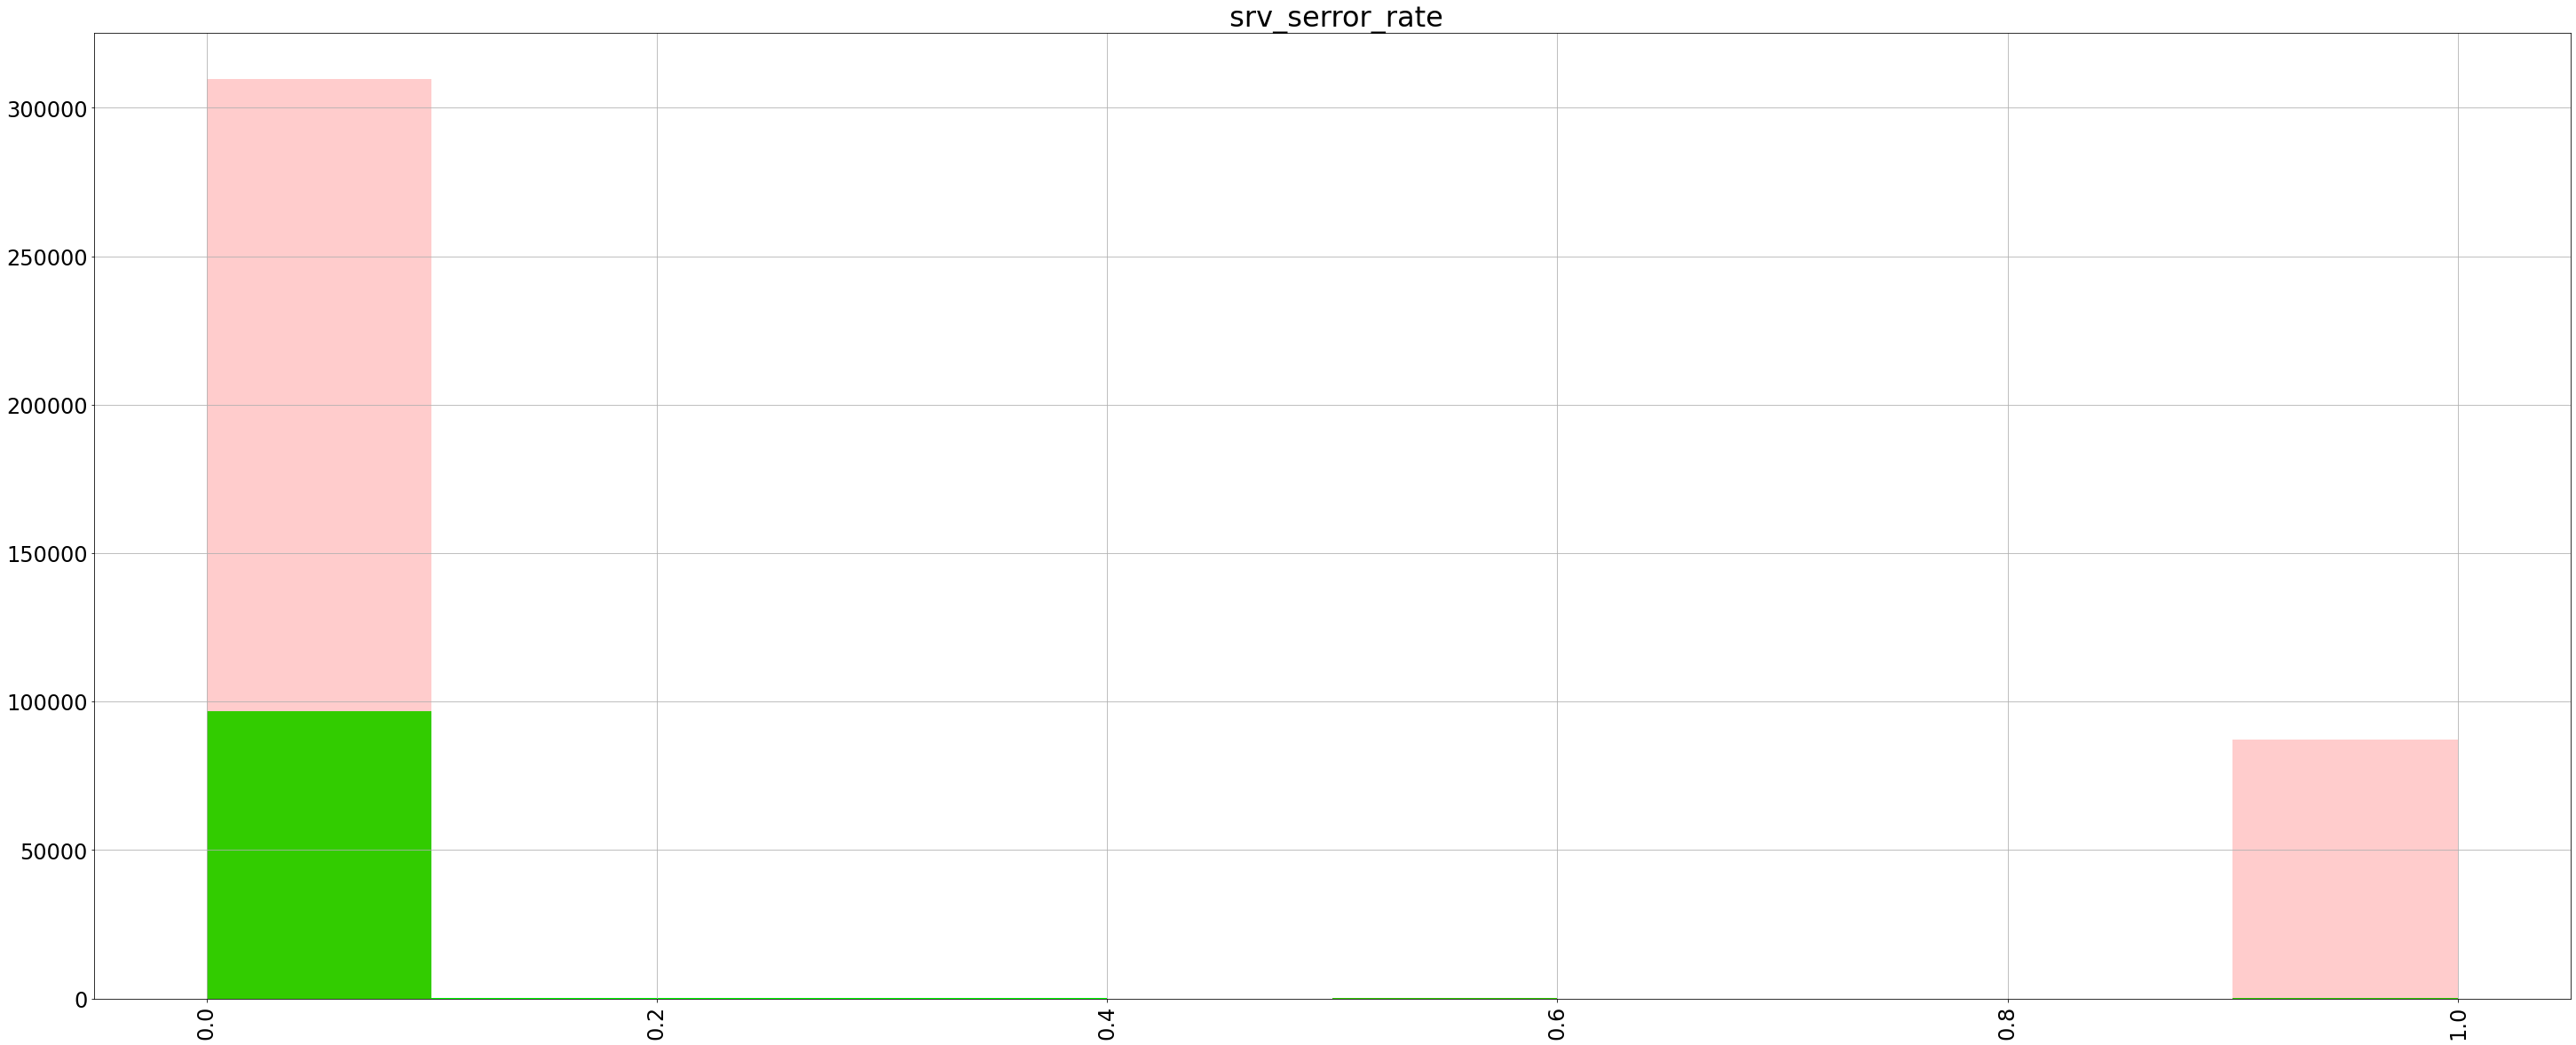

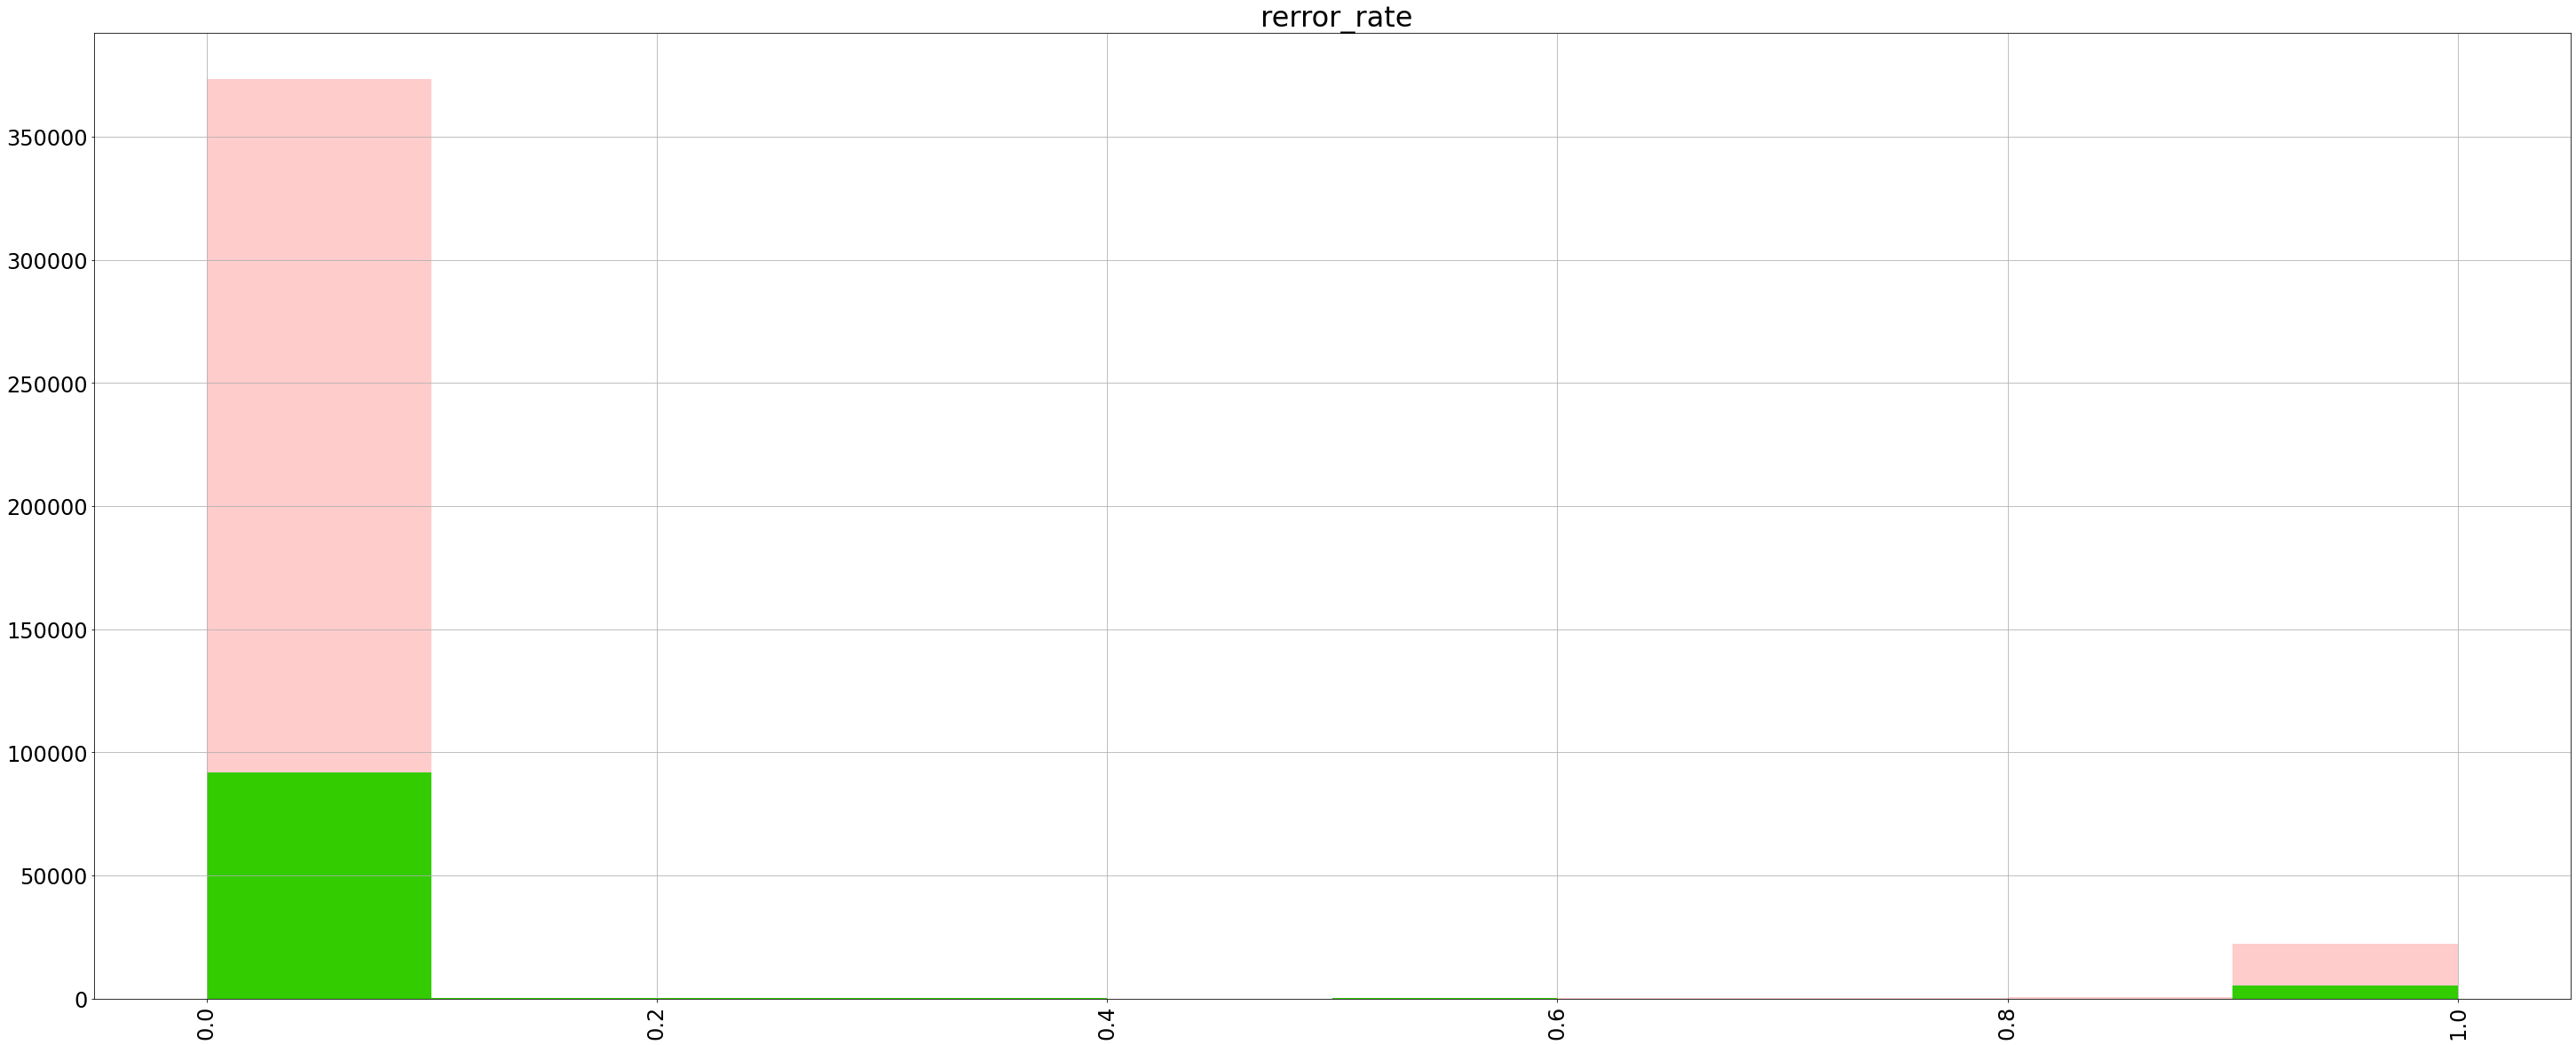

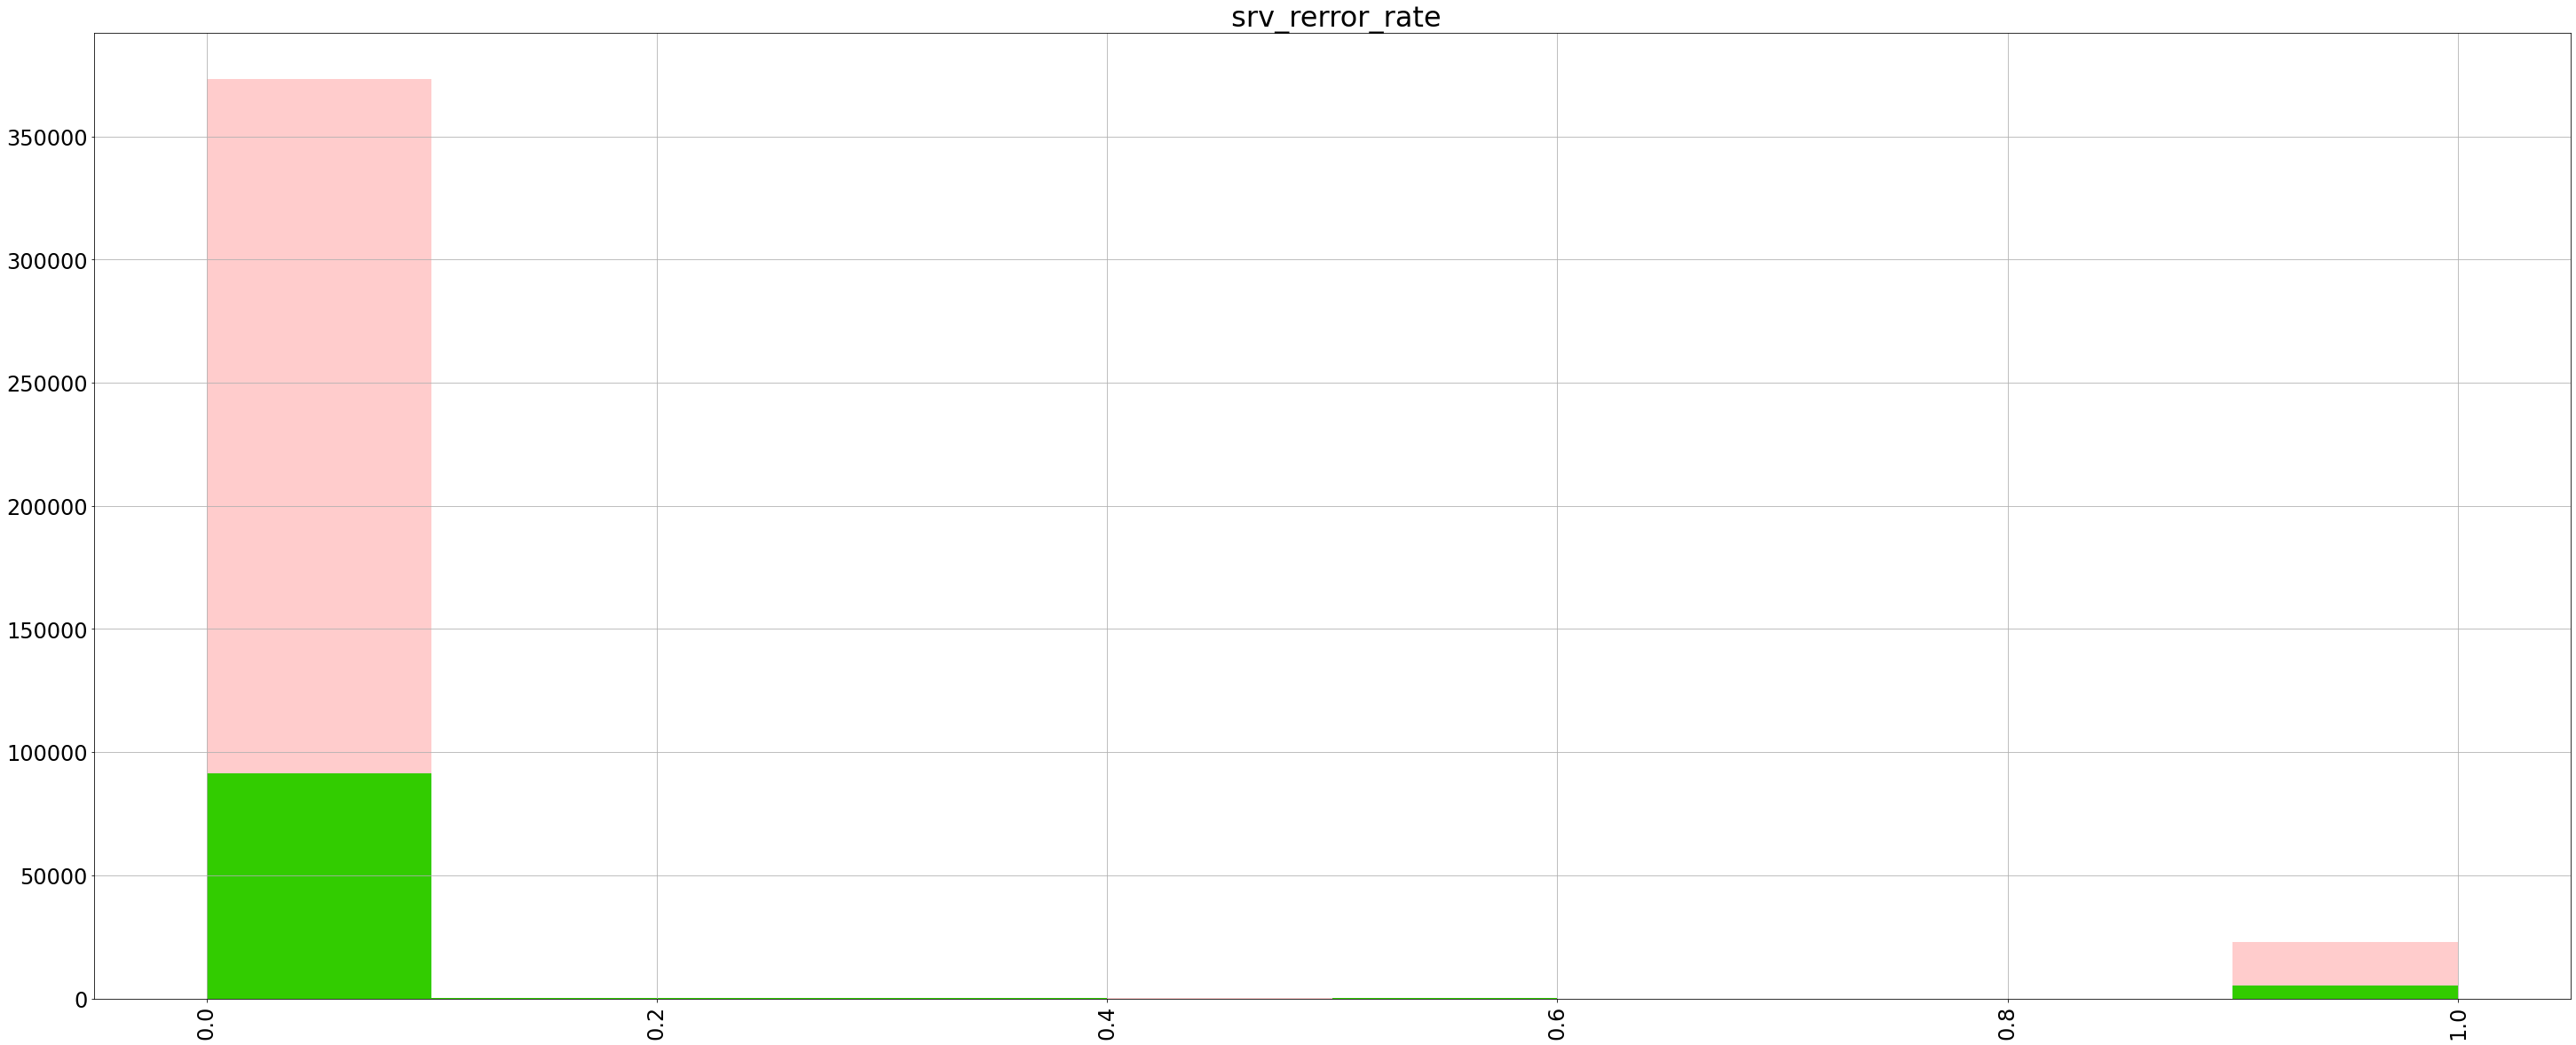

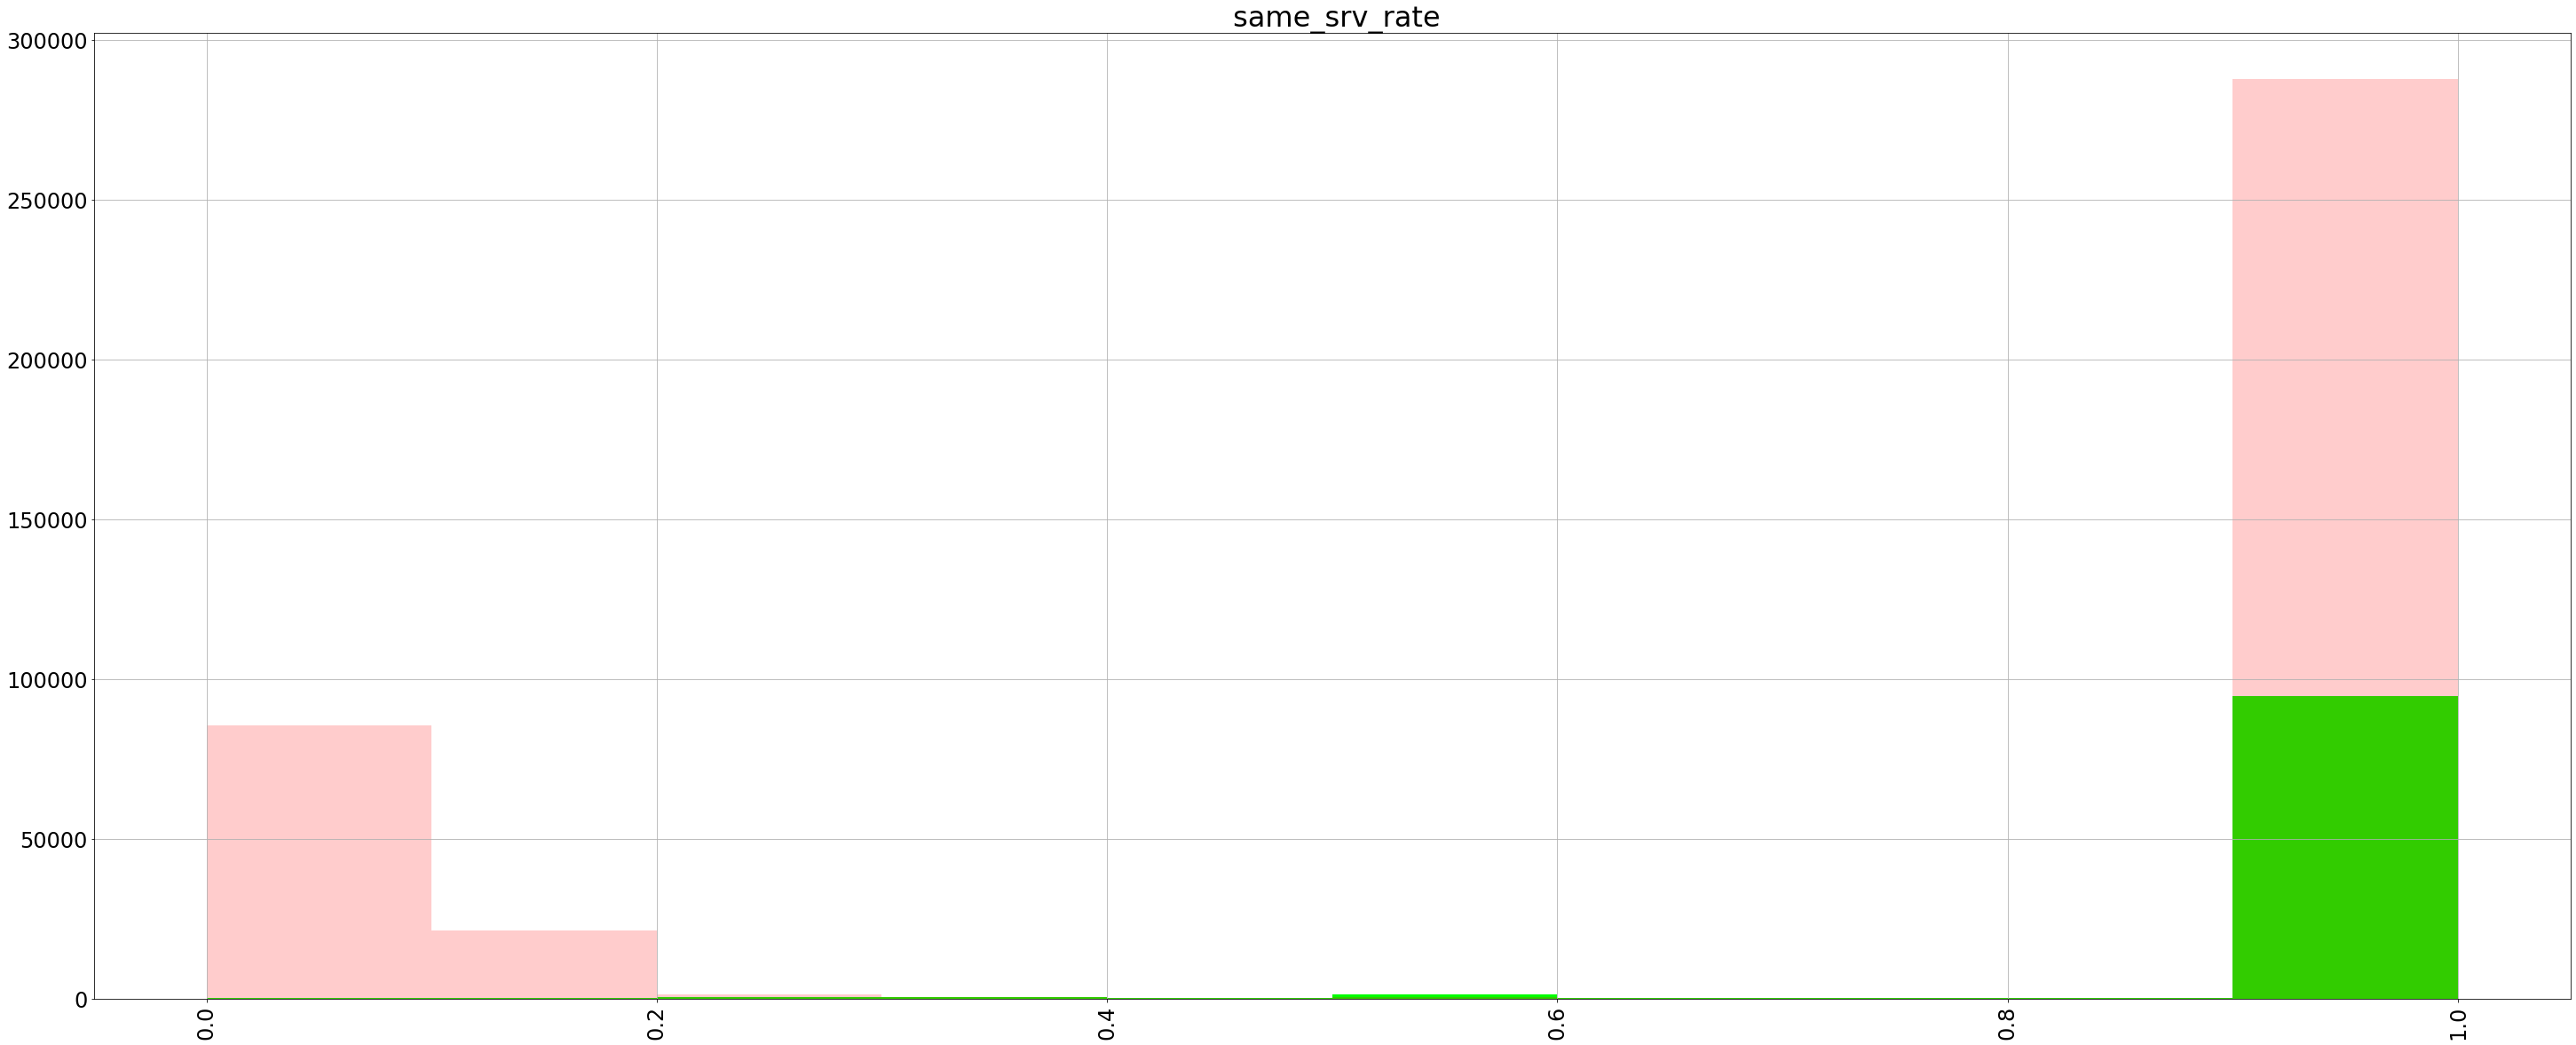

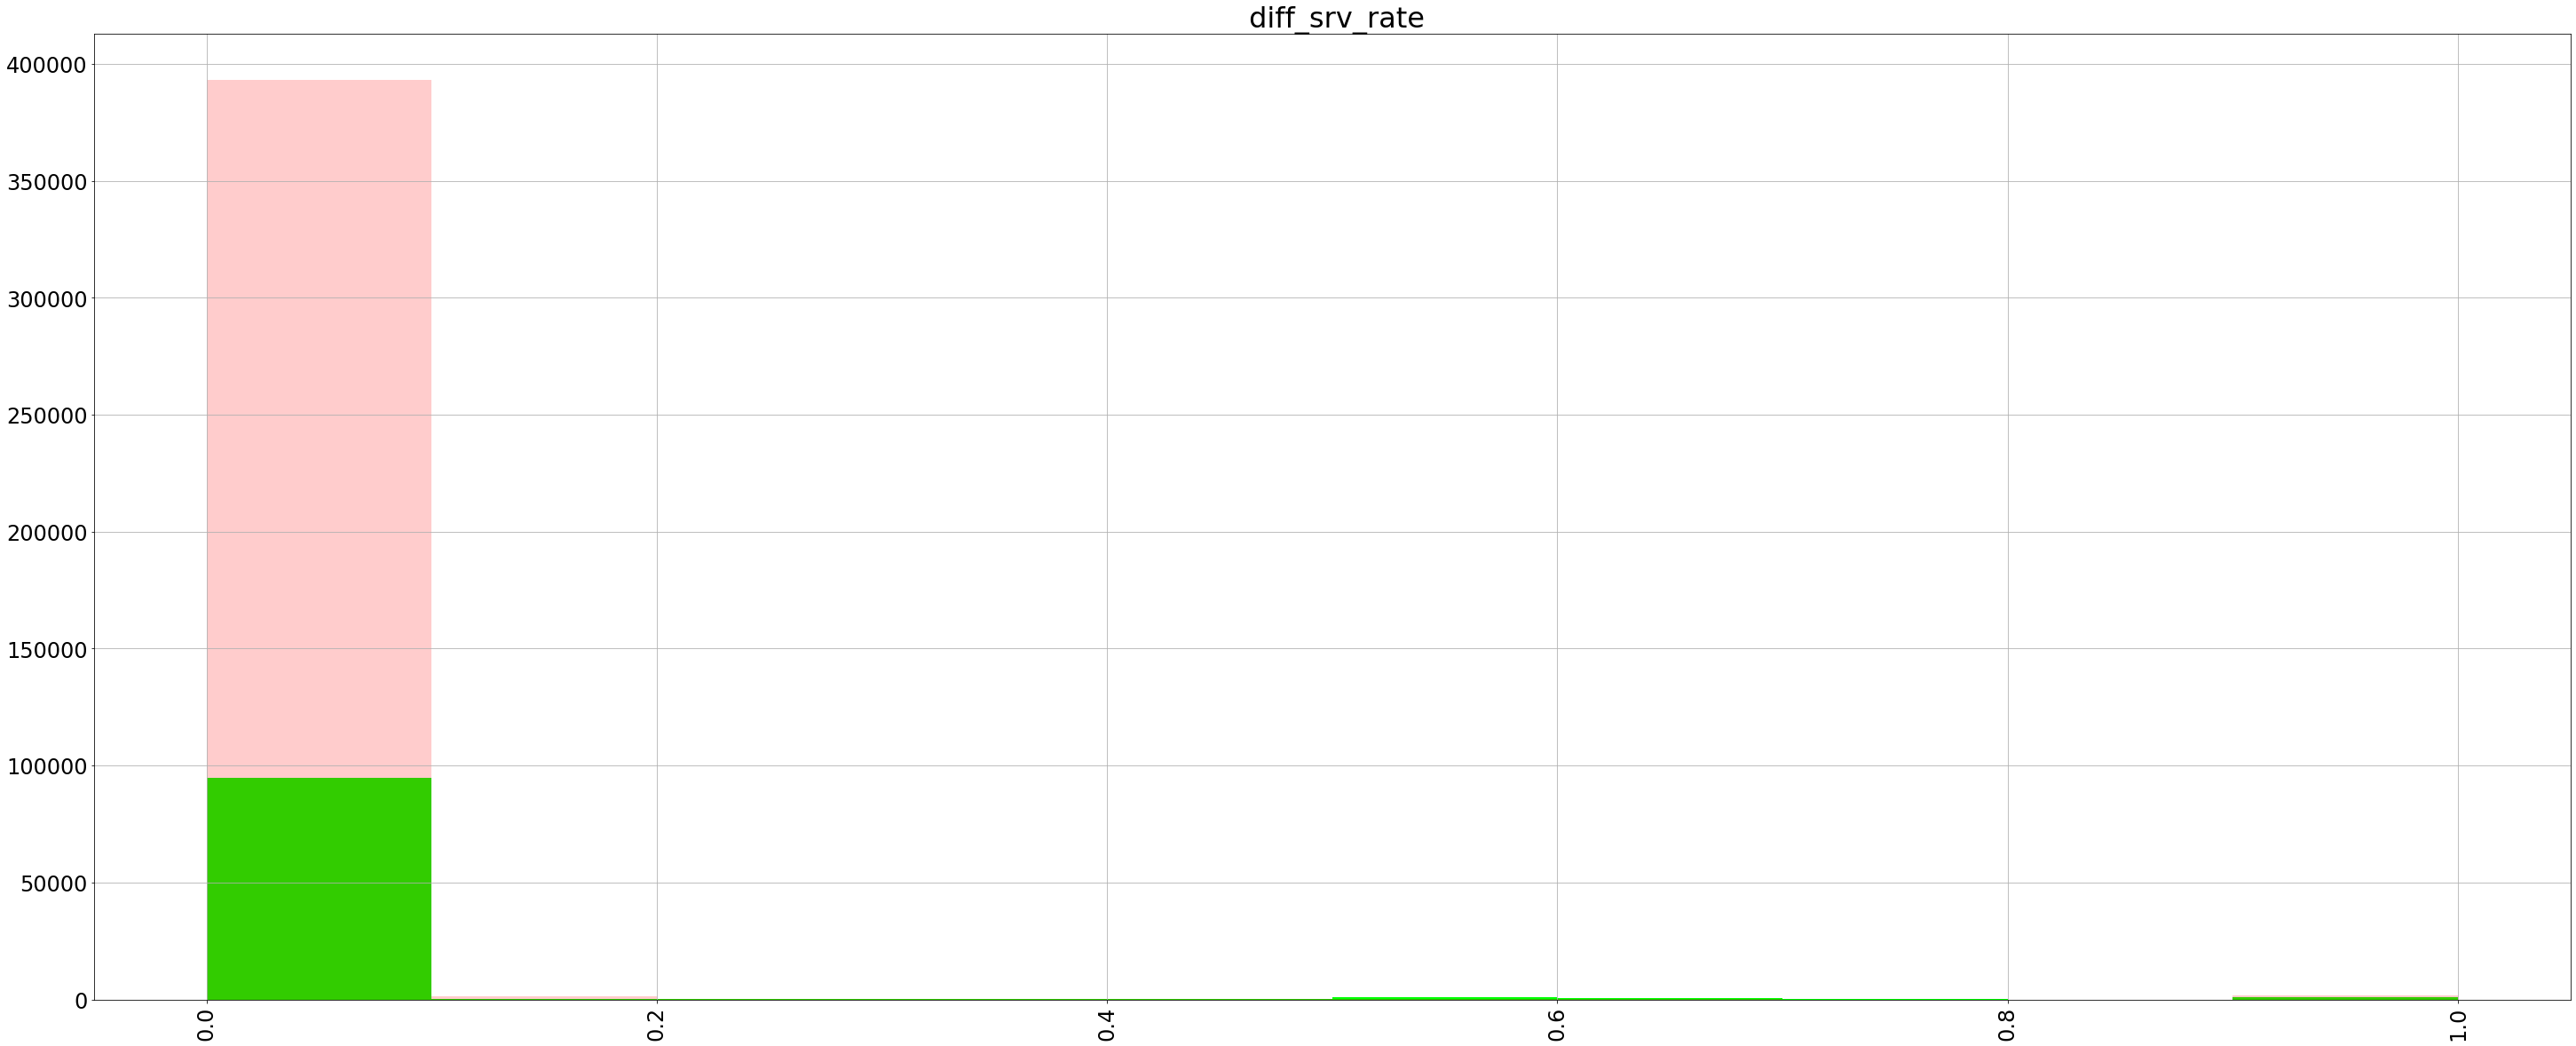

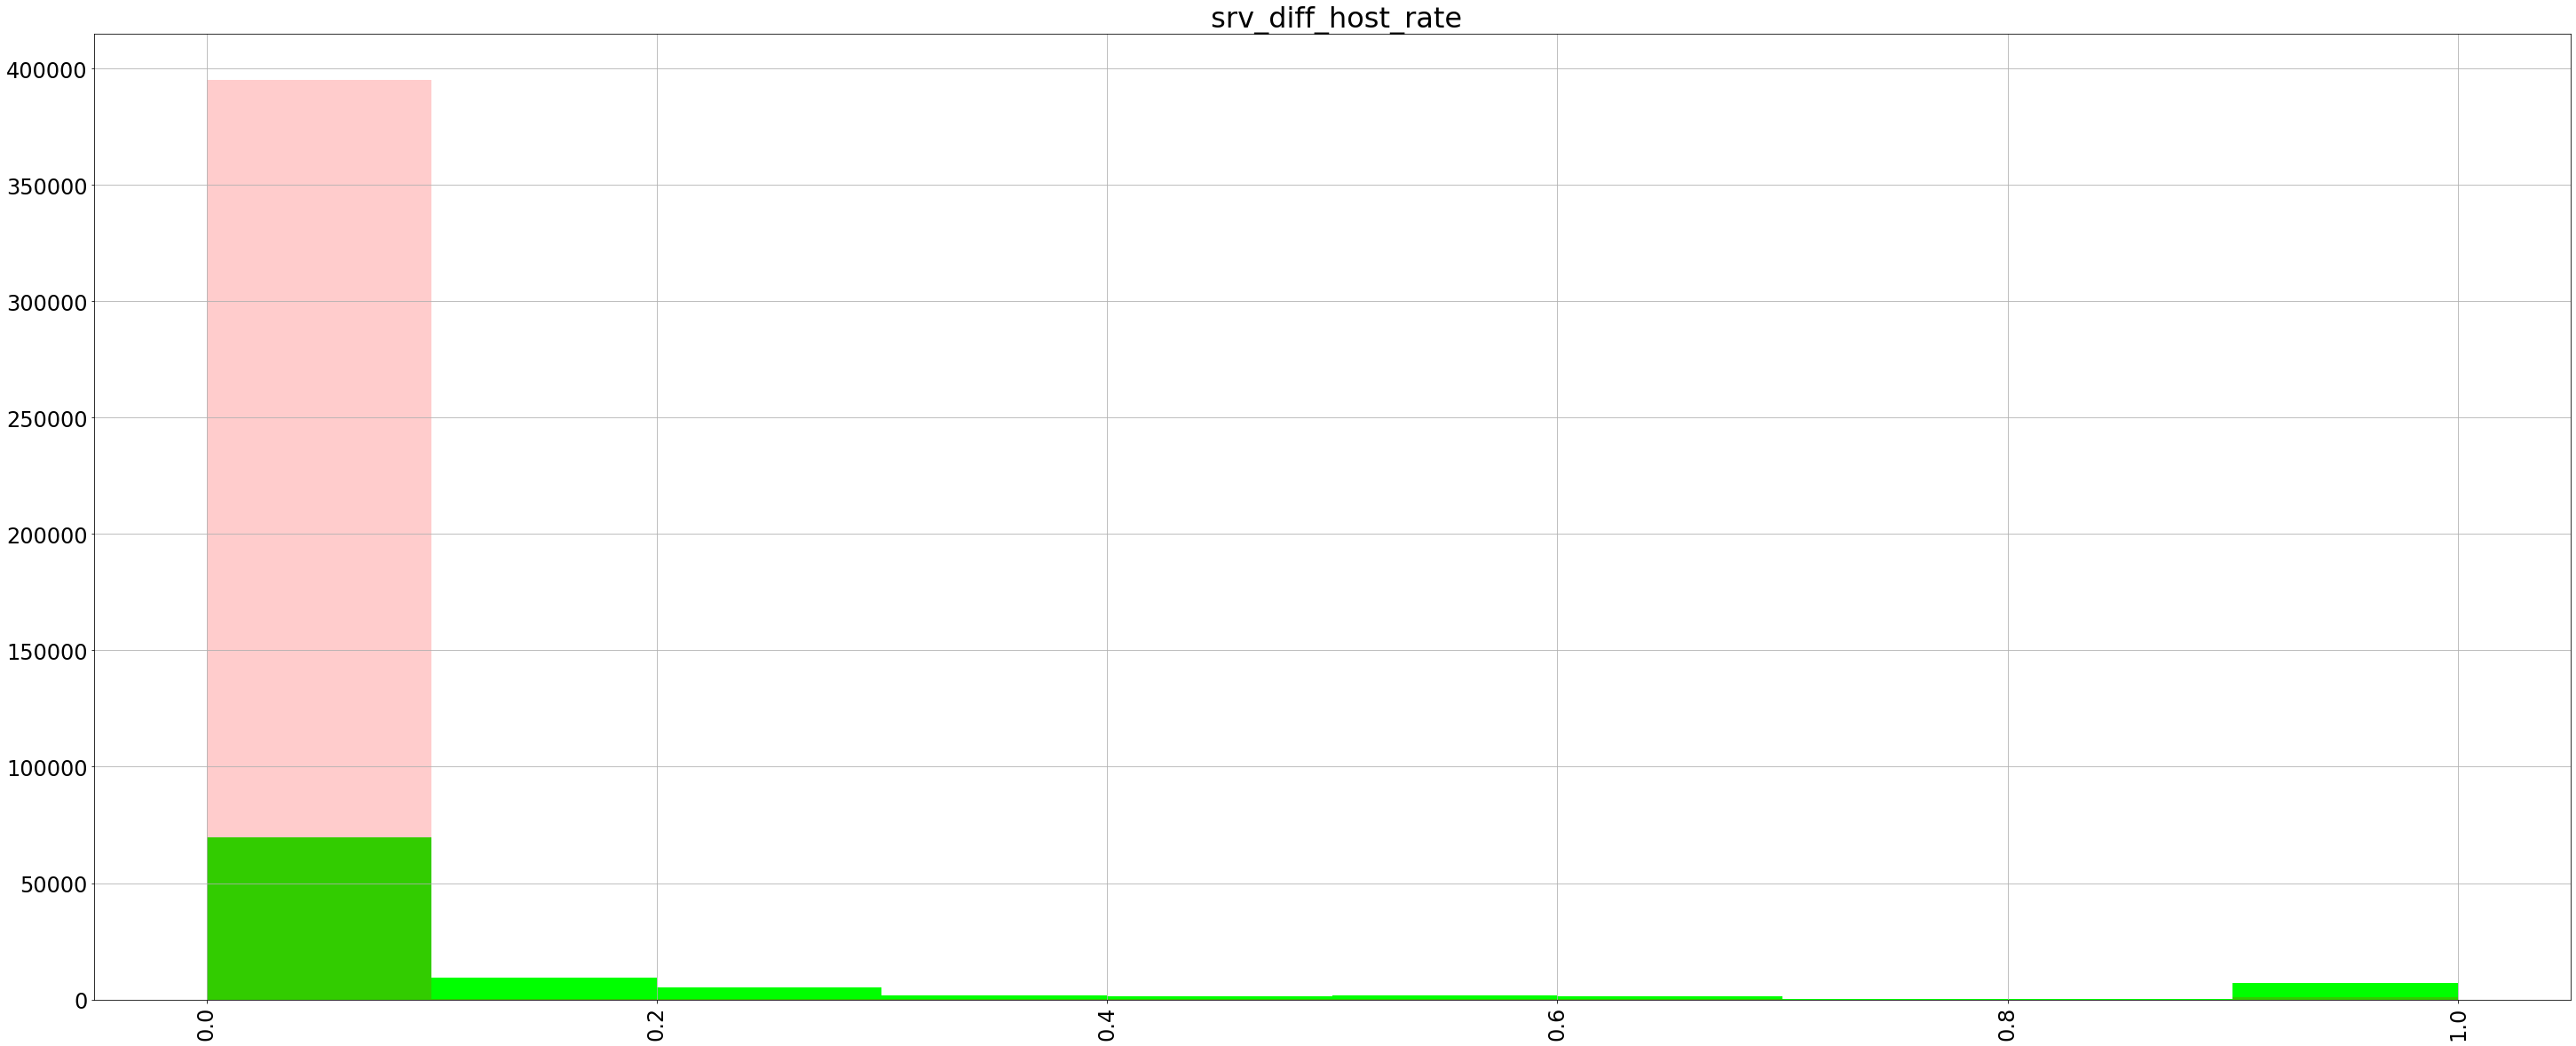

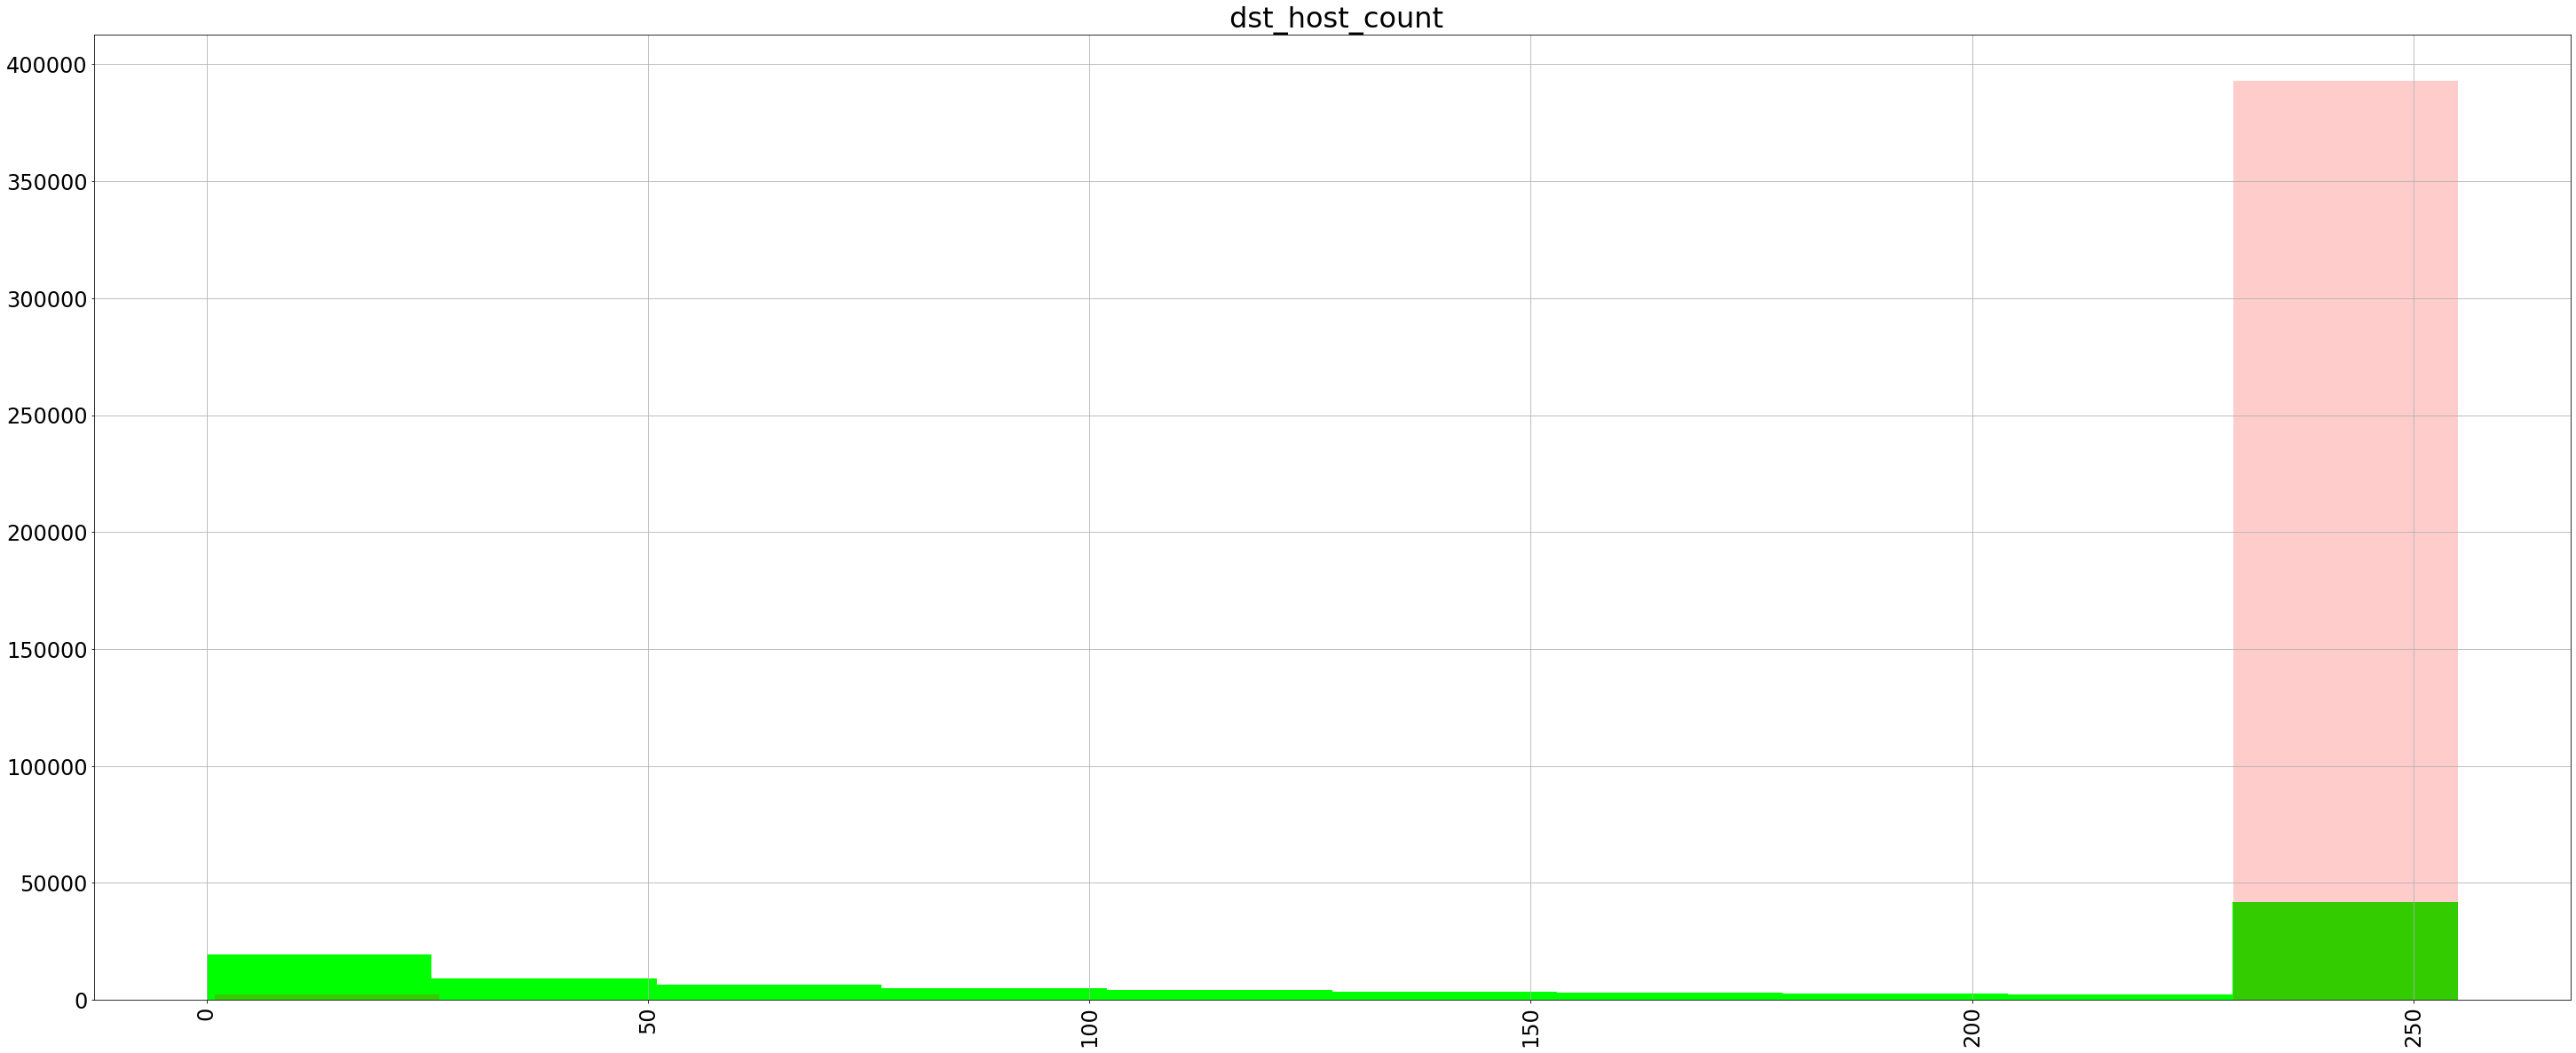

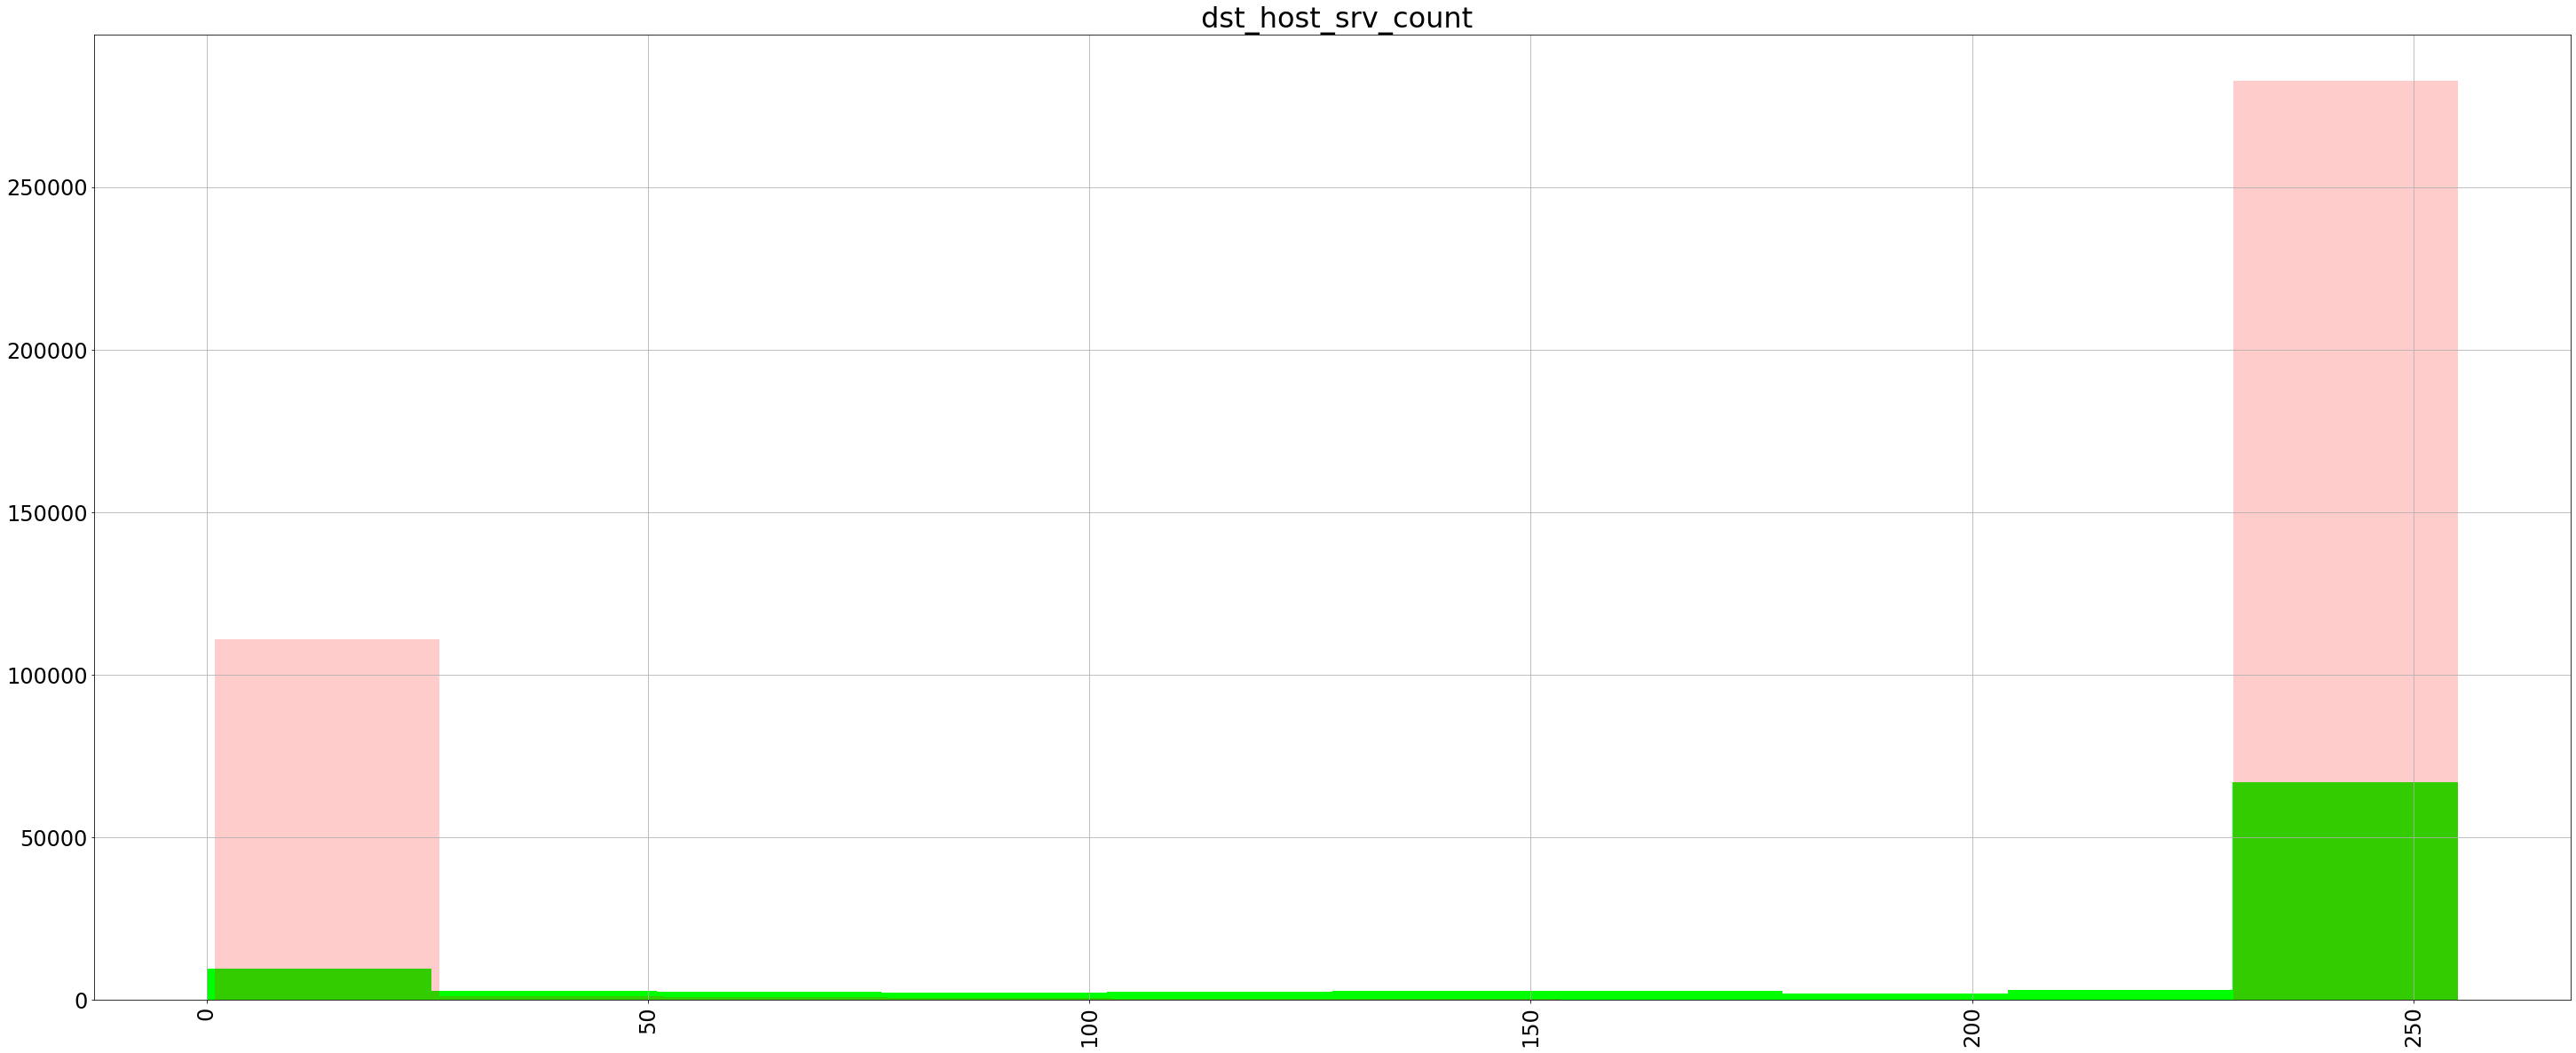

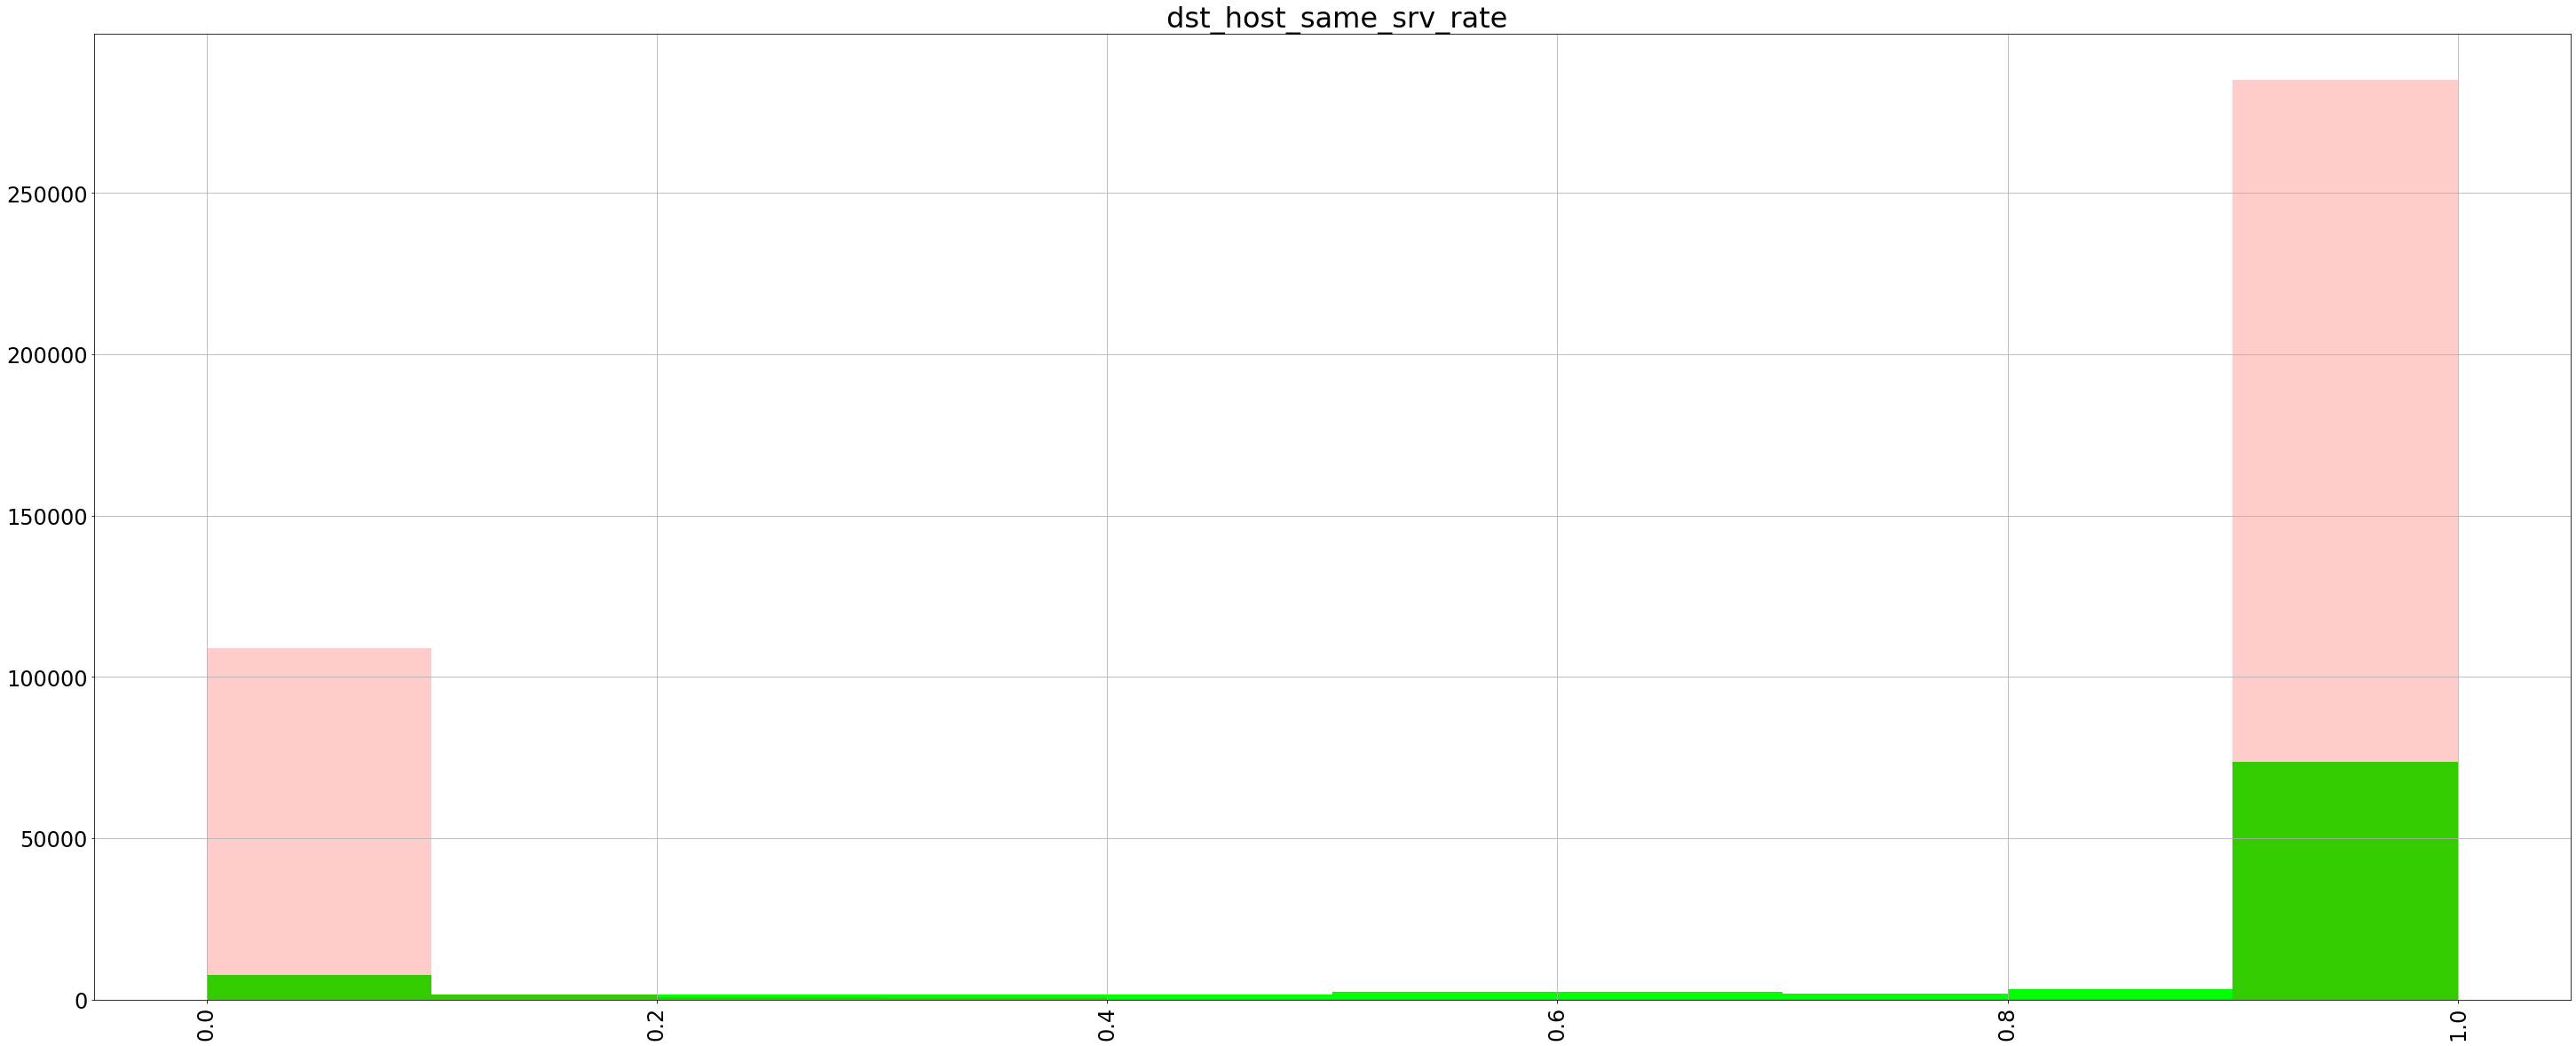

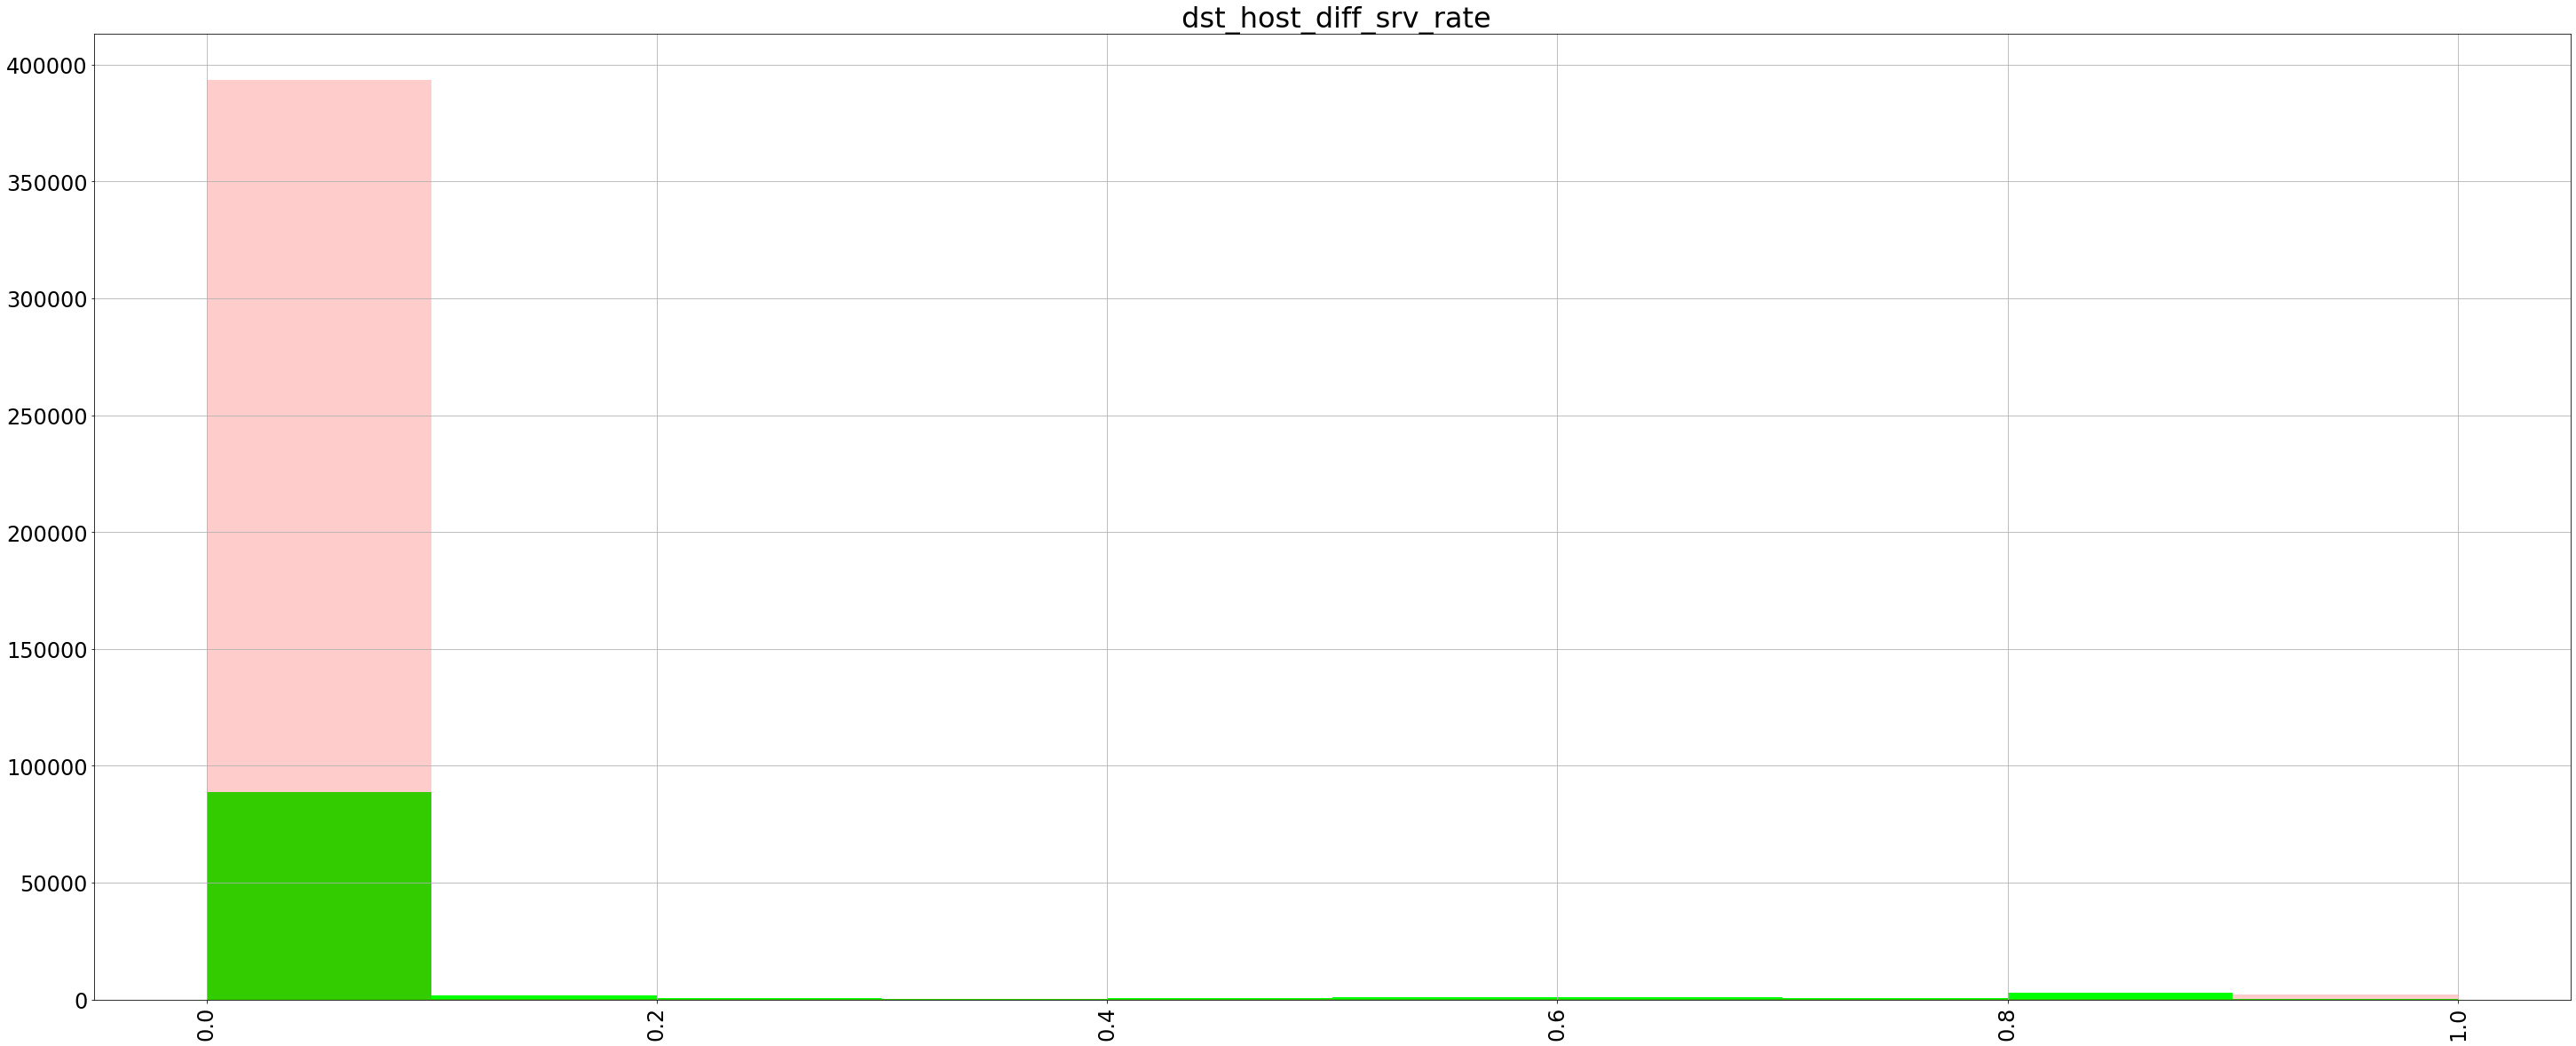

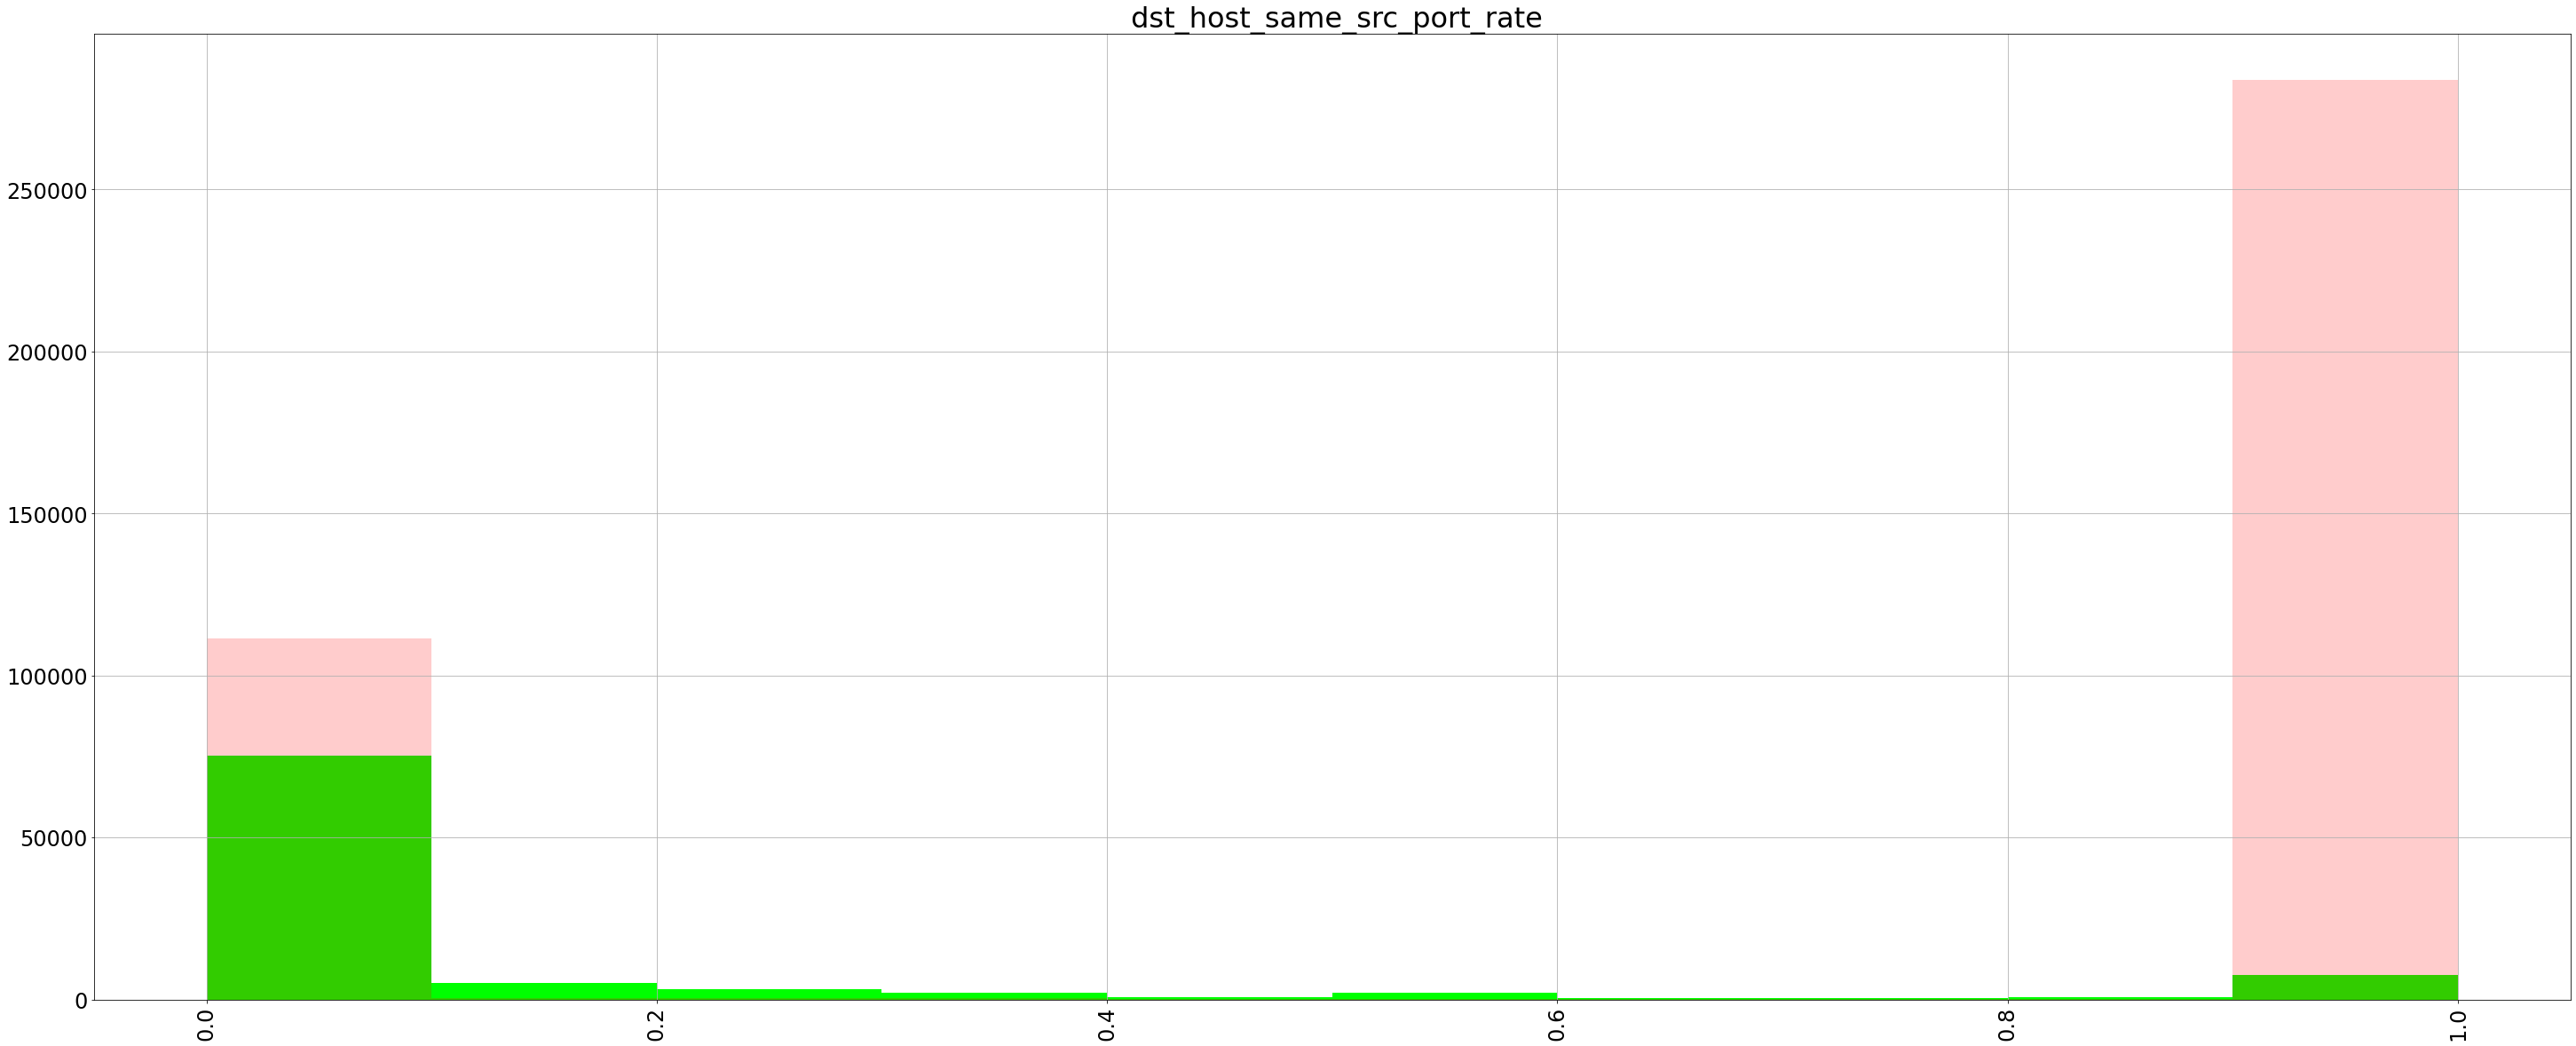

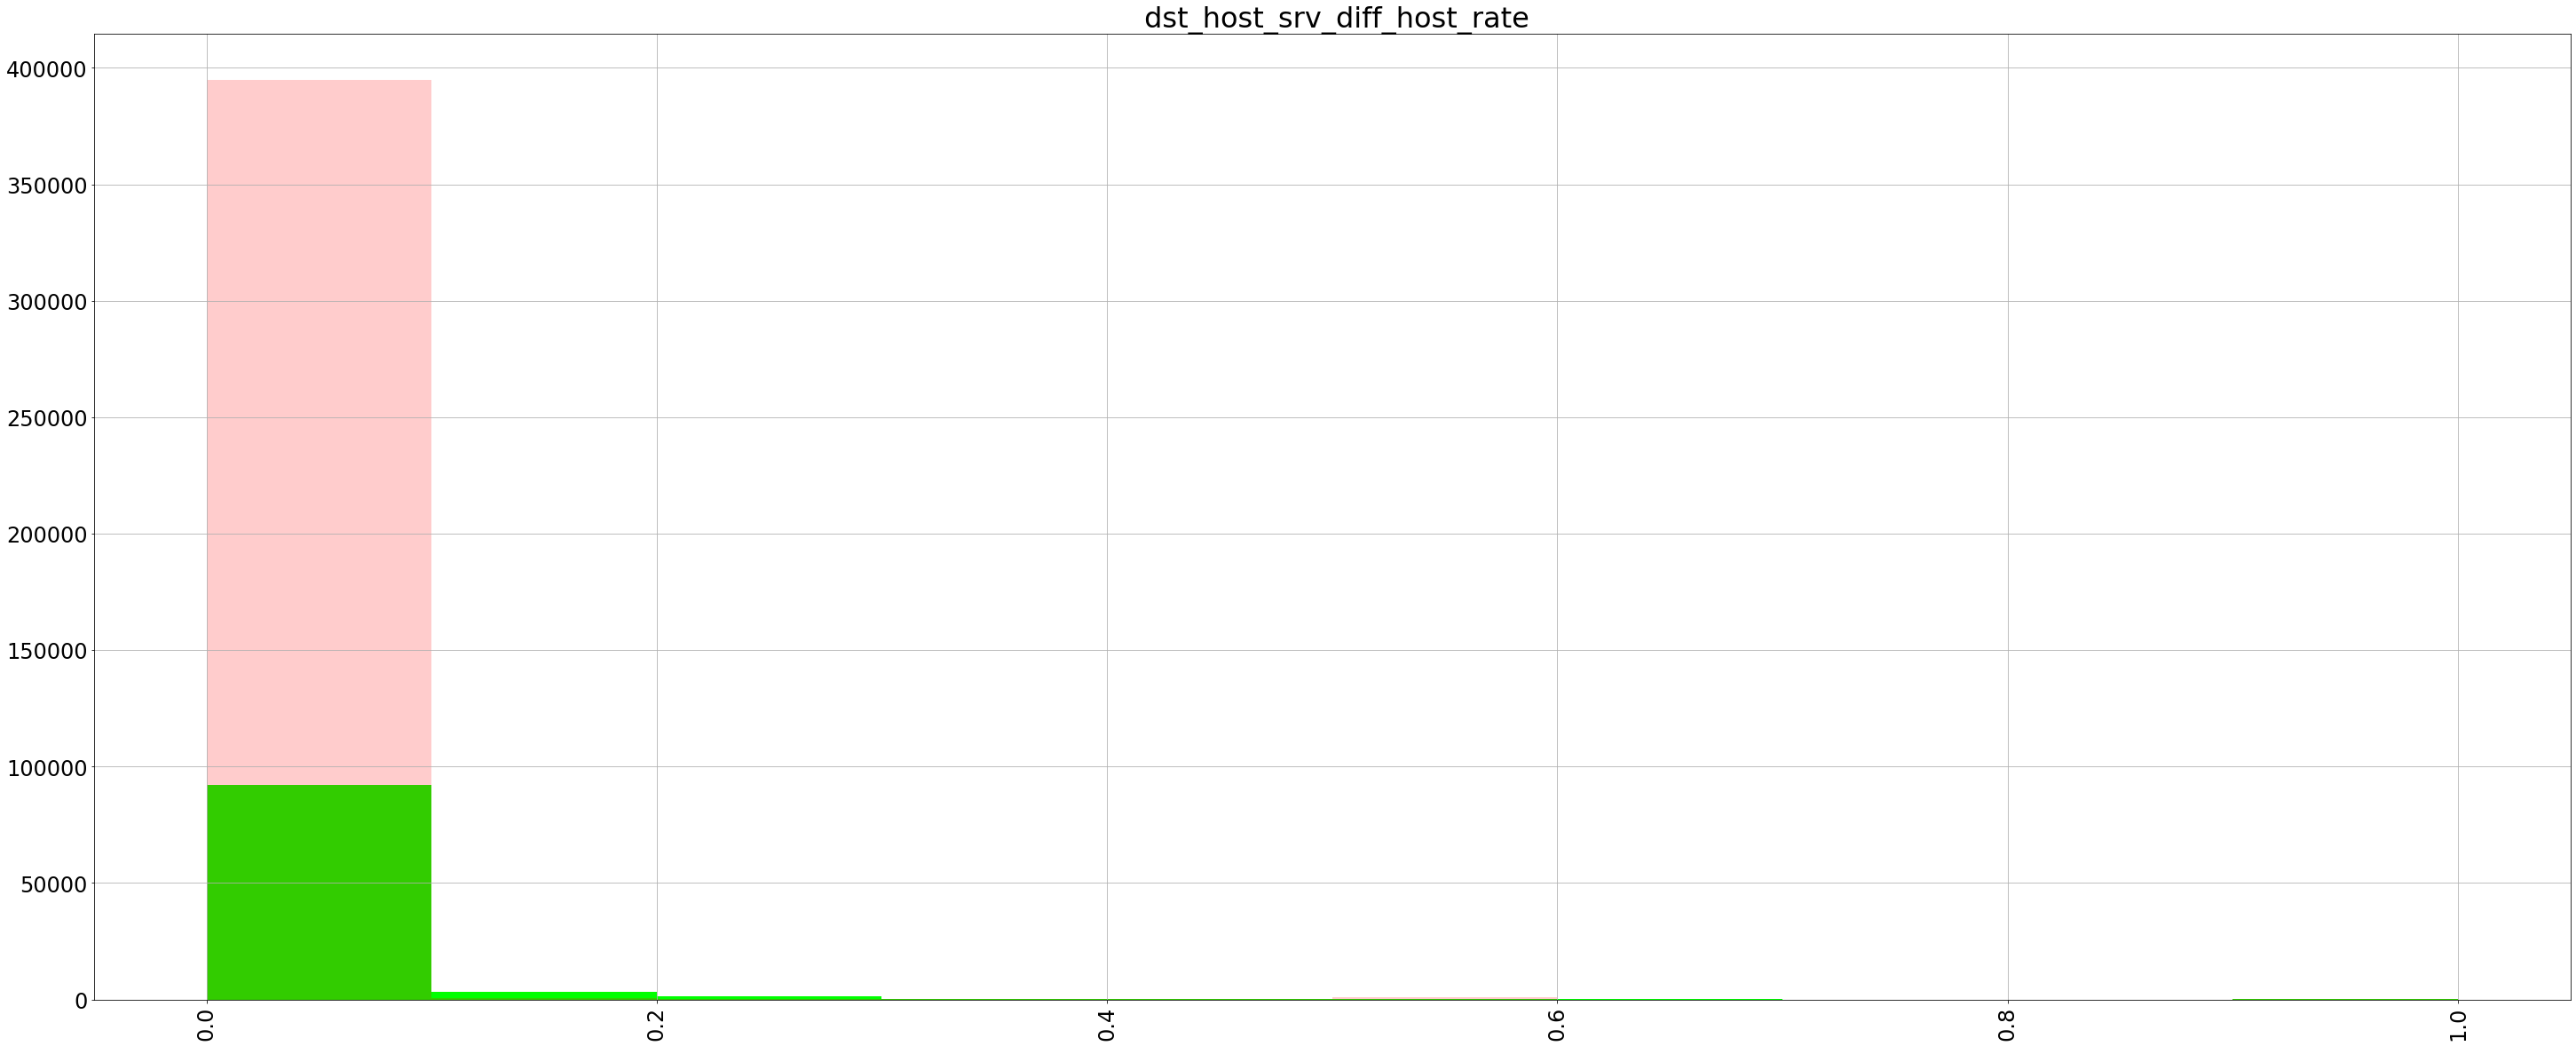

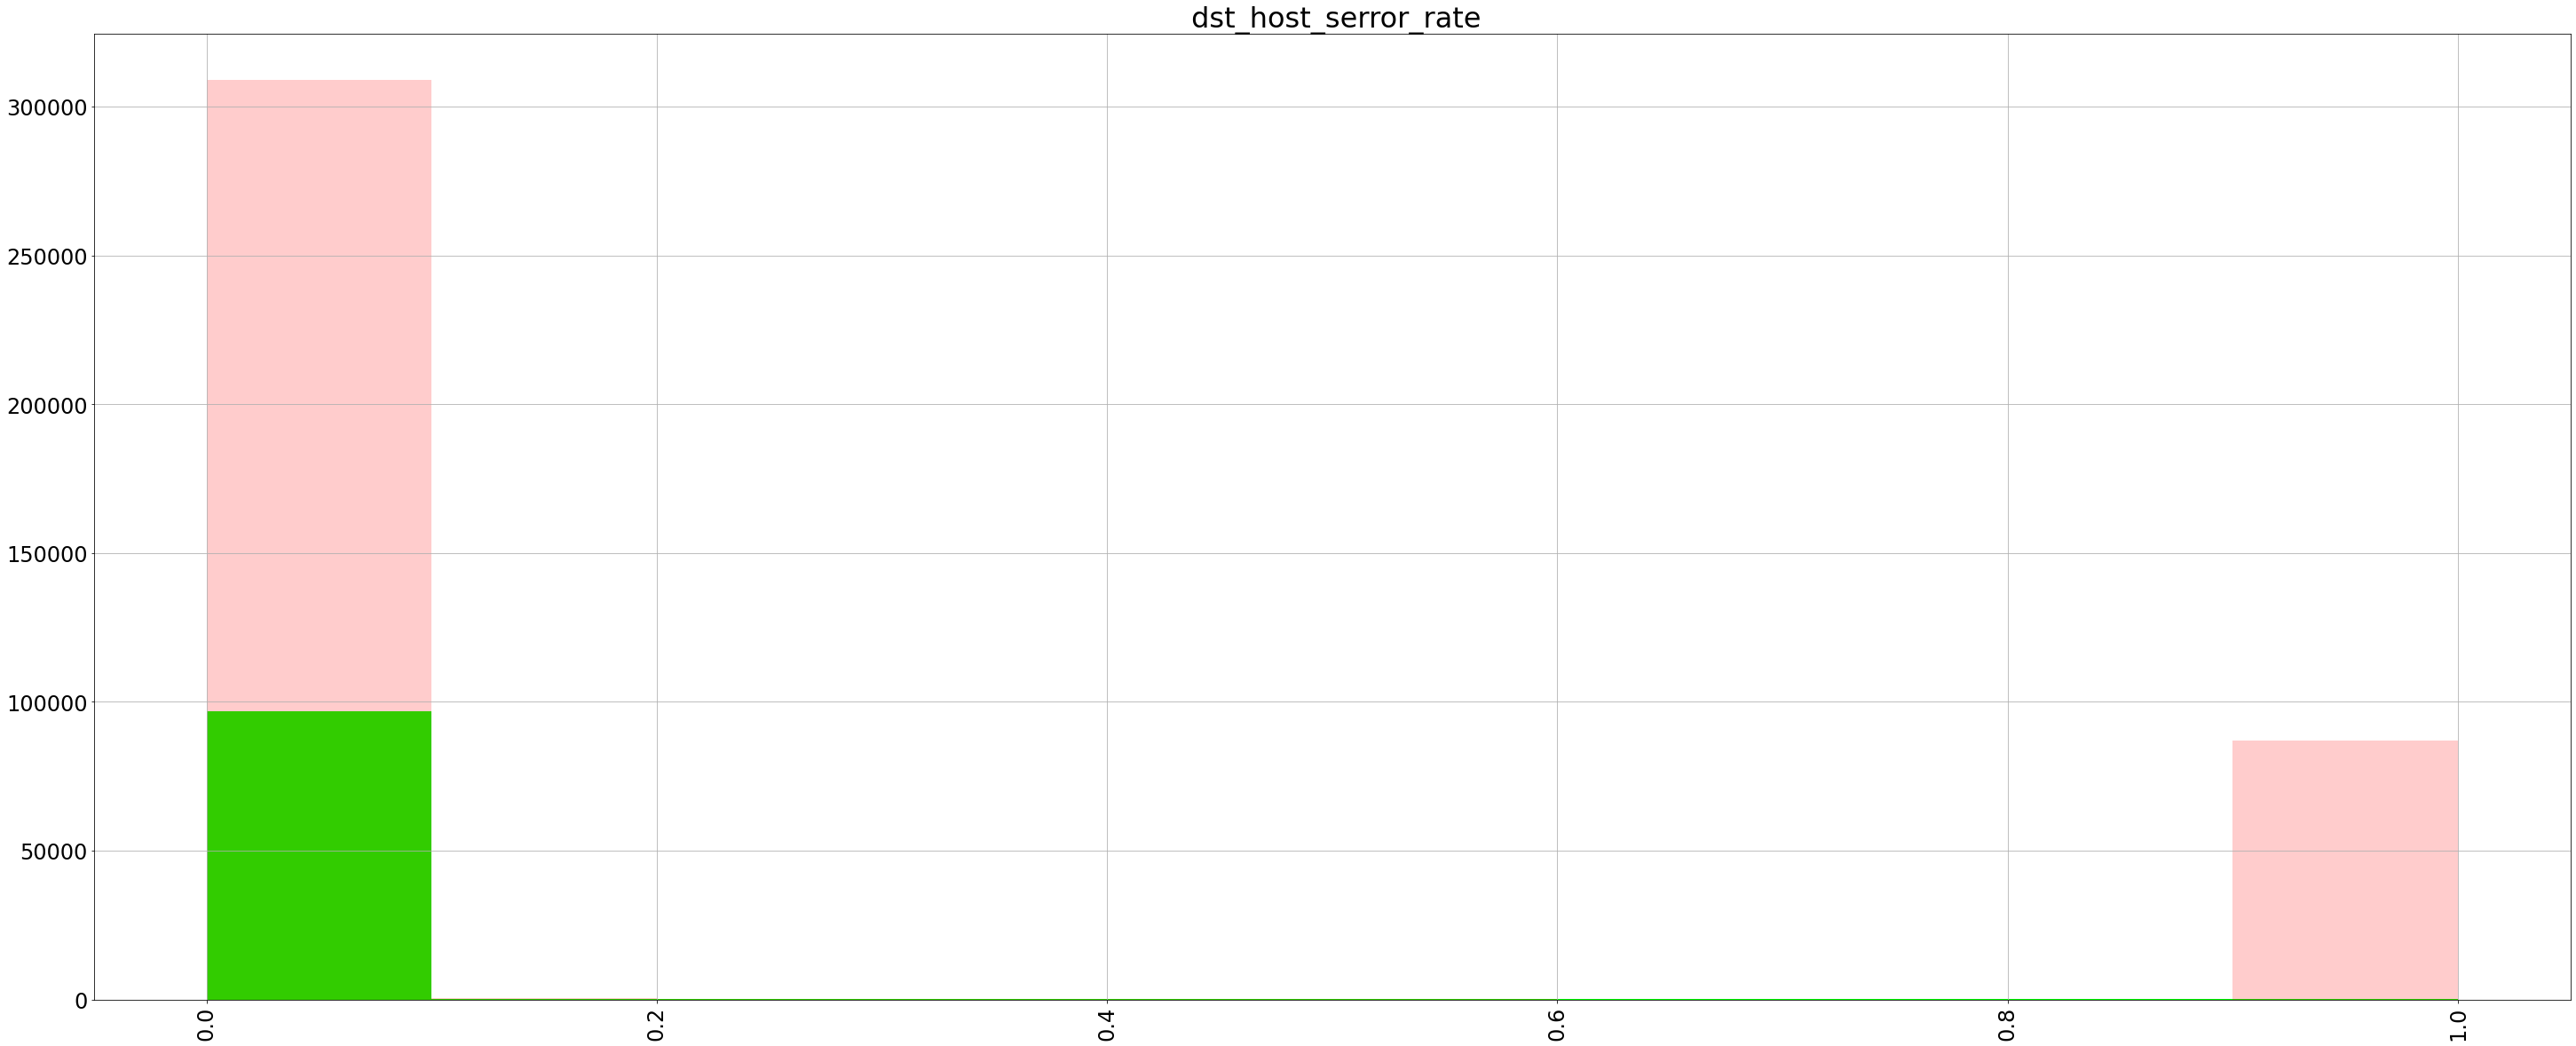

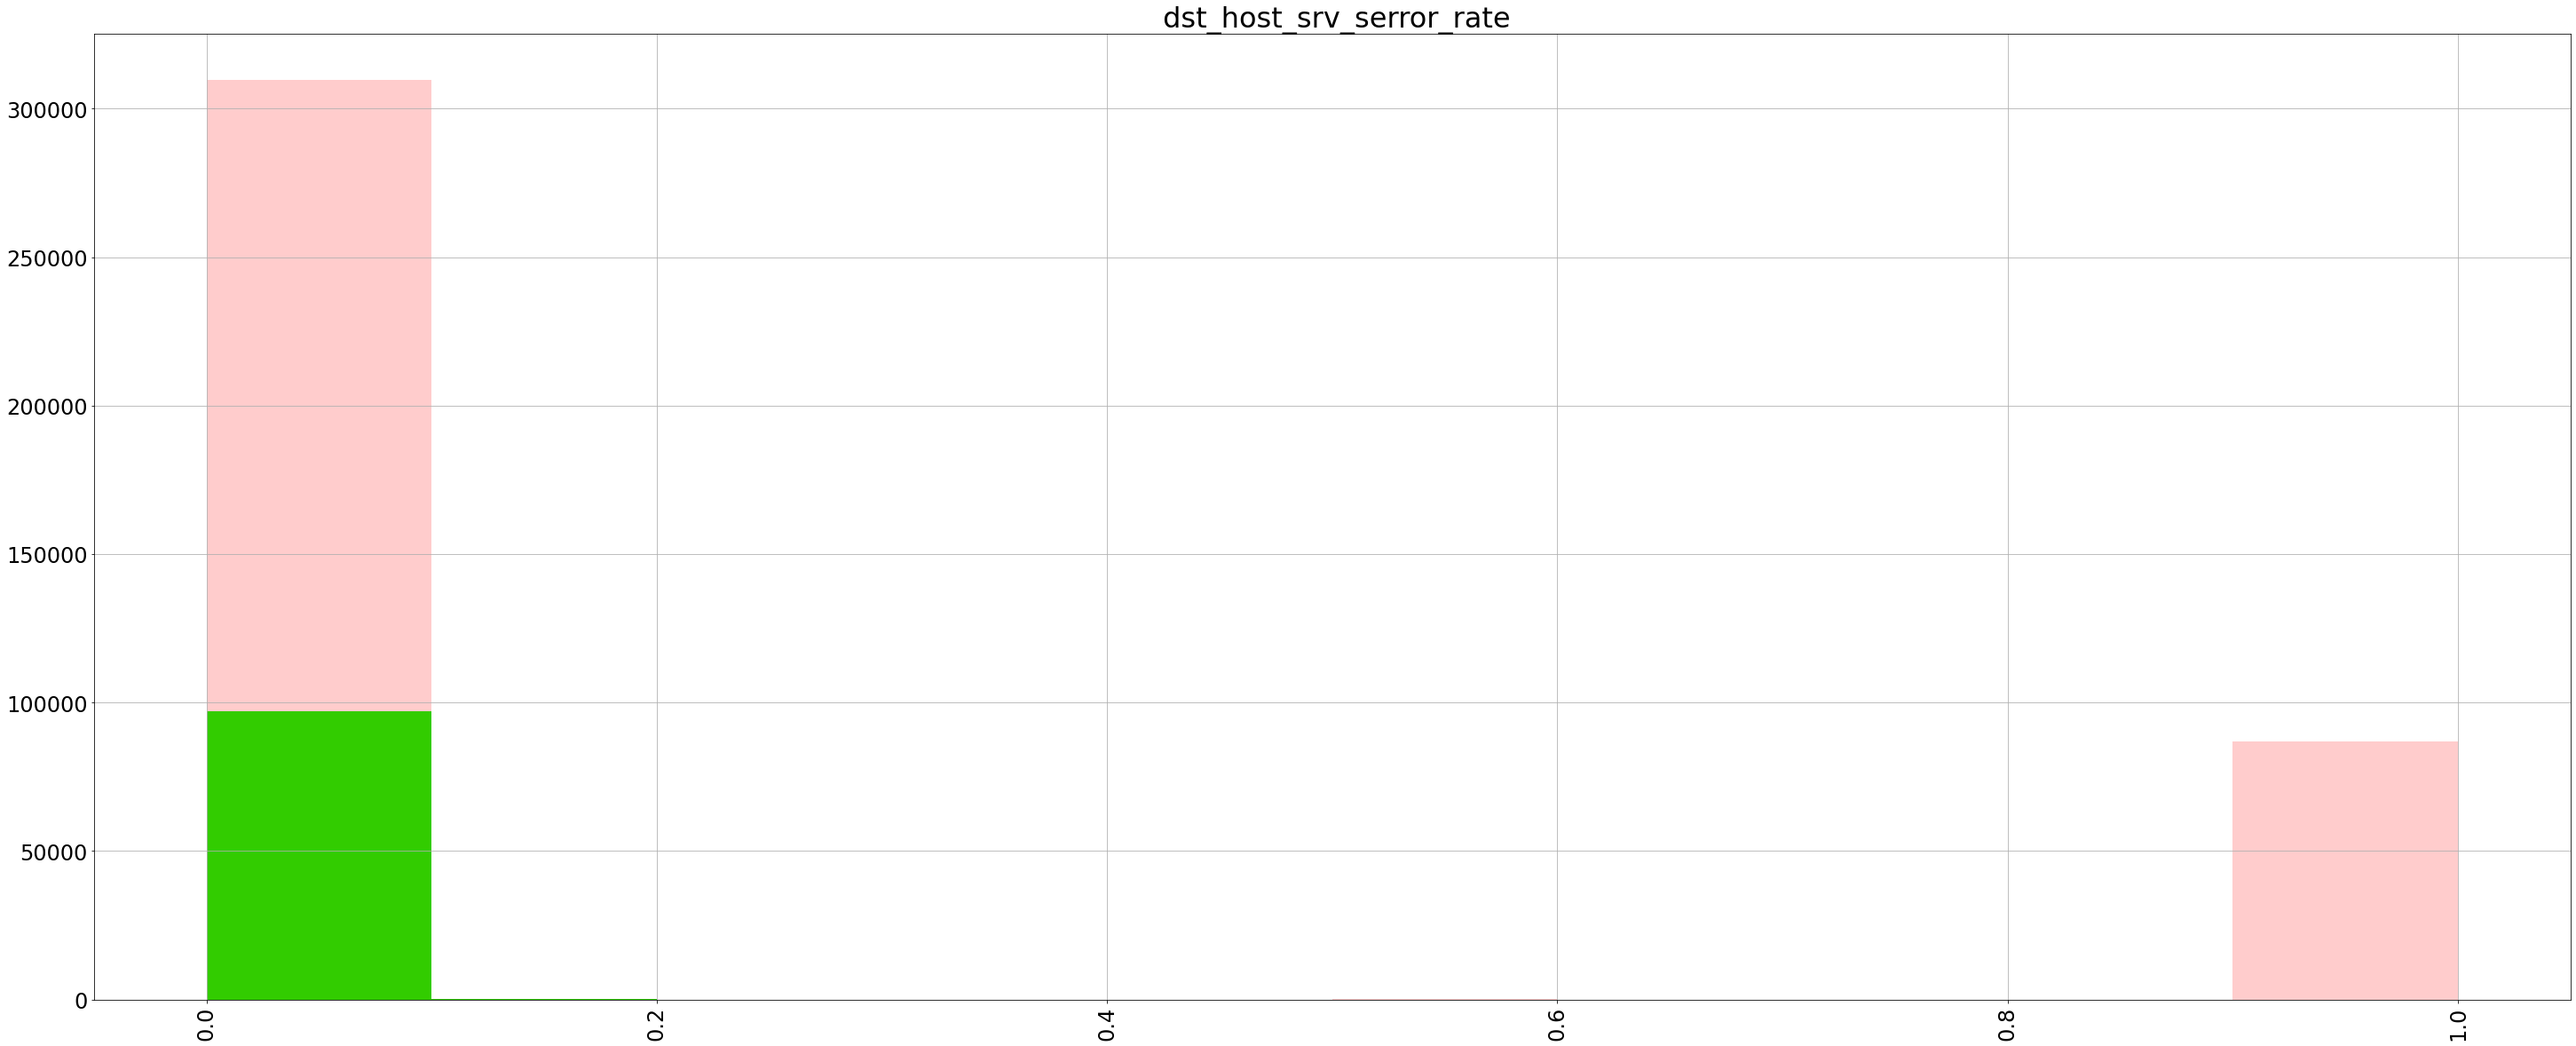

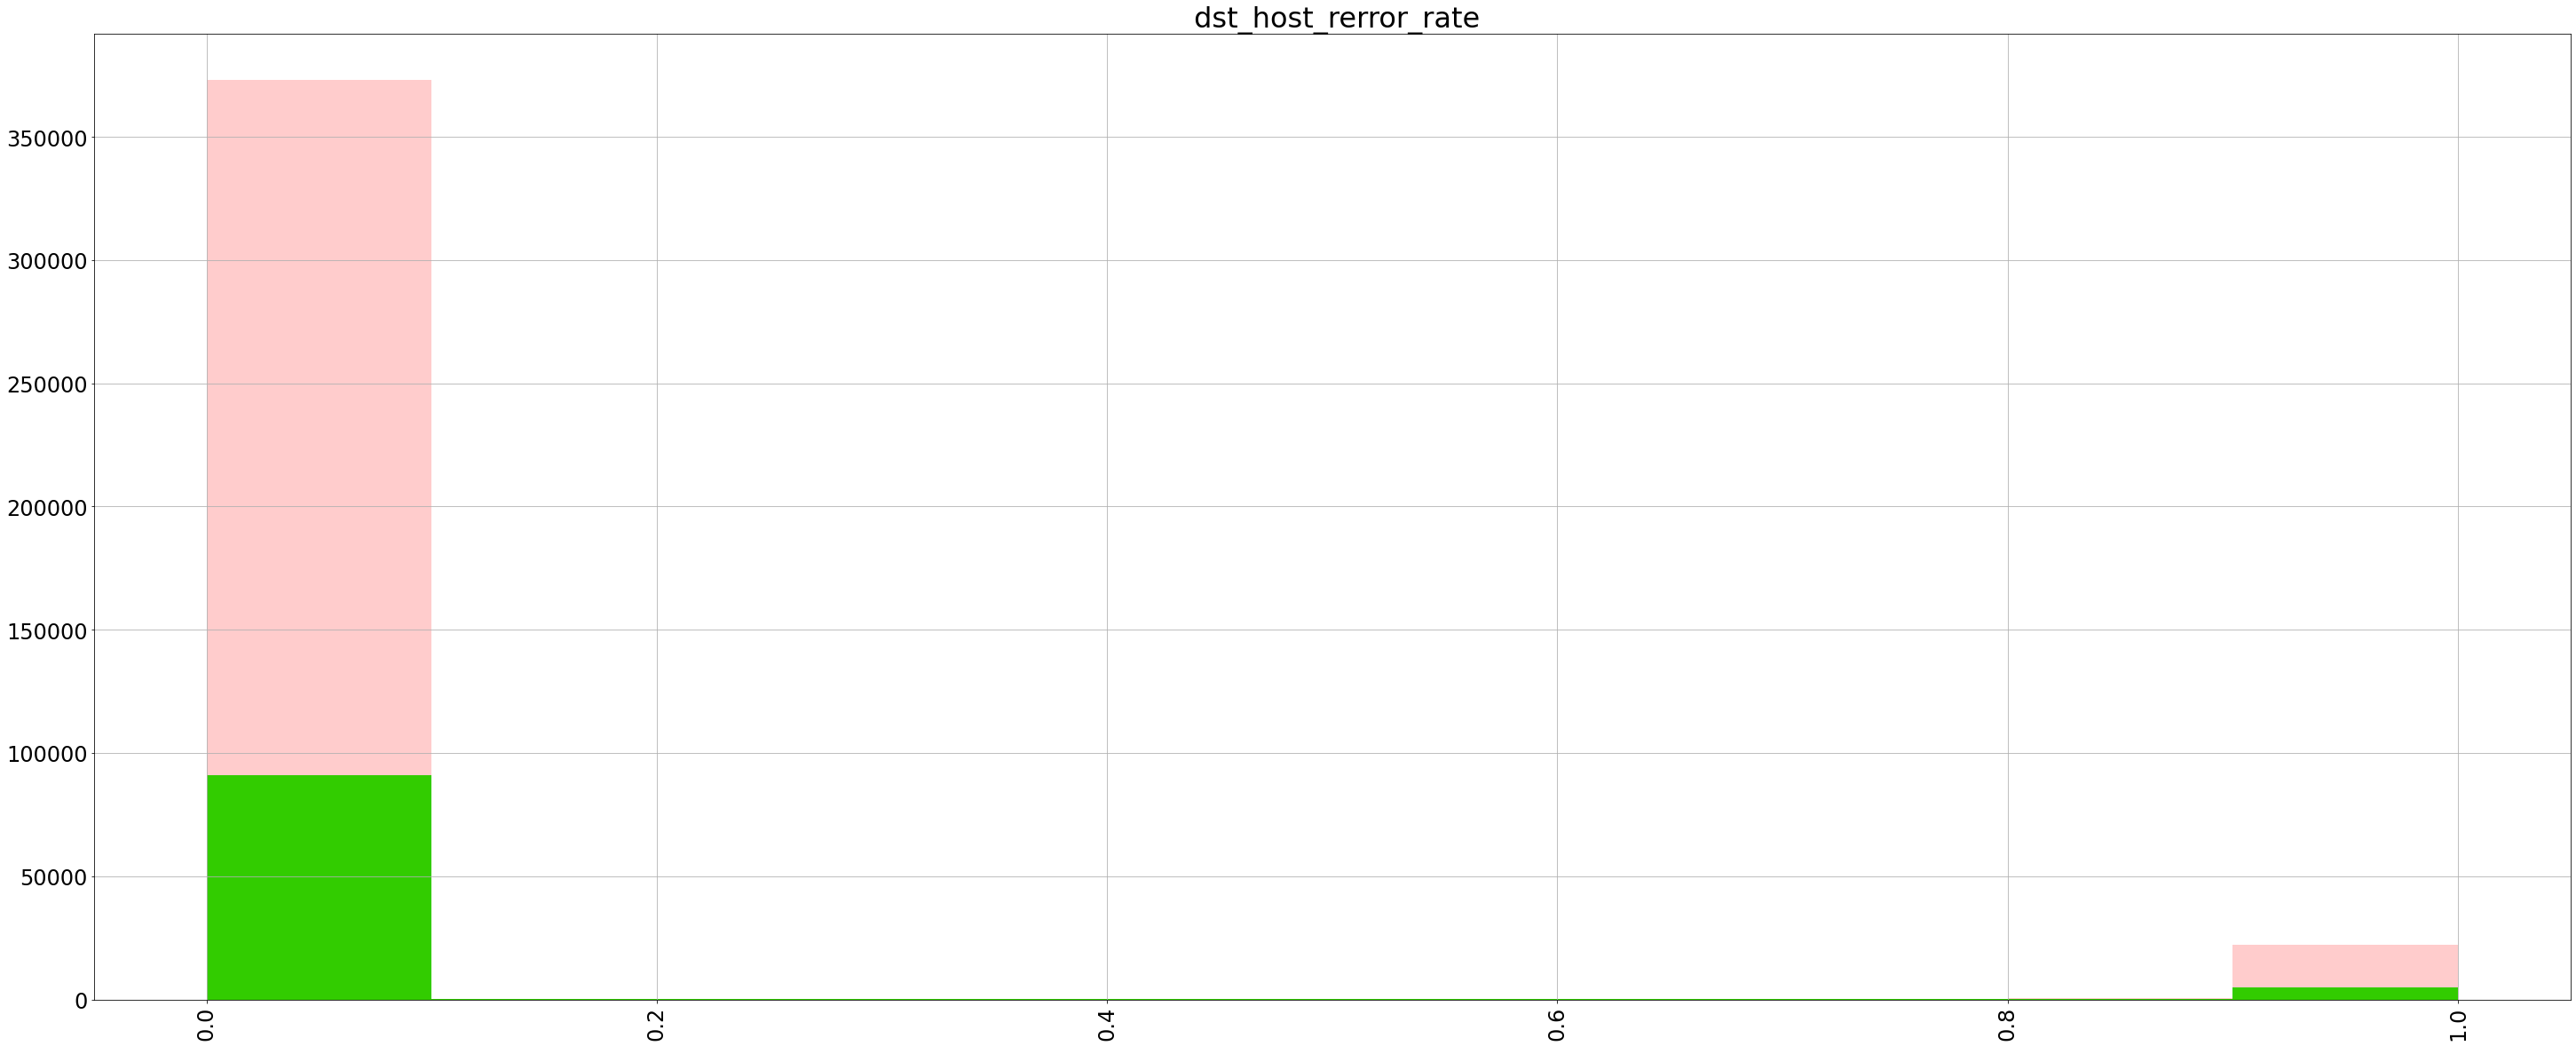

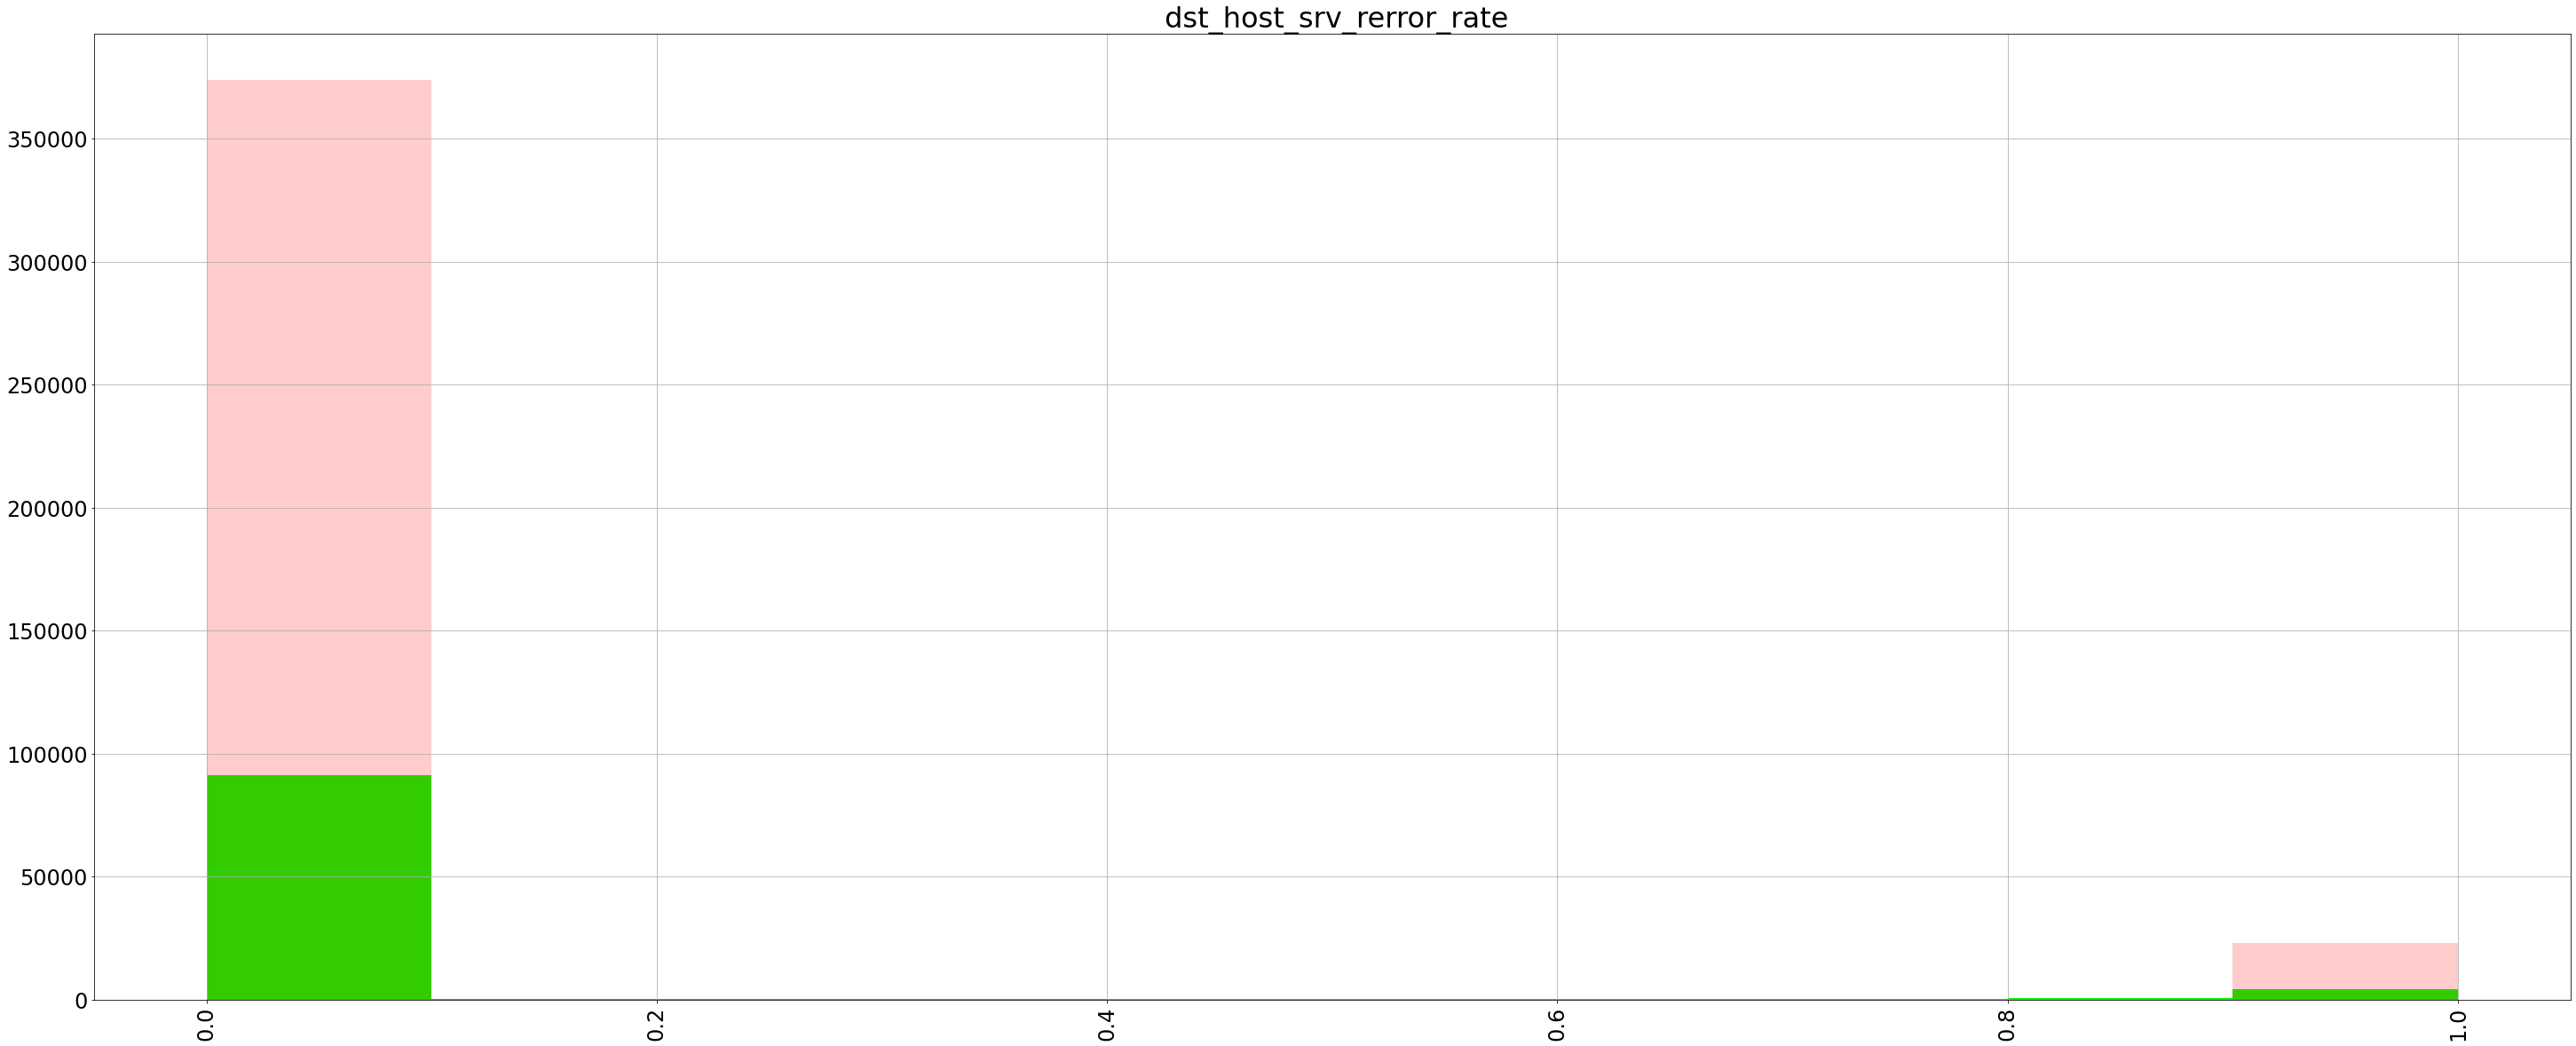

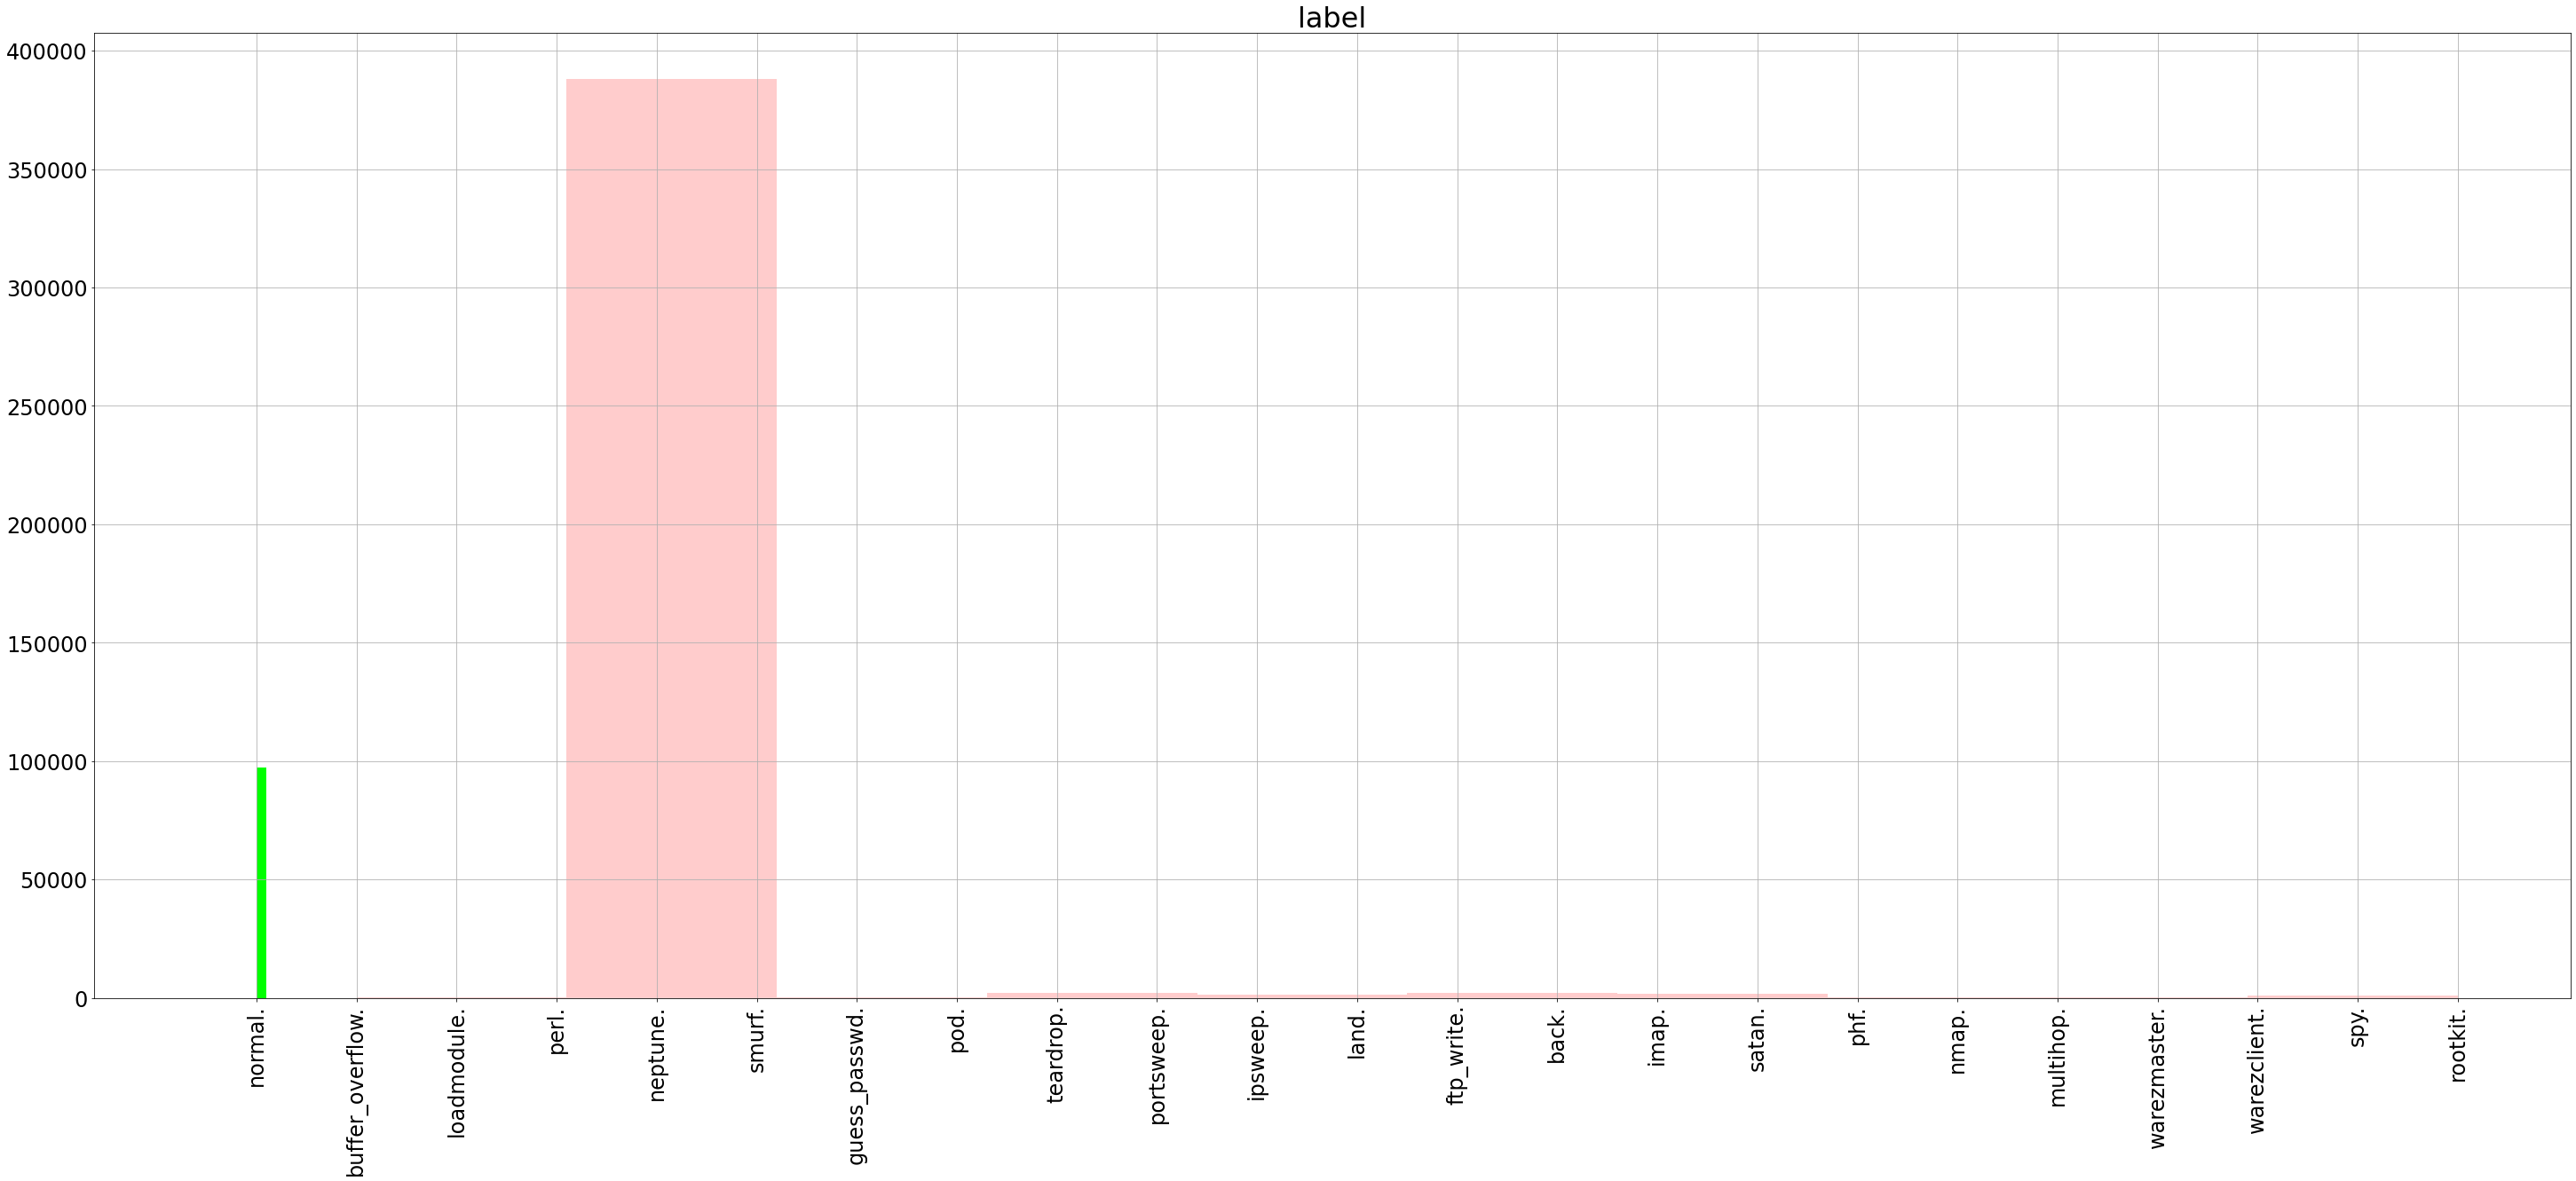

In [264]:
data_kdd_normal = kdd_data[kdd_data['label'] == 'normal.']
data_kdd_abnormal = kdd_data[kdd_data['label'] != 'normal.']


params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
plt.rcParams.update(params)


for value in data_kdd_normal:
    fig, ax = plt.subplots(figsize=(50, 20), subplot_kw=dict(aspect="auto"))
    data_kdd_normal[value].hist(xrot=90,color='#00FF00')
    data_kdd_abnormal[value].hist(xrot=90, lw=3, fc=(1, 0, 0, 0.2))
    ax.set_title(value)




## 6. Select top 10 features inclusive of the label

In [318]:
from sklearn.ensemble import ExtraTreesClassifier

def feature_importance(mydata,top_featurs=10):
    print('feature_selection_IMP started...')
    X=mydata.copy()
    y=X['label']
    
    model = ExtraTreesClassifier(n_estimators=100)
    model.fit(X,y)
    model.feature_importances_ #use inbuilt class feature_importances of tree based classifiers
    
    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    #mc=feat_importances.nlargest(30).plot(kind='barh')
    mc=feat_importances.nlargest(top_featurs).index
    selected_column=np.array(mc)
    plt.show()
    # Fit, Format, and Return
    return selected_column

In [361]:
kdd_data_feature_select = kdd_data
kdd_data_feature_select[' protocol_type'] = label_encoder.fit_transform(kdd_data[' protocol_type'])
kdd_data_feature_select[' service'] = label_encoder.fit_transform(kdd_data[' service'])
kdd_data_feature_select[' flag'] = label_encoder.fit_transform(kdd_data[' flag'])
kdd_data_feature_select['label'] = label_encoder.fit_transform(kdd_data['label'])


In [362]:
feature_importance(kdd_data_feature_select,10)

feature_selection_IMP started...


array([' srv_count', ' dst_host_same_src_port_rate', ' count', 'label',
       ' protocol_type', ' dst_host_srv_count', ' same_srv_rate',
       ' dst_host_same_srv_rate', ' dst_host_serror_rate', ' flag'],
      dtype=object)

In [457]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(kdd_data.drop(['label'], axis=1), kdd_data['label'], stratify=kdd_data['label'], test_size=0.25)

X_train = X_train[[' srv_count', ' dst_host_same_src_port_rate', ' count',' protocol_type', ' dst_host_srv_count', ' same_srv_rate',' dst_host_same_srv_rate', ' dst_host_serror_rate', ' flag']]
X_test = X_test[[' srv_count', ' dst_host_same_src_port_rate', ' count', ' protocol_type', ' dst_host_srv_count', ' same_srv_rate',' dst_host_same_srv_rate', ' dst_host_serror_rate', ' flag']]

print('Train data')
print(X_train.shape)
print(Y_train.shape)
print('='*20)
print('Test data')
print(X_test.shape)
print(Y_test.shape)


Train data
(370515, 9)
(370515,)
Test data
(123506, 9)
(123506,)


## 7. Apply one hot encoding for categorical data

In [458]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [459]:
X_train[' protocol_type']= label_encoder.fit_transform(X_train[' protocol_type'])
X_test[' protocol_type']= label_encoder.fit_transform(X_test[' protocol_type'])

X_train[' flag']= label_encoder.fit_transform(X_train[' flag'])
X_test[' flag']= label_encoder.fit_transform(X_test[' flag'])




In [379]:

"""

#Getting the mappinngs of one hot encoded data

kdd_data = pd.read_csv('lab2_data/kddcup_data.csv')
cat_list = kdd_data['label']
encoded_data, mapping_index = pd.Series(cat_list).factorize()
print(encoded_data)
print(mapping_index)
print(mapping_index.get_loc("normal."))

"""



[0 0 0 ... 0 0 0]
Index(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.', 'phf.',
       'nmap.', 'multihop.', 'warezmaster.', 'warezclient.', 'spy.',
       'rootkit.'],
      dtype='object')
0


## 8. Apply Min Max Scaling to numerical values

In [460]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [436]:
# For X_Train

In [461]:
X_train[[' srv_count']] = min_max_scaler.fit_transform(X_train[[' srv_count']])
X_train[[' dst_host_same_src_port_rate']] = min_max_scaler.fit_transform(X_train[[' dst_host_same_src_port_rate']])
X_train[[' count']] = min_max_scaler.fit_transform(X_train[[' count']])
X_train[[' dst_host_srv_count']] = min_max_scaler.fit_transform(X_train[[' dst_host_srv_count']])
X_train[[' same_srv_rate']] = min_max_scaler.fit_transform(X_train[[' same_srv_rate']])
X_train[[' dst_host_same_srv_rate']] = min_max_scaler.fit_transform(X_train[[' dst_host_same_srv_rate']])
X_train[[' dst_host_serror_rate']] = min_max_scaler.fit_transform(X_train[[' dst_host_serror_rate']])

In [446]:
# For X_test

In [462]:
X_test[[' srv_count']] = min_max_scaler.fit_transform(X_test[[' srv_count']])
X_test[[' dst_host_same_src_port_rate']] = min_max_scaler.fit_transform(X_test[[' dst_host_same_src_port_rate']])
X_test[[' count']] = min_max_scaler.fit_transform(X_test[[' count']])
X_test[[' dst_host_srv_count']] = min_max_scaler.fit_transform(X_test[[' dst_host_srv_count']])
X_test[[' same_srv_rate']] = min_max_scaler.fit_transform(X_test[[' same_srv_rate']])
X_test[[' dst_host_same_srv_rate']] = min_max_scaler.fit_transform(X_test[[' dst_host_same_srv_rate']])
X_test[[' dst_host_serror_rate']] = min_max_scaler.fit_transform(X_test[[' dst_host_serror_rate']])


## 9. Constructing Neural Network Model for classification

In [444]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam',
                    random_state=22,
                    
                    # tune the following hyperparameters:
                    hidden_layer_sizes=(150,150,50),  
                    max_iter=100,
                    learning_rate_init=0.03 # you can find a list of values of learning_rate in TensorFlow Playground (refer to Task A)
                    # end of hyperparameters
                   )
_ = clf.fit(X_train, Y_train)

## 10. Evaluation

In [447]:
y_pred = clf.predict(X_test)

In [449]:
# Check if we have done a good classification or not?

from sklearn.metrics import classification_report, confusion_matrix
print('confusion_matrix:')
print(confusion_matrix(Y_test, y_pred))
print('\nclassification_report:')
print(classification_report(Y_test, y_pred))

confusion_matrix:
[[    0     0     0     0     0     0     0     0     0     0     0   551
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     8
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     2
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0    13
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     3
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0    24     0     0     0     0     0   288
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     5
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0    

C:\Users\Naing\anaconda3\envs\ADM_course\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naing\anaconda3\envs\ADM_course\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naing\anaconda3\envs\ADM_course\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# F1 Score = 0.98

# <hr/>

# <center>II. Unsupervised Learning </center>

## 1.Join back the KDD data

In [545]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn import metrics

In [546]:
X_train[['label']] = label_encoder.fit_transform(Y_train)
X_test[['label']] = label_encoder.fit_transform(Y_test)
data_frame_kdd = pd.concat([X_train, X_test])



## 2. Apply PCA to reduce the features to two

In [547]:
pca = PCA(n_components=2)
data_frame_kdd_pca_applied = pca.fit_transform(data_frame_kdd)

## 3. Apply K means clustering with two clusters

In [548]:
km = KMeans(n_clusters=2, random_state=42)
km.fit_predict(data_frame_kdd_pca_applied)

cluster_centers = km.cluster_centers_




## 4. Plot the PCA transformed KDD data against the cluster centers found by K Means

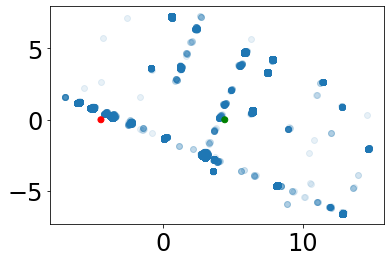

In [551]:
pca_transformed_centers = pca.fit_transform(cluster_centers)

#1st and 2nd components
plt.scatter(data_frame_kdd_pca_applied[:, 0], data_frame_kdd_pca_applied[:, 1],alpha=0.1)

#cluster centers with green and red in colors
plt.scatter(pca_transformed_centers[:, 0], pca_transformed_centers[:, 1],c=['g','r'], alpha=1)

## 5. Calculate the silhouette and inertia score

In [554]:
score = metrics.silhouette_score(data_frame_kdd_pca_applied, km.labels_, metric='euclidean')
print ("Silhouetee score: ")
print(score)
print("\n")
print ("Inertia score: ")
print(inertias)

Silhouetee score: 
0.8333870274762821


Inertia score: 
2220516.9195960164


In [555]:
print(km.inertia_)

2220516.9196004253
